# 설명
* 모델
    * 캣부스트 회귀(기본)
* 특성
    * 기온 예측 : ['month', '구분', '시간']
    * 가스공급량 예측 : ['month', '시간', '구분', '기온']
    * log 적용
    * 가스공급량 예측시 poly도 적용
* 데이콘 점수 : 0.106439166 (38등 2021-11-13 21:28:25)

# 가스공급량과 기온 데이터 불러오기(2013-2018년)

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../2013-2018년_가스공급량과_기온2.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,연월일,시간,구분,공급량,year,month,day,weekday,기온
0,0,0,2013-01-01,1,0,2497.129,2013,1,1,1,-6.4
1,1,1,2013-01-01,1,1,2169.093,2013,1,1,1,-6.4
2,2,2,2013-01-01,1,2,226.178,2013,1,1,1,-6.4
3,3,3,2013-01-01,1,3,1434.516,2013,1,1,1,-6.4
4,4,4,2013-01-01,1,4,3272.837,2013,1,1,1,-6.4


### 상관계수 확인

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import platform
from matplotlib import font_manager, rc

In [6]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

<AxesSubplot:>

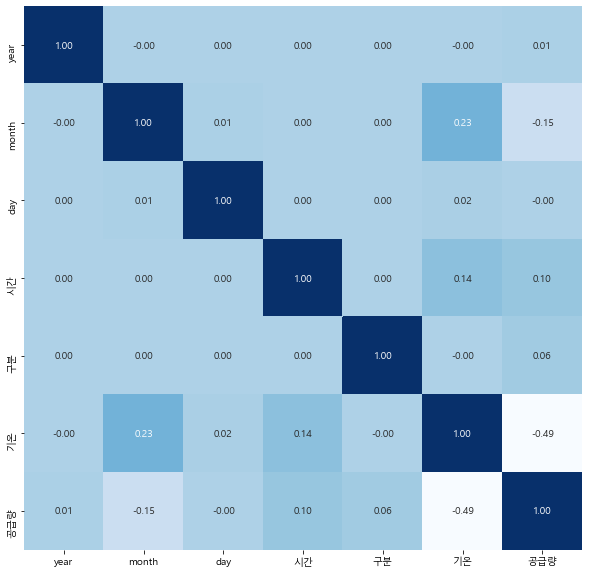

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['year','month', 'day', '시간', '구분', '기온', '공급량']].corr(), cmap='Blues', annot=True, fmt='.2f', cbar=False)

## catboost회귀 모델 기온 예측 테스트(2013-2018년)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
col = ['month', '구분', '시간']
X = df[col]
y = df['기온']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((276066, 3), (92022, 3), (276066,), (92022,))

In [11]:
# !pip install catboost

In [12]:
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold, cross_val_score

In [13]:
%%time
cb = CatBoostRegressor(random_seed=0, learning_rate=0.01, eval_metric='MAE')
cb.fit(X_train, y_train, early_stopping_rounds=10, eval_set=(X_test, y_test), verbose=True)
kfold = KFold(shuffle=True, random_state=0, n_splits=10)
score1 = cross_val_score(cb, X_train, y_train, cv=kfold, scoring='r2').mean()
score2 = cross_val_score(cb, X_test, y_test, cv=kfold, scoring='r2').mean()

0:	learn: 8.8854766	test: 8.9034881	best: 8.9034881 (0)	total: 199ms	remaining: 3m 18s
1:	learn: 8.8113158	test: 8.8294251	best: 8.8294251 (1)	total: 226ms	remaining: 1m 52s
2:	learn: 8.7385159	test: 8.7566827	best: 8.7566827 (2)	total: 253ms	remaining: 1m 23s
3:	learn: 8.6661602	test: 8.6844024	best: 8.6844024 (3)	total: 284ms	remaining: 1m 10s
4:	learn: 8.5956152	test: 8.6139348	best: 8.6139348 (4)	total: 309ms	remaining: 1m 1s
5:	learn: 8.5251398	test: 8.5435209	best: 8.5435209 (5)	total: 335ms	remaining: 55.5s
6:	learn: 8.4553717	test: 8.4737310	best: 8.4737310 (6)	total: 361ms	remaining: 51.2s
7:	learn: 8.3862198	test: 8.4045409	best: 8.4045409 (7)	total: 387ms	remaining: 48s
8:	learn: 8.3179233	test: 8.3362020	best: 8.3362020 (8)	total: 423ms	remaining: 46.6s
9:	learn: 8.2514691	test: 8.2697077	best: 8.2697077 (9)	total: 451ms	remaining: 44.6s
10:	learn: 8.1852933	test: 8.2035009	best: 8.2035009 (10)	total: 478ms	remaining: 43s
11:	learn: 8.1201064	test: 8.1382383	best: 8.1382383

98:	learn: 4.6259639	test: 4.6381951	best: 4.6381951 (98)	total: 2.83s	remaining: 25.7s
99:	learn: 4.6031596	test: 4.6153660	best: 4.6153660 (99)	total: 2.85s	remaining: 25.7s
100:	learn: 4.5815430	test: 4.5937131	best: 4.5937131 (100)	total: 2.88s	remaining: 25.6s
101:	learn: 4.5593788	test: 4.5714910	best: 4.5714910 (101)	total: 2.9s	remaining: 25.6s
102:	learn: 4.5375441	test: 4.5495808	best: 4.5495808 (102)	total: 2.93s	remaining: 25.5s
103:	learn: 4.5159644	test: 4.5279567	best: 4.5279567 (103)	total: 2.95s	remaining: 25.5s
104:	learn: 4.4947698	test: 4.5067012	best: 4.5067012 (104)	total: 2.98s	remaining: 25.4s
105:	learn: 4.4741162	test: 4.4860182	best: 4.4860182 (105)	total: 3s	remaining: 25.3s
106:	learn: 4.4534650	test: 4.4653288	best: 4.4653288 (106)	total: 3.04s	remaining: 25.3s
107:	learn: 4.4322757	test: 4.4440821	best: 4.4440821 (107)	total: 3.06s	remaining: 25.3s
108:	learn: 4.4122476	test: 4.4240141	best: 4.4240141 (108)	total: 3.09s	remaining: 25.3s
109:	learn: 4.3927

194:	learn: 3.3929785	test: 3.4009566	best: 3.4009566 (194)	total: 5.39s	remaining: 22.3s
195:	learn: 3.3865387	test: 3.3944200	best: 3.3944200 (195)	total: 5.42s	remaining: 22.2s
196:	learn: 3.3809007	test: 3.3887179	best: 3.3887179 (196)	total: 5.44s	remaining: 22.2s
197:	learn: 3.3751112	test: 3.3828557	best: 3.3828557 (197)	total: 5.47s	remaining: 22.2s
198:	learn: 3.3698015	test: 3.3774677	best: 3.3774677 (198)	total: 5.49s	remaining: 22.1s
199:	learn: 3.3641323	test: 3.3717599	best: 3.3717599 (199)	total: 5.52s	remaining: 22.1s
200:	learn: 3.3587246	test: 3.3662690	best: 3.3662690 (200)	total: 5.54s	remaining: 22s
201:	learn: 3.3531656	test: 3.3606409	best: 3.3606409 (201)	total: 5.57s	remaining: 22s
202:	learn: 3.3479775	test: 3.3553948	best: 3.3553948 (202)	total: 5.6s	remaining: 22s
203:	learn: 3.3425633	test: 3.3499252	best: 3.3499252 (203)	total: 5.63s	remaining: 22s
204:	learn: 3.3372684	test: 3.3445517	best: 3.3445517 (204)	total: 5.65s	remaining: 21.9s
205:	learn: 3.33236

287:	learn: 3.0647136	test: 3.0669570	best: 3.0669570 (287)	total: 7.86s	remaining: 19.4s
288:	learn: 3.0629123	test: 3.0651116	best: 3.0651116 (288)	total: 7.88s	remaining: 19.4s
289:	learn: 3.0609742	test: 3.0631314	best: 3.0631314 (289)	total: 7.91s	remaining: 19.4s
290:	learn: 3.0590546	test: 3.0611771	best: 3.0611771 (290)	total: 7.93s	remaining: 19.3s
291:	learn: 3.0571722	test: 3.0592411	best: 3.0592411 (291)	total: 7.96s	remaining: 19.3s
292:	learn: 3.0555567	test: 3.0575666	best: 3.0575666 (292)	total: 7.98s	remaining: 19.3s
293:	learn: 3.0539197	test: 3.0558639	best: 3.0558639 (293)	total: 8.01s	remaining: 19.2s
294:	learn: 3.0521585	test: 3.0540426	best: 3.0540426 (294)	total: 8.04s	remaining: 19.2s
295:	learn: 3.0505998	test: 3.0524348	best: 3.0524348 (295)	total: 8.06s	remaining: 19.2s
296:	learn: 3.0488625	test: 3.0506410	best: 3.0506410 (296)	total: 8.09s	remaining: 19.1s
297:	learn: 3.0470953	test: 3.0488137	best: 3.0488137 (297)	total: 8.11s	remaining: 19.1s
298:	learn

379:	learn: 2.9604810	test: 2.9591746	best: 2.9591746 (379)	total: 10.3s	remaining: 16.8s
380:	learn: 2.9599072	test: 2.9585890	best: 2.9585890 (380)	total: 10.3s	remaining: 16.7s
381:	learn: 2.9594389	test: 2.9581082	best: 2.9581082 (381)	total: 10.3s	remaining: 16.7s
382:	learn: 2.9588051	test: 2.9574415	best: 2.9574415 (382)	total: 10.3s	remaining: 16.7s
383:	learn: 2.9582322	test: 2.9568418	best: 2.9568418 (383)	total: 10.4s	remaining: 16.6s
384:	learn: 2.9576636	test: 2.9562431	best: 2.9562431 (384)	total: 10.4s	remaining: 16.6s
385:	learn: 2.9572088	test: 2.9557660	best: 2.9557660 (385)	total: 10.4s	remaining: 16.6s
386:	learn: 2.9565574	test: 2.9550963	best: 2.9550963 (386)	total: 10.5s	remaining: 16.6s
387:	learn: 2.9560822	test: 2.9546000	best: 2.9546000 (387)	total: 10.5s	remaining: 16.5s
388:	learn: 2.9555957	test: 2.9541014	best: 2.9541014 (388)	total: 10.5s	remaining: 16.5s
389:	learn: 2.9550722	test: 2.9535536	best: 2.9535536 (389)	total: 10.5s	remaining: 16.5s
390:	learn

473:	learn: 2.9241381	test: 2.9213109	best: 2.9213109 (473)	total: 12.7s	remaining: 14.1s
474:	learn: 2.9238526	test: 2.9210067	best: 2.9210067 (474)	total: 12.8s	remaining: 14.1s
475:	learn: 2.9236479	test: 2.9207902	best: 2.9207902 (475)	total: 12.8s	remaining: 14.1s
476:	learn: 2.9233642	test: 2.9204945	best: 2.9204945 (476)	total: 12.8s	remaining: 14s
477:	learn: 2.9231380	test: 2.9202566	best: 2.9202566 (477)	total: 12.8s	remaining: 14s
478:	learn: 2.9229897	test: 2.9201019	best: 2.9201019 (478)	total: 12.8s	remaining: 14s
479:	learn: 2.9227571	test: 2.9198645	best: 2.9198645 (479)	total: 12.9s	remaining: 13.9s
480:	learn: 2.9225090	test: 2.9195998	best: 2.9195998 (480)	total: 12.9s	remaining: 13.9s
481:	learn: 2.9222237	test: 2.9193034	best: 2.9193034 (481)	total: 12.9s	remaining: 13.9s
482:	learn: 2.9220700	test: 2.9191431	best: 2.9191431 (482)	total: 12.9s	remaining: 13.9s
483:	learn: 2.9217987	test: 2.9188668	best: 2.9188668 (483)	total: 13s	remaining: 13.8s
484:	learn: 2.9216

567:	learn: 2.9085323	test: 2.9050498	best: 2.9050498 (567)	total: 15.1s	remaining: 11.5s
568:	learn: 2.9083995	test: 2.9049202	best: 2.9049202 (568)	total: 15.2s	remaining: 11.5s
569:	learn: 2.9082782	test: 2.9047962	best: 2.9047962 (569)	total: 15.2s	remaining: 11.5s
570:	learn: 2.9081606	test: 2.9046718	best: 2.9046718 (570)	total: 15.2s	remaining: 11.4s
571:	learn: 2.9080221	test: 2.9045314	best: 2.9045314 (571)	total: 15.2s	remaining: 11.4s
572:	learn: 2.9078758	test: 2.9043800	best: 2.9043800 (572)	total: 15.3s	remaining: 11.4s
573:	learn: 2.9078027	test: 2.9043045	best: 2.9043045 (573)	total: 15.3s	remaining: 11.4s
574:	learn: 2.9077213	test: 2.9042217	best: 2.9042217 (574)	total: 15.3s	remaining: 11.3s
575:	learn: 2.9076159	test: 2.9041124	best: 2.9041124 (575)	total: 15.3s	remaining: 11.3s
576:	learn: 2.9075056	test: 2.9040016	best: 2.9040016 (576)	total: 15.4s	remaining: 11.3s
577:	learn: 2.9073763	test: 2.9038731	best: 2.9038731 (577)	total: 15.4s	remaining: 11.2s
578:	learn

666:	learn: 2.9006473	test: 2.8969837	best: 2.8969837 (666)	total: 17.8s	remaining: 8.87s
667:	learn: 2.9006118	test: 2.8969484	best: 2.8969484 (667)	total: 17.8s	remaining: 8.84s
668:	learn: 2.9005522	test: 2.8968868	best: 2.8968868 (668)	total: 17.8s	remaining: 8.82s
669:	learn: 2.9004946	test: 2.8968280	best: 2.8968280 (669)	total: 17.8s	remaining: 8.79s
670:	learn: 2.9004238	test: 2.8967531	best: 2.8967531 (670)	total: 17.9s	remaining: 8.76s
671:	learn: 2.9003841	test: 2.8967156	best: 2.8967156 (671)	total: 17.9s	remaining: 8.74s
672:	learn: 2.9003377	test: 2.8966631	best: 2.8966631 (672)	total: 17.9s	remaining: 8.71s
673:	learn: 2.9002730	test: 2.8965968	best: 2.8965968 (673)	total: 18s	remaining: 8.68s
674:	learn: 2.9002387	test: 2.8965661	best: 2.8965661 (674)	total: 18s	remaining: 8.66s
675:	learn: 2.9001751	test: 2.8965010	best: 2.8965010 (675)	total: 18s	remaining: 8.63s
676:	learn: 2.9001104	test: 2.8964325	best: 2.8964325 (676)	total: 18s	remaining: 8.6s
677:	learn: 2.90006

760:	learn: 2.8963518	test: 2.8925348	best: 2.8925348 (760)	total: 20.3s	remaining: 6.37s
761:	learn: 2.8963012	test: 2.8924819	best: 2.8924819 (761)	total: 20.3s	remaining: 6.34s
762:	learn: 2.8962701	test: 2.8924513	best: 2.8924513 (762)	total: 20.4s	remaining: 6.32s
763:	learn: 2.8962276	test: 2.8924060	best: 2.8924060 (763)	total: 20.4s	remaining: 6.3s
764:	learn: 2.8961820	test: 2.8923605	best: 2.8923605 (764)	total: 20.4s	remaining: 6.28s
765:	learn: 2.8961554	test: 2.8923371	best: 2.8923371 (765)	total: 20.5s	remaining: 6.25s
766:	learn: 2.8961230	test: 2.8923047	best: 2.8923047 (766)	total: 20.5s	remaining: 6.23s
767:	learn: 2.8960667	test: 2.8922443	best: 2.8922443 (767)	total: 20.5s	remaining: 6.2s
768:	learn: 2.8960282	test: 2.8922112	best: 2.8922112 (768)	total: 20.6s	remaining: 6.18s
769:	learn: 2.8959918	test: 2.8921745	best: 2.8921745 (769)	total: 20.6s	remaining: 6.15s
770:	learn: 2.8959658	test: 2.8921476	best: 2.8921476 (770)	total: 20.6s	remaining: 6.13s
771:	learn: 

853:	learn: 2.8935957	test: 2.8897373	best: 2.8897373 (853)	total: 24.1s	remaining: 4.12s
854:	learn: 2.8935602	test: 2.8897019	best: 2.8897019 (854)	total: 24.1s	remaining: 4.09s
855:	learn: 2.8935191	test: 2.8896600	best: 2.8896600 (855)	total: 24.1s	remaining: 4.06s
856:	learn: 2.8934999	test: 2.8896415	best: 2.8896415 (856)	total: 24.2s	remaining: 4.03s
857:	learn: 2.8934773	test: 2.8896179	best: 2.8896179 (857)	total: 24.2s	remaining: 4.01s
858:	learn: 2.8934579	test: 2.8895966	best: 2.8895966 (858)	total: 24.2s	remaining: 3.98s
859:	learn: 2.8934436	test: 2.8895836	best: 2.8895836 (859)	total: 24.3s	remaining: 3.95s
860:	learn: 2.8934282	test: 2.8895686	best: 2.8895686 (860)	total: 24.3s	remaining: 3.92s
861:	learn: 2.8934103	test: 2.8895536	best: 2.8895536 (861)	total: 24.3s	remaining: 3.9s
862:	learn: 2.8933874	test: 2.8895282	best: 2.8895282 (862)	total: 24.4s	remaining: 3.87s
863:	learn: 2.8933680	test: 2.8895090	best: 2.8895090 (863)	total: 24.4s	remaining: 3.84s
864:	learn:

952:	learn: 2.8917775	test: 2.8879727	best: 2.8879727 (952)	total: 27.2s	remaining: 1.34s
953:	learn: 2.8917610	test: 2.8879569	best: 2.8879569 (953)	total: 27.2s	remaining: 1.31s
954:	learn: 2.8917295	test: 2.8879259	best: 2.8879259 (954)	total: 27.2s	remaining: 1.28s
955:	learn: 2.8917152	test: 2.8879160	best: 2.8879160 (955)	total: 27.2s	remaining: 1.25s
956:	learn: 2.8916961	test: 2.8878967	best: 2.8878967 (956)	total: 27.3s	remaining: 1.23s
957:	learn: 2.8916818	test: 2.8878858	best: 2.8878858 (957)	total: 27.3s	remaining: 1.2s
958:	learn: 2.8916552	test: 2.8878575	best: 2.8878575 (958)	total: 27.3s	remaining: 1.17s
959:	learn: 2.8916472	test: 2.8878508	best: 2.8878508 (959)	total: 27.4s	remaining: 1.14s
960:	learn: 2.8916374	test: 2.8878434	best: 2.8878434 (960)	total: 27.4s	remaining: 1.11s
961:	learn: 2.8916342	test: 2.8878414	best: 2.8878414 (961)	total: 27.4s	remaining: 1.08s
962:	learn: 2.8916160	test: 2.8878225	best: 2.8878225 (962)	total: 27.4s	remaining: 1.05s
963:	learn:

78:	learn: 5.1498075	total: 1.97s	remaining: 22.9s
79:	learn: 5.1200588	total: 1.99s	remaining: 22.9s
80:	learn: 5.0905568	total: 2.01s	remaining: 22.8s
81:	learn: 5.0612973	total: 2.04s	remaining: 22.8s
82:	learn: 5.0326489	total: 2.06s	remaining: 22.8s
83:	learn: 5.0042043	total: 2.08s	remaining: 22.7s
84:	learn: 4.9765630	total: 2.11s	remaining: 22.7s
85:	learn: 4.9489457	total: 2.13s	remaining: 22.6s
86:	learn: 4.9227358	total: 2.15s	remaining: 22.6s
87:	learn: 4.8957454	total: 2.18s	remaining: 22.6s
88:	learn: 4.8695306	total: 2.2s	remaining: 22.6s
89:	learn: 4.8437952	total: 2.23s	remaining: 22.5s
90:	learn: 4.8180234	total: 2.25s	remaining: 22.5s
91:	learn: 4.7925865	total: 2.28s	remaining: 22.5s
92:	learn: 4.7676877	total: 2.3s	remaining: 22.5s
93:	learn: 4.7431525	total: 2.33s	remaining: 22.5s
94:	learn: 4.7187507	total: 2.36s	remaining: 22.5s
95:	learn: 4.6947949	total: 2.38s	remaining: 22.4s
96:	learn: 4.6712353	total: 2.41s	remaining: 22.4s
97:	learn: 4.6477360	total: 2.43s

245:	learn: 3.1648162	total: 6.09s	remaining: 18.7s
246:	learn: 3.1619677	total: 6.11s	remaining: 18.6s
247:	learn: 3.1590450	total: 6.14s	remaining: 18.6s
248:	learn: 3.1557340	total: 6.16s	remaining: 18.6s
249:	learn: 3.1527365	total: 6.18s	remaining: 18.6s
250:	learn: 3.1499853	total: 6.21s	remaining: 18.5s
251:	learn: 3.1468688	total: 6.23s	remaining: 18.5s
252:	learn: 3.1441176	total: 6.26s	remaining: 18.5s
253:	learn: 3.1408859	total: 6.28s	remaining: 18.4s
254:	learn: 3.1381827	total: 6.31s	remaining: 18.4s
255:	learn: 3.1352218	total: 6.34s	remaining: 18.4s
256:	learn: 3.1321879	total: 6.37s	remaining: 18.4s
257:	learn: 3.1294559	total: 6.39s	remaining: 18.4s
258:	learn: 3.1271569	total: 6.42s	remaining: 18.4s
259:	learn: 3.1242866	total: 6.44s	remaining: 18.3s
260:	learn: 3.1217363	total: 6.47s	remaining: 18.3s
261:	learn: 3.1189627	total: 6.49s	remaining: 18.3s
262:	learn: 3.1164945	total: 6.52s	remaining: 18.3s
263:	learn: 3.1140474	total: 6.54s	remaining: 18.2s
264:	learn: 

409:	learn: 2.9430570	total: 10.2s	remaining: 14.6s
410:	learn: 2.9425910	total: 10.2s	remaining: 14.6s
411:	learn: 2.9420824	total: 10.2s	remaining: 14.6s
412:	learn: 2.9416210	total: 10.2s	remaining: 14.6s
413:	learn: 2.9411562	total: 10.3s	remaining: 14.5s
414:	learn: 2.9408019	total: 10.3s	remaining: 14.5s
415:	learn: 2.9403165	total: 10.3s	remaining: 14.5s
416:	learn: 2.9398936	total: 10.3s	remaining: 14.5s
417:	learn: 2.9395581	total: 10.4s	remaining: 14.4s
418:	learn: 2.9391295	total: 10.4s	remaining: 14.4s
419:	learn: 2.9388106	total: 10.4s	remaining: 14.4s
420:	learn: 2.9384848	total: 10.4s	remaining: 14.4s
421:	learn: 2.9381657	total: 10.5s	remaining: 14.3s
422:	learn: 2.9377606	total: 10.5s	remaining: 14.3s
423:	learn: 2.9372523	total: 10.5s	remaining: 14.3s
424:	learn: 2.9369612	total: 10.5s	remaining: 14.3s
425:	learn: 2.9364924	total: 10.6s	remaining: 14.2s
426:	learn: 2.9360811	total: 10.6s	remaining: 14.2s
427:	learn: 2.9357564	total: 10.6s	remaining: 14.2s
428:	learn: 

568:	learn: 2.9060776	total: 14.1s	remaining: 10.7s
569:	learn: 2.9059821	total: 14.1s	remaining: 10.6s
570:	learn: 2.9058645	total: 14.1s	remaining: 10.6s
571:	learn: 2.9057693	total: 14.2s	remaining: 10.6s
572:	learn: 2.9056124	total: 14.2s	remaining: 10.6s
573:	learn: 2.9055270	total: 14.2s	remaining: 10.5s
574:	learn: 2.9054528	total: 14.2s	remaining: 10.5s
575:	learn: 2.9053483	total: 14.2s	remaining: 10.5s
576:	learn: 2.9052341	total: 14.3s	remaining: 10.5s
577:	learn: 2.9051567	total: 14.3s	remaining: 10.4s
578:	learn: 2.9050400	total: 14.3s	remaining: 10.4s
579:	learn: 2.9049569	total: 14.3s	remaining: 10.4s
580:	learn: 2.9048116	total: 14.4s	remaining: 10.4s
581:	learn: 2.9046936	total: 14.4s	remaining: 10.3s
582:	learn: 2.9045609	total: 14.4s	remaining: 10.3s
583:	learn: 2.9044884	total: 14.4s	remaining: 10.3s
584:	learn: 2.9043703	total: 14.5s	remaining: 10.3s
585:	learn: 2.9042426	total: 14.5s	remaining: 10.2s
586:	learn: 2.9041321	total: 14.5s	remaining: 10.2s
587:	learn: 

733:	learn: 2.8948593	total: 18.2s	remaining: 6.59s
734:	learn: 2.8948105	total: 18.2s	remaining: 6.57s
735:	learn: 2.8947545	total: 18.2s	remaining: 6.54s
736:	learn: 2.8946921	total: 18.3s	remaining: 6.52s
737:	learn: 2.8946419	total: 18.3s	remaining: 6.49s
738:	learn: 2.8946014	total: 18.3s	remaining: 6.47s
739:	learn: 2.8945635	total: 18.3s	remaining: 6.44s
740:	learn: 2.8945301	total: 18.4s	remaining: 6.42s
741:	learn: 2.8944883	total: 18.4s	remaining: 6.39s
742:	learn: 2.8944276	total: 18.4s	remaining: 6.37s
743:	learn: 2.8944015	total: 18.4s	remaining: 6.34s
744:	learn: 2.8943636	total: 18.5s	remaining: 6.32s
745:	learn: 2.8943023	total: 18.5s	remaining: 6.29s
746:	learn: 2.8942488	total: 18.5s	remaining: 6.27s
747:	learn: 2.8942117	total: 18.5s	remaining: 6.25s
748:	learn: 2.8941879	total: 18.6s	remaining: 6.22s
749:	learn: 2.8941615	total: 18.6s	remaining: 6.19s
750:	learn: 2.8941442	total: 18.6s	remaining: 6.17s
751:	learn: 2.8940862	total: 18.6s	remaining: 6.14s
752:	learn: 

893:	learn: 2.8901745	total: 22.1s	remaining: 2.62s
894:	learn: 2.8901604	total: 22.1s	remaining: 2.59s
895:	learn: 2.8901595	total: 22.1s	remaining: 2.57s
896:	learn: 2.8901495	total: 22.2s	remaining: 2.54s
897:	learn: 2.8901416	total: 22.2s	remaining: 2.52s
898:	learn: 2.8901150	total: 22.2s	remaining: 2.5s
899:	learn: 2.8900948	total: 22.2s	remaining: 2.47s
900:	learn: 2.8900831	total: 22.3s	remaining: 2.44s
901:	learn: 2.8900463	total: 22.3s	remaining: 2.42s
902:	learn: 2.8900342	total: 22.3s	remaining: 2.4s
903:	learn: 2.8900251	total: 22.3s	remaining: 2.37s
904:	learn: 2.8899995	total: 22.4s	remaining: 2.35s
905:	learn: 2.8899867	total: 22.4s	remaining: 2.32s
906:	learn: 2.8899678	total: 22.4s	remaining: 2.3s
907:	learn: 2.8899575	total: 22.4s	remaining: 2.27s
908:	learn: 2.8899539	total: 22.5s	remaining: 2.25s
909:	learn: 2.8899436	total: 22.5s	remaining: 2.22s
910:	learn: 2.8899220	total: 22.5s	remaining: 2.2s
911:	learn: 2.8898876	total: 22.5s	remaining: 2.17s
912:	learn: 2.88

60:	learn: 5.7411859	total: 1.53s	remaining: 23.5s
61:	learn: 5.7072198	total: 1.55s	remaining: 23.5s
62:	learn: 5.6699317	total: 1.58s	remaining: 23.5s
63:	learn: 5.6358726	total: 1.6s	remaining: 23.4s
64:	learn: 5.5994928	total: 1.63s	remaining: 23.4s
65:	learn: 5.5641866	total: 1.65s	remaining: 23.4s
66:	learn: 5.5301240	total: 1.67s	remaining: 23.3s
67:	learn: 5.4969924	total: 1.7s	remaining: 23.3s
68:	learn: 5.4623409	total: 1.72s	remaining: 23.2s
69:	learn: 5.4283400	total: 1.75s	remaining: 23.2s
70:	learn: 5.3948446	total: 1.78s	remaining: 23.4s
71:	learn: 5.3622545	total: 1.81s	remaining: 23.3s
72:	learn: 5.3311478	total: 1.83s	remaining: 23.3s
73:	learn: 5.3018208	total: 1.86s	remaining: 23.3s
74:	learn: 5.2713569	total: 1.88s	remaining: 23.2s
75:	learn: 5.2420143	total: 1.91s	remaining: 23.2s
76:	learn: 5.2135954	total: 1.93s	remaining: 23.2s
77:	learn: 5.1829120	total: 1.96s	remaining: 23.1s
78:	learn: 5.1525528	total: 1.98s	remaining: 23.1s
79:	learn: 5.1227552	total: 2.01s

226:	learn: 3.2359053	total: 5.7s	remaining: 19.4s
227:	learn: 3.2317498	total: 5.72s	remaining: 19.4s
228:	learn: 3.2279623	total: 5.75s	remaining: 19.4s
229:	learn: 3.2237586	total: 5.78s	remaining: 19.3s
230:	learn: 3.2201352	total: 5.8s	remaining: 19.3s
231:	learn: 3.2160933	total: 5.83s	remaining: 19.3s
232:	learn: 3.2122300	total: 5.85s	remaining: 19.3s
233:	learn: 3.2082048	total: 5.88s	remaining: 19.2s
234:	learn: 3.2043945	total: 5.9s	remaining: 19.2s
235:	learn: 3.2009421	total: 5.93s	remaining: 19.2s
236:	learn: 3.1975447	total: 5.95s	remaining: 19.2s
237:	learn: 3.1941515	total: 5.98s	remaining: 19.1s
238:	learn: 3.1908982	total: 6s	remaining: 19.1s
239:	learn: 3.1870551	total: 6.03s	remaining: 19.1s
240:	learn: 3.1838991	total: 6.05s	remaining: 19.1s
241:	learn: 3.1808600	total: 6.08s	remaining: 19s
242:	learn: 3.1774988	total: 6.1s	remaining: 19s
243:	learn: 3.1742973	total: 6.13s	remaining: 19s
244:	learn: 3.1709485	total: 6.15s	remaining: 19s
245:	learn: 3.1675127	total

388:	learn: 2.9553586	total: 10.3s	remaining: 16.2s
389:	learn: 2.9548263	total: 10.3s	remaining: 16.2s
390:	learn: 2.9543497	total: 10.4s	remaining: 16.2s
391:	learn: 2.9538175	total: 10.4s	remaining: 16.1s
392:	learn: 2.9531957	total: 10.4s	remaining: 16.1s
393:	learn: 2.9526574	total: 10.4s	remaining: 16.1s
394:	learn: 2.9520060	total: 10.5s	remaining: 16s
395:	learn: 2.9513977	total: 10.5s	remaining: 16s
396:	learn: 2.9509704	total: 10.5s	remaining: 16s
397:	learn: 2.9504362	total: 10.5s	remaining: 15.9s
398:	learn: 2.9499612	total: 10.6s	remaining: 15.9s
399:	learn: 2.9495522	total: 10.6s	remaining: 15.9s
400:	learn: 2.9489836	total: 10.6s	remaining: 15.8s
401:	learn: 2.9484597	total: 10.6s	remaining: 15.8s
402:	learn: 2.9480135	total: 10.7s	remaining: 15.8s
403:	learn: 2.9476224	total: 10.7s	remaining: 15.8s
404:	learn: 2.9471381	total: 10.7s	remaining: 15.7s
405:	learn: 2.9467916	total: 10.7s	remaining: 15.7s
406:	learn: 2.9462820	total: 10.8s	remaining: 15.7s
407:	learn: 2.9458

550:	learn: 2.9101373	total: 14.2s	remaining: 11.6s
551:	learn: 2.9099876	total: 14.2s	remaining: 11.5s
552:	learn: 2.9098408	total: 14.2s	remaining: 11.5s
553:	learn: 2.9097567	total: 14.3s	remaining: 11.5s
554:	learn: 2.9096014	total: 14.3s	remaining: 11.5s
555:	learn: 2.9094924	total: 14.3s	remaining: 11.4s
556:	learn: 2.9093495	total: 14.4s	remaining: 11.4s
557:	learn: 2.9092310	total: 14.4s	remaining: 11.4s
558:	learn: 2.9091166	total: 14.4s	remaining: 11.4s
559:	learn: 2.9089956	total: 14.4s	remaining: 11.3s
560:	learn: 2.9088737	total: 14.5s	remaining: 11.3s
561:	learn: 2.9087440	total: 14.5s	remaining: 11.3s
562:	learn: 2.9086507	total: 14.5s	remaining: 11.3s
563:	learn: 2.9085169	total: 14.5s	remaining: 11.2s
564:	learn: 2.9084183	total: 14.6s	remaining: 11.2s
565:	learn: 2.9083392	total: 14.7s	remaining: 11.2s
566:	learn: 2.9082448	total: 14.7s	remaining: 11.2s
567:	learn: 2.9081581	total: 14.8s	remaining: 11.2s
568:	learn: 2.9080478	total: 14.8s	remaining: 11.2s
569:	learn: 

715:	learn: 2.8974304	total: 19.7s	remaining: 7.83s
716:	learn: 2.8973723	total: 19.8s	remaining: 7.8s
717:	learn: 2.8973300	total: 19.8s	remaining: 7.77s
718:	learn: 2.8972809	total: 19.8s	remaining: 7.75s
719:	learn: 2.8972347	total: 19.9s	remaining: 7.72s
720:	learn: 2.8972103	total: 19.9s	remaining: 7.69s
721:	learn: 2.8971761	total: 19.9s	remaining: 7.67s
722:	learn: 2.8971470	total: 19.9s	remaining: 7.64s
723:	learn: 2.8971010	total: 20s	remaining: 7.62s
724:	learn: 2.8970792	total: 20s	remaining: 7.59s
725:	learn: 2.8970441	total: 20s	remaining: 7.56s
726:	learn: 2.8970167	total: 20.1s	remaining: 7.53s
727:	learn: 2.8969869	total: 20.1s	remaining: 7.5s
728:	learn: 2.8969407	total: 20.1s	remaining: 7.48s
729:	learn: 2.8968904	total: 20.1s	remaining: 7.45s
730:	learn: 2.8968547	total: 20.2s	remaining: 7.42s
731:	learn: 2.8968351	total: 20.2s	remaining: 7.39s
732:	learn: 2.8968025	total: 20.2s	remaining: 7.37s
733:	learn: 2.8967769	total: 20.2s	remaining: 7.34s
734:	learn: 2.896726

882:	learn: 2.8922541	total: 24.3s	remaining: 3.21s
883:	learn: 2.8922408	total: 24.3s	remaining: 3.19s
884:	learn: 2.8922093	total: 24.3s	remaining: 3.16s
885:	learn: 2.8921977	total: 24.3s	remaining: 3.13s
886:	learn: 2.8921562	total: 24.4s	remaining: 3.1s
887:	learn: 2.8921419	total: 24.4s	remaining: 3.08s
888:	learn: 2.8921419	total: 24.4s	remaining: 3.05s
889:	learn: 2.8921207	total: 24.4s	remaining: 3.02s
890:	learn: 2.8921163	total: 24.4s	remaining: 2.99s
891:	learn: 2.8920811	total: 24.5s	remaining: 2.96s
892:	learn: 2.8920799	total: 24.5s	remaining: 2.93s
893:	learn: 2.8920568	total: 24.5s	remaining: 2.91s
894:	learn: 2.8920389	total: 24.5s	remaining: 2.88s
895:	learn: 2.8919956	total: 24.6s	remaining: 2.85s
896:	learn: 2.8919899	total: 24.6s	remaining: 2.82s
897:	learn: 2.8919791	total: 24.6s	remaining: 2.79s
898:	learn: 2.8919704	total: 24.6s	remaining: 2.77s
899:	learn: 2.8919610	total: 24.7s	remaining: 2.74s
900:	learn: 2.8919365	total: 24.7s	remaining: 2.71s
901:	learn: 2

42:	learn: 6.4616033	total: 1.09s	remaining: 24.2s
43:	learn: 6.4180538	total: 1.11s	remaining: 24.1s
44:	learn: 6.3753762	total: 1.14s	remaining: 24.1s
45:	learn: 6.3329953	total: 1.16s	remaining: 24.1s
46:	learn: 6.2893141	total: 1.18s	remaining: 24s
47:	learn: 6.2471572	total: 1.21s	remaining: 24s
48:	learn: 6.2046692	total: 1.23s	remaining: 23.9s
49:	learn: 6.1635523	total: 1.26s	remaining: 23.9s
50:	learn: 6.1220988	total: 1.28s	remaining: 23.9s
51:	learn: 6.0825088	total: 1.31s	remaining: 23.8s
52:	learn: 6.0420652	total: 1.33s	remaining: 23.8s
53:	learn: 6.0014470	total: 1.36s	remaining: 23.8s
54:	learn: 5.9620771	total: 1.39s	remaining: 23.8s
55:	learn: 5.9238214	total: 1.41s	remaining: 23.8s
56:	learn: 5.8864212	total: 1.44s	remaining: 23.8s
57:	learn: 5.8493142	total: 1.46s	remaining: 23.7s
58:	learn: 5.8104179	total: 1.49s	remaining: 23.7s
59:	learn: 5.7732572	total: 1.51s	remaining: 23.7s
60:	learn: 5.7378094	total: 1.54s	remaining: 23.7s
61:	learn: 5.7028536	total: 1.56s	r

206:	learn: 3.3249498	total: 5.31s	remaining: 20.3s
207:	learn: 3.3198588	total: 5.34s	remaining: 20.3s
208:	learn: 3.3151922	total: 5.37s	remaining: 20.3s
209:	learn: 3.3102825	total: 5.4s	remaining: 20.3s
210:	learn: 3.3053539	total: 5.42s	remaining: 20.3s
211:	learn: 3.2999579	total: 5.45s	remaining: 20.3s
212:	learn: 3.2954118	total: 5.47s	remaining: 20.2s
213:	learn: 3.2903953	total: 5.5s	remaining: 20.2s
214:	learn: 3.2857322	total: 5.52s	remaining: 20.2s
215:	learn: 3.2811996	total: 5.55s	remaining: 20.2s
216:	learn: 3.2769375	total: 5.58s	remaining: 20.1s
217:	learn: 3.2725591	total: 5.6s	remaining: 20.1s
218:	learn: 3.2681363	total: 5.63s	remaining: 20.1s
219:	learn: 3.2638232	total: 5.65s	remaining: 20s
220:	learn: 3.2597089	total: 5.68s	remaining: 20s
221:	learn: 3.2556172	total: 5.7s	remaining: 20s
222:	learn: 3.2514455	total: 5.73s	remaining: 20s
223:	learn: 3.2473903	total: 5.75s	remaining: 19.9s
224:	learn: 3.2434685	total: 5.78s	remaining: 19.9s
225:	learn: 3.2390817	to

372:	learn: 2.9674576	total: 9.49s	remaining: 16s
373:	learn: 2.9668137	total: 9.52s	remaining: 15.9s
374:	learn: 2.9662236	total: 9.54s	remaining: 15.9s
375:	learn: 2.9654622	total: 9.57s	remaining: 15.9s
376:	learn: 2.9648349	total: 9.59s	remaining: 15.8s
377:	learn: 2.9642298	total: 9.62s	remaining: 15.8s
378:	learn: 2.9634758	total: 9.64s	remaining: 15.8s
379:	learn: 2.9627724	total: 9.66s	remaining: 15.8s
380:	learn: 2.9621928	total: 9.69s	remaining: 15.7s
381:	learn: 2.9617204	total: 9.71s	remaining: 15.7s
382:	learn: 2.9610789	total: 9.74s	remaining: 15.7s
383:	learn: 2.9604643	total: 9.77s	remaining: 15.7s
384:	learn: 2.9598881	total: 9.79s	remaining: 15.6s
385:	learn: 2.9594329	total: 9.81s	remaining: 15.6s
386:	learn: 2.9587811	total: 9.84s	remaining: 15.6s
387:	learn: 2.9583097	total: 9.87s	remaining: 15.6s
388:	learn: 2.9578261	total: 9.89s	remaining: 15.5s
389:	learn: 2.9573448	total: 9.92s	remaining: 15.5s
390:	learn: 2.9567408	total: 9.94s	remaining: 15.5s
391:	learn: 2.

531:	learn: 2.9147192	total: 13.5s	remaining: 11.8s
532:	learn: 2.9145998	total: 13.5s	remaining: 11.8s
533:	learn: 2.9144334	total: 13.5s	remaining: 11.8s
534:	learn: 2.9143252	total: 13.5s	remaining: 11.8s
535:	learn: 2.9142180	total: 13.5s	remaining: 11.7s
536:	learn: 2.9141078	total: 13.6s	remaining: 11.7s
537:	learn: 2.9140126	total: 13.6s	remaining: 11.7s
538:	learn: 2.9138166	total: 13.6s	remaining: 11.6s
539:	learn: 2.9137066	total: 13.6s	remaining: 11.6s
540:	learn: 2.9135624	total: 13.7s	remaining: 11.6s
541:	learn: 2.9134536	total: 13.7s	remaining: 11.6s
542:	learn: 2.9133305	total: 13.7s	remaining: 11.6s
543:	learn: 2.9131686	total: 13.7s	remaining: 11.5s
544:	learn: 2.9130471	total: 13.8s	remaining: 11.5s
545:	learn: 2.9128952	total: 13.8s	remaining: 11.5s
546:	learn: 2.9127506	total: 13.8s	remaining: 11.4s
547:	learn: 2.9126501	total: 13.8s	remaining: 11.4s
548:	learn: 2.9124544	total: 13.9s	remaining: 11.4s
549:	learn: 2.9122858	total: 13.9s	remaining: 11.4s
550:	learn: 

692:	learn: 2.9005238	total: 17.4s	remaining: 7.72s
693:	learn: 2.9004800	total: 17.4s	remaining: 7.69s
694:	learn: 2.9004003	total: 17.5s	remaining: 7.67s
695:	learn: 2.9003284	total: 17.5s	remaining: 7.64s
696:	learn: 2.9002567	total: 17.5s	remaining: 7.62s
697:	learn: 2.9002068	total: 17.5s	remaining: 7.59s
698:	learn: 2.9001880	total: 17.6s	remaining: 7.57s
699:	learn: 2.9001638	total: 17.6s	remaining: 7.54s
700:	learn: 2.9001268	total: 17.6s	remaining: 7.51s
701:	learn: 2.9000839	total: 17.6s	remaining: 7.49s
702:	learn: 2.9000377	total: 17.7s	remaining: 7.46s
703:	learn: 2.9000020	total: 17.7s	remaining: 7.44s
704:	learn: 2.8999397	total: 17.7s	remaining: 7.41s
705:	learn: 2.8999157	total: 17.7s	remaining: 7.39s
706:	learn: 2.8998529	total: 17.8s	remaining: 7.36s
707:	learn: 2.8997974	total: 17.8s	remaining: 7.34s
708:	learn: 2.8997166	total: 17.8s	remaining: 7.31s
709:	learn: 2.8996961	total: 17.8s	remaining: 7.29s
710:	learn: 2.8996396	total: 17.9s	remaining: 7.26s
711:	learn: 

854:	learn: 2.8949689	total: 21.5s	remaining: 3.65s
855:	learn: 2.8949575	total: 21.6s	remaining: 3.63s
856:	learn: 2.8949272	total: 21.6s	remaining: 3.6s
857:	learn: 2.8948801	total: 21.6s	remaining: 3.58s
858:	learn: 2.8948519	total: 21.6s	remaining: 3.55s
859:	learn: 2.8948386	total: 21.7s	remaining: 3.52s
860:	learn: 2.8948146	total: 21.7s	remaining: 3.5s
861:	learn: 2.8947992	total: 21.7s	remaining: 3.47s
862:	learn: 2.8947834	total: 21.7s	remaining: 3.45s
863:	learn: 2.8947738	total: 21.8s	remaining: 3.42s
864:	learn: 2.8947544	total: 21.8s	remaining: 3.4s
865:	learn: 2.8947181	total: 21.8s	remaining: 3.37s
866:	learn: 2.8946753	total: 21.8s	remaining: 3.35s
867:	learn: 2.8946447	total: 21.9s	remaining: 3.32s
868:	learn: 2.8946274	total: 21.9s	remaining: 3.3s
869:	learn: 2.8945923	total: 21.9s	remaining: 3.27s
870:	learn: 2.8945719	total: 21.9s	remaining: 3.25s
871:	learn: 2.8945583	total: 22s	remaining: 3.22s
872:	learn: 2.8945497	total: 22s	remaining: 3.2s
873:	learn: 2.8945090

17:	learn: 7.7486990	total: 451ms	remaining: 24.6s
18:	learn: 7.6898461	total: 477ms	remaining: 24.6s
19:	learn: 7.6309082	total: 500ms	remaining: 24.5s
20:	learn: 7.5742532	total: 524ms	remaining: 24.4s
21:	learn: 7.5166242	total: 548ms	remaining: 24.4s
22:	learn: 7.4589782	total: 573ms	remaining: 24.4s
23:	learn: 7.4020964	total: 597ms	remaining: 24.3s
24:	learn: 7.3460517	total: 621ms	remaining: 24.2s
25:	learn: 7.2919481	total: 646ms	remaining: 24.2s
26:	learn: 7.2375514	total: 674ms	remaining: 24.3s
27:	learn: 7.1845354	total: 700ms	remaining: 24.3s
28:	learn: 7.1315020	total: 727ms	remaining: 24.3s
29:	learn: 7.0802228	total: 750ms	remaining: 24.3s
30:	learn: 7.0288464	total: 775ms	remaining: 24.2s
31:	learn: 6.9774787	total: 799ms	remaining: 24.2s
32:	learn: 6.9267597	total: 823ms	remaining: 24.1s
33:	learn: 6.8771590	total: 845ms	remaining: 24s
34:	learn: 6.8286184	total: 877ms	remaining: 24.2s
35:	learn: 6.7805439	total: 903ms	remaining: 24.2s
36:	learn: 6.7332479	total: 928ms

179:	learn: 3.4914771	total: 4.49s	remaining: 20.5s
180:	learn: 3.4843674	total: 4.52s	remaining: 20.4s
181:	learn: 3.4771502	total: 4.55s	remaining: 20.4s
182:	learn: 3.4702662	total: 4.58s	remaining: 20.4s
183:	learn: 3.4625444	total: 4.61s	remaining: 20.4s
184:	learn: 3.4550942	total: 4.63s	remaining: 20.4s
185:	learn: 3.4477666	total: 4.66s	remaining: 20.4s
186:	learn: 3.4411779	total: 4.68s	remaining: 20.4s
187:	learn: 3.4340623	total: 4.71s	remaining: 20.3s
188:	learn: 3.4274467	total: 4.73s	remaining: 20.3s
189:	learn: 3.4210253	total: 4.76s	remaining: 20.3s
190:	learn: 3.4148084	total: 4.78s	remaining: 20.3s
191:	learn: 3.4084523	total: 4.81s	remaining: 20.2s
192:	learn: 3.4014865	total: 4.83s	remaining: 20.2s
193:	learn: 3.3947530	total: 4.87s	remaining: 20.2s
194:	learn: 3.3882291	total: 4.89s	remaining: 20.2s
195:	learn: 3.3824615	total: 4.92s	remaining: 20.2s
196:	learn: 3.3768117	total: 4.95s	remaining: 20.2s
197:	learn: 3.3710504	total: 4.97s	remaining: 20.1s
198:	learn: 

345:	learn: 2.9842537	total: 8.66s	remaining: 16.4s
346:	learn: 2.9832888	total: 8.68s	remaining: 16.3s
347:	learn: 2.9823561	total: 8.71s	remaining: 16.3s
348:	learn: 2.9815076	total: 8.73s	remaining: 16.3s
349:	learn: 2.9806300	total: 8.75s	remaining: 16.3s
350:	learn: 2.9796625	total: 8.78s	remaining: 16.2s
351:	learn: 2.9788818	total: 8.8s	remaining: 16.2s
352:	learn: 2.9779177	total: 8.83s	remaining: 16.2s
353:	learn: 2.9770587	total: 8.86s	remaining: 16.2s
354:	learn: 2.9761061	total: 8.89s	remaining: 16.2s
355:	learn: 2.9753592	total: 8.92s	remaining: 16.1s
356:	learn: 2.9744762	total: 8.95s	remaining: 16.1s
357:	learn: 2.9735893	total: 8.97s	remaining: 16.1s
358:	learn: 2.9727580	total: 9s	remaining: 16.1s
359:	learn: 2.9719551	total: 9.02s	remaining: 16s
360:	learn: 2.9711796	total: 9.05s	remaining: 16s
361:	learn: 2.9703728	total: 9.07s	remaining: 16s
362:	learn: 2.9695732	total: 9.1s	remaining: 16s
363:	learn: 2.9689095	total: 9.12s	remaining: 15.9s
364:	learn: 2.9681472	tot

511:	learn: 2.9135567	total: 12.8s	remaining: 12.2s
512:	learn: 2.9133551	total: 12.8s	remaining: 12.2s
513:	learn: 2.9131484	total: 12.9s	remaining: 12.2s
514:	learn: 2.9129565	total: 12.9s	remaining: 12.1s
515:	learn: 2.9127790	total: 12.9s	remaining: 12.1s
516:	learn: 2.9126228	total: 12.9s	remaining: 12.1s
517:	learn: 2.9124333	total: 12.9s	remaining: 12s
518:	learn: 2.9122524	total: 13s	remaining: 12s
519:	learn: 2.9121350	total: 13s	remaining: 12s
520:	learn: 2.9119907	total: 13s	remaining: 12s
521:	learn: 2.9118079	total: 13s	remaining: 11.9s
522:	learn: 2.9117074	total: 13.1s	remaining: 11.9s
523:	learn: 2.9115078	total: 13.1s	remaining: 11.9s
524:	learn: 2.9113364	total: 13.1s	remaining: 11.9s
525:	learn: 2.9111860	total: 13.2s	remaining: 11.9s
526:	learn: 2.9110146	total: 13.2s	remaining: 11.8s
527:	learn: 2.9108839	total: 13.2s	remaining: 11.8s
528:	learn: 2.9107774	total: 13.2s	remaining: 11.8s
529:	learn: 2.9106336	total: 13.3s	remaining: 11.8s
530:	learn: 2.9104465	total:

674:	learn: 2.8974872	total: 16.8s	remaining: 8.09s
675:	learn: 2.8974269	total: 16.8s	remaining: 8.06s
676:	learn: 2.8973641	total: 16.9s	remaining: 8.04s
677:	learn: 2.8973125	total: 16.9s	remaining: 8.02s
678:	learn: 2.8972338	total: 16.9s	remaining: 7.99s
679:	learn: 2.8971728	total: 16.9s	remaining: 7.96s
680:	learn: 2.8970833	total: 17s	remaining: 7.94s
681:	learn: 2.8970003	total: 17s	remaining: 7.92s
682:	learn: 2.8969385	total: 17s	remaining: 7.89s
683:	learn: 2.8968934	total: 17s	remaining: 7.87s
684:	learn: 2.8968619	total: 17s	remaining: 7.84s
685:	learn: 2.8968283	total: 17.1s	remaining: 7.81s
686:	learn: 2.8967805	total: 17.1s	remaining: 7.79s
687:	learn: 2.8967300	total: 17.1s	remaining: 7.76s
688:	learn: 2.8966890	total: 17.1s	remaining: 7.74s
689:	learn: 2.8966457	total: 17.2s	remaining: 7.71s
690:	learn: 2.8965776	total: 17.2s	remaining: 7.69s
691:	learn: 2.8965396	total: 17.2s	remaining: 7.66s
692:	learn: 2.8964635	total: 17.2s	remaining: 7.64s
693:	learn: 2.8964320	

840:	learn: 2.8912228	total: 20.9s	remaining: 3.95s
841:	learn: 2.8911946	total: 20.9s	remaining: 3.93s
842:	learn: 2.8911694	total: 20.9s	remaining: 3.9s
843:	learn: 2.8911555	total: 21s	remaining: 3.88s
844:	learn: 2.8911347	total: 21s	remaining: 3.85s
845:	learn: 2.8911144	total: 21s	remaining: 3.83s
846:	learn: 2.8910943	total: 21s	remaining: 3.8s
847:	learn: 2.8910746	total: 21.1s	remaining: 3.78s
848:	learn: 2.8910336	total: 21.1s	remaining: 3.75s
849:	learn: 2.8910126	total: 21.1s	remaining: 3.73s
850:	learn: 2.8909997	total: 21.1s	remaining: 3.7s
851:	learn: 2.8909612	total: 21.2s	remaining: 3.68s
852:	learn: 2.8909458	total: 21.2s	remaining: 3.65s
853:	learn: 2.8909291	total: 21.2s	remaining: 3.63s
854:	learn: 2.8908984	total: 21.2s	remaining: 3.6s
855:	learn: 2.8908699	total: 21.3s	remaining: 3.58s
856:	learn: 2.8908687	total: 21.3s	remaining: 3.55s
857:	learn: 2.8908567	total: 21.3s	remaining: 3.52s
858:	learn: 2.8908465	total: 21.3s	remaining: 3.5s
859:	learn: 2.8908229	tot

0:	learn: 8.8859175	total: 25.4ms	remaining: 25.4s
1:	learn: 8.8117308	total: 48.5ms	remaining: 24.2s
2:	learn: 8.7388996	total: 71.8ms	remaining: 23.9s
3:	learn: 8.6665230	total: 94.4ms	remaining: 23.5s
4:	learn: 8.5959593	total: 120ms	remaining: 23.9s
5:	learn: 8.5254579	total: 145ms	remaining: 24s
6:	learn: 8.4556586	total: 169ms	remaining: 24s
7:	learn: 8.3864729	total: 193ms	remaining: 24s
8:	learn: 8.3184749	total: 216ms	remaining: 23.8s
9:	learn: 8.2520311	total: 243ms	remaining: 24.1s
10:	learn: 8.1858508	total: 267ms	remaining: 24s
11:	learn: 8.1206313	total: 293ms	remaining: 24.1s
12:	learn: 8.0555911	total: 316ms	remaining: 24s
13:	learn: 7.9917772	total: 339ms	remaining: 23.8s
14:	learn: 7.9294017	total: 362ms	remaining: 23.7s
15:	learn: 7.8679143	total: 383ms	remaining: 23.6s
16:	learn: 7.8066250	total: 405ms	remaining: 23.4s
17:	learn: 7.7475501	total: 426ms	remaining: 23.3s
18:	learn: 7.6886910	total: 451ms	remaining: 23.3s
19:	learn: 7.6298749	total: 473ms	remaining: 23

165:	learn: 3.6122270	total: 3.86s	remaining: 19.4s
166:	learn: 3.6029433	total: 3.88s	remaining: 19.4s
167:	learn: 3.5943347	total: 3.9s	remaining: 19.3s
168:	learn: 3.5855634	total: 3.92s	remaining: 19.3s
169:	learn: 3.5772270	total: 3.95s	remaining: 19.3s
170:	learn: 3.5688149	total: 3.97s	remaining: 19.2s
171:	learn: 3.5607357	total: 4s	remaining: 19.2s
172:	learn: 3.5519743	total: 4.02s	remaining: 19.2s
173:	learn: 3.5434650	total: 4.04s	remaining: 19.2s
174:	learn: 3.5347098	total: 4.07s	remaining: 19.2s
175:	learn: 3.5266549	total: 4.09s	remaining: 19.2s
176:	learn: 3.5182778	total: 4.11s	remaining: 19.1s
177:	learn: 3.5108985	total: 4.13s	remaining: 19.1s
178:	learn: 3.5032290	total: 4.15s	remaining: 19.1s
179:	learn: 3.4954731	total: 4.18s	remaining: 19s
180:	learn: 3.4883932	total: 4.2s	remaining: 19s
181:	learn: 3.4813498	total: 4.22s	remaining: 19s
182:	learn: 3.4746590	total: 4.24s	remaining: 18.9s
183:	learn: 3.4668488	total: 4.26s	remaining: 18.9s
184:	learn: 3.4594703	t

332:	learn: 3.0002331	total: 7.71s	remaining: 15.4s
333:	learn: 2.9991845	total: 7.73s	remaining: 15.4s
334:	learn: 2.9980269	total: 7.76s	remaining: 15.4s
335:	learn: 2.9968795	total: 7.78s	remaining: 15.4s
336:	learn: 2.9957768	total: 7.8s	remaining: 15.3s
337:	learn: 2.9947186	total: 7.82s	remaining: 15.3s
338:	learn: 2.9935056	total: 7.84s	remaining: 15.3s
339:	learn: 2.9926890	total: 7.87s	remaining: 15.3s
340:	learn: 2.9917153	total: 7.89s	remaining: 15.2s
341:	learn: 2.9906144	total: 7.91s	remaining: 15.2s
342:	learn: 2.9896060	total: 7.94s	remaining: 15.2s
343:	learn: 2.9887051	total: 7.97s	remaining: 15.2s
344:	learn: 2.9877152	total: 8s	remaining: 15.2s
345:	learn: 2.9865556	total: 8.02s	remaining: 15.2s
346:	learn: 2.9855965	total: 8.04s	remaining: 15.1s
347:	learn: 2.9846450	total: 8.06s	remaining: 15.1s
348:	learn: 2.9837956	total: 8.09s	remaining: 15.1s
349:	learn: 2.9829077	total: 8.11s	remaining: 15.1s
350:	learn: 2.9819456	total: 8.14s	remaining: 15s
351:	learn: 2.9811

497:	learn: 2.9183318	total: 11.5s	remaining: 11.6s
498:	learn: 2.9181696	total: 11.5s	remaining: 11.6s
499:	learn: 2.9179599	total: 11.6s	remaining: 11.6s
500:	learn: 2.9177487	total: 11.6s	remaining: 11.5s
501:	learn: 2.9175549	total: 11.6s	remaining: 11.5s
502:	learn: 2.9173222	total: 11.6s	remaining: 11.5s
503:	learn: 2.9171556	total: 11.7s	remaining: 11.5s
504:	learn: 2.9169558	total: 11.7s	remaining: 11.4s
505:	learn: 2.9167561	total: 11.7s	remaining: 11.4s
506:	learn: 2.9165479	total: 11.7s	remaining: 11.4s
507:	learn: 2.9163394	total: 11.7s	remaining: 11.4s
508:	learn: 2.9161438	total: 11.8s	remaining: 11.4s
509:	learn: 2.9160210	total: 11.8s	remaining: 11.3s
510:	learn: 2.9158512	total: 11.8s	remaining: 11.3s
511:	learn: 2.9156628	total: 11.8s	remaining: 11.3s
512:	learn: 2.9154639	total: 11.9s	remaining: 11.3s
513:	learn: 2.9152589	total: 11.9s	remaining: 11.2s
514:	learn: 2.9150679	total: 11.9s	remaining: 11.2s
515:	learn: 2.9148908	total: 11.9s	remaining: 11.2s
516:	learn: 

664:	learn: 2.8999342	total: 15.3s	remaining: 7.71s
665:	learn: 2.8998632	total: 15.3s	remaining: 7.68s
666:	learn: 2.8998330	total: 15.3s	remaining: 7.66s
667:	learn: 2.8997999	total: 15.4s	remaining: 7.64s
668:	learn: 2.8997567	total: 15.4s	remaining: 7.61s
669:	learn: 2.8996987	total: 15.4s	remaining: 7.59s
670:	learn: 2.8996300	total: 15.4s	remaining: 7.57s
671:	learn: 2.8995998	total: 15.5s	remaining: 7.54s
672:	learn: 2.8995550	total: 15.5s	remaining: 7.52s
673:	learn: 2.8995113	total: 15.5s	remaining: 7.5s
674:	learn: 2.8994591	total: 15.5s	remaining: 7.48s
675:	learn: 2.8993971	total: 15.6s	remaining: 7.45s
676:	learn: 2.8993329	total: 15.6s	remaining: 7.43s
677:	learn: 2.8992804	total: 15.6s	remaining: 7.41s
678:	learn: 2.8992029	total: 15.6s	remaining: 7.38s
679:	learn: 2.8991717	total: 15.6s	remaining: 7.36s
680:	learn: 2.8990808	total: 15.7s	remaining: 7.34s
681:	learn: 2.8990429	total: 15.7s	remaining: 7.31s
682:	learn: 2.8989790	total: 15.7s	remaining: 7.29s
683:	learn: 2

830:	learn: 2.8935956	total: 19.1s	remaining: 3.88s
831:	learn: 2.8935728	total: 19.1s	remaining: 3.86s
832:	learn: 2.8935483	total: 19.1s	remaining: 3.83s
833:	learn: 2.8935314	total: 19.1s	remaining: 3.81s
834:	learn: 2.8935180	total: 19.2s	remaining: 3.79s
835:	learn: 2.8934951	total: 19.2s	remaining: 3.76s
836:	learn: 2.8934926	total: 19.2s	remaining: 3.74s
837:	learn: 2.8934831	total: 19.2s	remaining: 3.72s
838:	learn: 2.8934624	total: 19.2s	remaining: 3.69s
839:	learn: 2.8934365	total: 19.3s	remaining: 3.67s
840:	learn: 2.8933912	total: 19.3s	remaining: 3.65s
841:	learn: 2.8933630	total: 19.3s	remaining: 3.62s
842:	learn: 2.8933496	total: 19.3s	remaining: 3.6s
843:	learn: 2.8933367	total: 19.4s	remaining: 3.58s
844:	learn: 2.8933087	total: 19.4s	remaining: 3.56s
845:	learn: 2.8932716	total: 19.4s	remaining: 3.53s
846:	learn: 2.8932434	total: 19.4s	remaining: 3.51s
847:	learn: 2.8932242	total: 19.5s	remaining: 3.49s
848:	learn: 2.8931840	total: 19.5s	remaining: 3.46s
849:	learn: 2

997:	learn: 2.8906710	total: 22.9s	remaining: 45.9ms
998:	learn: 2.8906465	total: 22.9s	remaining: 22.9ms
999:	learn: 2.8906290	total: 22.9s	remaining: 0us
0:	learn: 8.8860343	total: 24.3ms	remaining: 24.3s
1:	learn: 8.8118334	total: 48.7ms	remaining: 24.3s
2:	learn: 8.7390140	total: 72.4ms	remaining: 24s
3:	learn: 8.6666203	total: 96.1ms	remaining: 23.9s
4:	learn: 8.5960466	total: 123ms	remaining: 24.5s
5:	learn: 8.5255402	total: 149ms	remaining: 24.6s
6:	learn: 8.4555059	total: 173ms	remaining: 24.6s
7:	learn: 8.3863559	total: 197ms	remaining: 24.4s
8:	learn: 8.3183748	total: 219ms	remaining: 24.1s
9:	learn: 8.2519291	total: 244ms	remaining: 24.2s
10:	learn: 8.1857747	total: 267ms	remaining: 24s
11:	learn: 8.1205848	total: 289ms	remaining: 23.8s
12:	learn: 8.0555711	total: 311ms	remaining: 23.6s
13:	learn: 7.9917424	total: 334ms	remaining: 23.5s
14:	learn: 7.9293801	total: 356ms	remaining: 23.4s
15:	learn: 7.8683174	total: 378ms	remaining: 23.3s
16:	learn: 7.8070549	total: 401ms	rema

160:	learn: 3.6639627	total: 3.75s	remaining: 19.5s
161:	learn: 3.6542191	total: 3.77s	remaining: 19.5s
162:	learn: 3.6449053	total: 3.79s	remaining: 19.5s
163:	learn: 3.6356281	total: 3.81s	remaining: 19.4s
164:	learn: 3.6267698	total: 3.84s	remaining: 19.4s
165:	learn: 3.6178842	total: 3.86s	remaining: 19.4s
166:	learn: 3.6086942	total: 3.88s	remaining: 19.4s
167:	learn: 3.6001026	total: 3.9s	remaining: 19.3s
168:	learn: 3.5914121	total: 3.93s	remaining: 19.3s
169:	learn: 3.5830541	total: 3.95s	remaining: 19.3s
170:	learn: 3.5745526	total: 3.98s	remaining: 19.3s
171:	learn: 3.5661032	total: 4s	remaining: 19.3s
172:	learn: 3.5573121	total: 4.02s	remaining: 19.2s
173:	learn: 3.5488155	total: 4.04s	remaining: 19.2s
174:	learn: 3.5407372	total: 4.07s	remaining: 19.2s
175:	learn: 3.5324471	total: 4.09s	remaining: 19.1s
176:	learn: 3.5240453	total: 4.12s	remaining: 19.1s
177:	learn: 3.5158053	total: 4.14s	remaining: 19.1s
178:	learn: 3.5081281	total: 4.17s	remaining: 19.1s
179:	learn: 3.50

326:	learn: 3.0096722	total: 7.58s	remaining: 15.6s
327:	learn: 3.0086182	total: 7.61s	remaining: 15.6s
328:	learn: 3.0075462	total: 7.64s	remaining: 15.6s
329:	learn: 3.0062749	total: 7.66s	remaining: 15.6s
330:	learn: 3.0051812	total: 7.68s	remaining: 15.5s
331:	learn: 3.0042392	total: 7.7s	remaining: 15.5s
332:	learn: 3.0030035	total: 7.73s	remaining: 15.5s
333:	learn: 3.0019643	total: 7.75s	remaining: 15.5s
334:	learn: 3.0007616	total: 7.77s	remaining: 15.4s
335:	learn: 2.9996677	total: 7.8s	remaining: 15.4s
336:	learn: 2.9985675	total: 7.82s	remaining: 15.4s
337:	learn: 2.9974957	total: 7.84s	remaining: 15.4s
338:	learn: 2.9962929	total: 7.87s	remaining: 15.3s
339:	learn: 2.9954877	total: 7.89s	remaining: 15.3s
340:	learn: 2.9946628	total: 7.91s	remaining: 15.3s
341:	learn: 2.9935427	total: 7.94s	remaining: 15.3s
342:	learn: 2.9925161	total: 7.96s	remaining: 15.2s
343:	learn: 2.9916314	total: 7.98s	remaining: 15.2s
344:	learn: 2.9906923	total: 8.01s	remaining: 15.2s
345:	learn: 2.

485:	learn: 2.9238467	total: 11.2s	remaining: 11.9s
486:	learn: 2.9235839	total: 11.3s	remaining: 11.9s
487:	learn: 2.9233409	total: 11.3s	remaining: 11.8s
488:	learn: 2.9231136	total: 11.3s	remaining: 11.8s
489:	learn: 2.9228691	total: 11.3s	remaining: 11.8s
490:	learn: 2.9226642	total: 11.4s	remaining: 11.8s
491:	learn: 2.9224354	total: 11.4s	remaining: 11.7s
492:	learn: 2.9222387	total: 11.4s	remaining: 11.7s
493:	learn: 2.9220634	total: 11.4s	remaining: 11.7s
494:	learn: 2.9219043	total: 11.4s	remaining: 11.7s
495:	learn: 2.9217408	total: 11.5s	remaining: 11.7s
496:	learn: 2.9215974	total: 11.5s	remaining: 11.6s
497:	learn: 2.9213624	total: 11.5s	remaining: 11.6s
498:	learn: 2.9211827	total: 11.5s	remaining: 11.6s
499:	learn: 2.9209709	total: 11.6s	remaining: 11.6s
500:	learn: 2.9207554	total: 11.6s	remaining: 11.5s
501:	learn: 2.9205555	total: 11.6s	remaining: 11.5s
502:	learn: 2.9203189	total: 11.6s	remaining: 11.5s
503:	learn: 2.9200980	total: 11.7s	remaining: 11.5s
504:	learn: 

646:	learn: 2.9036995	total: 14.9s	remaining: 8.14s
647:	learn: 2.9036114	total: 14.9s	remaining: 8.11s
648:	learn: 2.9035464	total: 15s	remaining: 8.09s
649:	learn: 2.9034809	total: 15s	remaining: 8.06s
650:	learn: 2.9034272	total: 15s	remaining: 8.04s
651:	learn: 2.9033596	total: 15s	remaining: 8.02s
652:	learn: 2.9033102	total: 15s	remaining: 8s
653:	learn: 2.9032415	total: 15.1s	remaining: 7.97s
654:	learn: 2.9031766	total: 15.1s	remaining: 7.95s
655:	learn: 2.9031094	total: 15.1s	remaining: 7.93s
656:	learn: 2.9030246	total: 15.1s	remaining: 7.91s
657:	learn: 2.9029217	total: 15.2s	remaining: 7.88s
658:	learn: 2.9028930	total: 15.2s	remaining: 7.86s
659:	learn: 2.9028180	total: 15.2s	remaining: 7.84s
660:	learn: 2.9027784	total: 15.2s	remaining: 7.81s
661:	learn: 2.9027149	total: 15.3s	remaining: 7.79s
662:	learn: 2.9026663	total: 15.3s	remaining: 7.76s
663:	learn: 2.9026260	total: 15.3s	remaining: 7.74s
664:	learn: 2.9025593	total: 15.3s	remaining: 7.72s
665:	learn: 2.9024829	tot

811:	learn: 2.8964795	total: 18.8s	remaining: 4.34s
812:	learn: 2.8964554	total: 18.8s	remaining: 4.32s
813:	learn: 2.8964425	total: 18.8s	remaining: 4.3s
814:	learn: 2.8964165	total: 18.8s	remaining: 4.27s
815:	learn: 2.8963842	total: 18.9s	remaining: 4.25s
816:	learn: 2.8963844	total: 18.9s	remaining: 4.22s
817:	learn: 2.8963545	total: 18.9s	remaining: 4.2s
818:	learn: 2.8963338	total: 18.9s	remaining: 4.18s
819:	learn: 2.8962802	total: 18.9s	remaining: 4.16s
820:	learn: 2.8962608	total: 19s	remaining: 4.13s
821:	learn: 2.8962297	total: 19s	remaining: 4.11s
822:	learn: 2.8961838	total: 19s	remaining: 4.09s
823:	learn: 2.8961402	total: 19s	remaining: 4.06s
824:	learn: 2.8961291	total: 19s	remaining: 4.04s
825:	learn: 2.8960853	total: 19.1s	remaining: 4.02s
826:	learn: 2.8960781	total: 19.1s	remaining: 3.99s
827:	learn: 2.8960459	total: 19.1s	remaining: 3.97s
828:	learn: 2.8960214	total: 19.1s	remaining: 3.95s
829:	learn: 2.8959892	total: 19.2s	remaining: 3.92s
830:	learn: 2.8959672	to

974:	learn: 2.8932535	total: 22.4s	remaining: 574ms
975:	learn: 2.8932319	total: 22.4s	remaining: 551ms
976:	learn: 2.8932235	total: 22.4s	remaining: 528ms
977:	learn: 2.8932145	total: 22.5s	remaining: 505ms
978:	learn: 2.8931989	total: 22.5s	remaining: 482ms
979:	learn: 2.8931882	total: 22.5s	remaining: 459ms
980:	learn: 2.8931699	total: 22.5s	remaining: 436ms
981:	learn: 2.8931549	total: 22.6s	remaining: 414ms
982:	learn: 2.8931419	total: 22.6s	remaining: 391ms
983:	learn: 2.8931420	total: 22.6s	remaining: 368ms
984:	learn: 2.8931334	total: 22.6s	remaining: 345ms
985:	learn: 2.8931095	total: 22.7s	remaining: 322ms
986:	learn: 2.8930831	total: 22.7s	remaining: 299ms
987:	learn: 2.8930707	total: 22.7s	remaining: 276ms
988:	learn: 2.8930670	total: 22.7s	remaining: 253ms
989:	learn: 2.8930456	total: 22.7s	remaining: 230ms
990:	learn: 2.8930366	total: 22.8s	remaining: 207ms
991:	learn: 2.8930283	total: 22.8s	remaining: 184ms
992:	learn: 2.8930097	total: 22.8s	remaining: 161ms
993:	learn: 

142:	learn: 3.8616818	total: 3.26s	remaining: 19.5s
143:	learn: 3.8494841	total: 3.28s	remaining: 19.5s
144:	learn: 3.8367388	total: 3.3s	remaining: 19.5s
145:	learn: 3.8244309	total: 3.33s	remaining: 19.4s
146:	learn: 3.8122190	total: 3.35s	remaining: 19.5s
147:	learn: 3.8005978	total: 3.37s	remaining: 19.4s
148:	learn: 3.7887825	total: 3.4s	remaining: 19.4s
149:	learn: 3.7768779	total: 3.42s	remaining: 19.4s
150:	learn: 3.7656880	total: 3.45s	remaining: 19.4s
151:	learn: 3.7540554	total: 3.47s	remaining: 19.4s
152:	learn: 3.7430127	total: 3.49s	remaining: 19.3s
153:	learn: 3.7324793	total: 3.52s	remaining: 19.3s
154:	learn: 3.7216223	total: 3.54s	remaining: 19.3s
155:	learn: 3.7105049	total: 3.56s	remaining: 19.3s
156:	learn: 3.6998550	total: 3.58s	remaining: 19.2s
157:	learn: 3.6896197	total: 3.6s	remaining: 19.2s
158:	learn: 3.6803501	total: 3.63s	remaining: 19.2s
159:	learn: 3.6698417	total: 3.65s	remaining: 19.2s
160:	learn: 3.6600200	total: 3.68s	remaining: 19.2s
161:	learn: 3.6

301:	learn: 3.0420158	total: 6.9s	remaining: 15.9s
302:	learn: 3.0403469	total: 6.92s	remaining: 15.9s
303:	learn: 3.0387820	total: 6.94s	remaining: 15.9s
304:	learn: 3.0371754	total: 6.96s	remaining: 15.9s
305:	learn: 3.0357435	total: 6.99s	remaining: 15.8s
306:	learn: 3.0341230	total: 7.01s	remaining: 15.8s
307:	learn: 3.0327693	total: 7.03s	remaining: 15.8s
308:	learn: 3.0314330	total: 7.05s	remaining: 15.8s
309:	learn: 3.0301068	total: 7.08s	remaining: 15.7s
310:	learn: 3.0286798	total: 7.1s	remaining: 15.7s
311:	learn: 3.0273291	total: 7.12s	remaining: 15.7s
312:	learn: 3.0258428	total: 7.14s	remaining: 15.7s
313:	learn: 3.0245696	total: 7.17s	remaining: 15.7s
314:	learn: 3.0233326	total: 7.19s	remaining: 15.6s
315:	learn: 3.0220889	total: 7.21s	remaining: 15.6s
316:	learn: 3.0206649	total: 7.23s	remaining: 15.6s
317:	learn: 3.0192801	total: 7.25s	remaining: 15.6s
318:	learn: 3.0178750	total: 7.28s	remaining: 15.5s
319:	learn: 3.0166784	total: 7.3s	remaining: 15.5s
320:	learn: 3.0

465:	learn: 2.9285228	total: 11.5s	remaining: 13.1s
466:	learn: 2.9282611	total: 11.5s	remaining: 13.1s
467:	learn: 2.9279772	total: 11.5s	remaining: 13.1s
468:	learn: 2.9277805	total: 11.5s	remaining: 13.1s
469:	learn: 2.9276244	total: 11.6s	remaining: 13s
470:	learn: 2.9273753	total: 11.6s	remaining: 13s
471:	learn: 2.9270721	total: 11.6s	remaining: 13s
472:	learn: 2.9268277	total: 11.7s	remaining: 13s
473:	learn: 2.9266385	total: 11.7s	remaining: 13s
474:	learn: 2.9263464	total: 11.7s	remaining: 12.9s
475:	learn: 2.9261371	total: 11.7s	remaining: 12.9s
476:	learn: 2.9258688	total: 11.8s	remaining: 12.9s
477:	learn: 2.9256228	total: 11.8s	remaining: 12.9s
478:	learn: 2.9254410	total: 11.8s	remaining: 12.9s
479:	learn: 2.9252126	total: 11.9s	remaining: 12.8s
480:	learn: 2.9249308	total: 11.9s	remaining: 12.8s
481:	learn: 2.9246374	total: 11.9s	remaining: 12.8s
482:	learn: 2.9244926	total: 11.9s	remaining: 12.8s
483:	learn: 2.9242135	total: 12s	remaining: 12.8s
484:	learn: 2.9240137	to

631:	learn: 2.9050311	total: 15.8s	remaining: 9.21s
632:	learn: 2.9049398	total: 15.8s	remaining: 9.18s
633:	learn: 2.9048499	total: 15.9s	remaining: 9.15s
634:	learn: 2.9047372	total: 15.9s	remaining: 9.13s
635:	learn: 2.9046533	total: 15.9s	remaining: 9.11s
636:	learn: 2.9045959	total: 15.9s	remaining: 9.08s
637:	learn: 2.9045139	total: 16s	remaining: 9.05s
638:	learn: 2.9044602	total: 16s	remaining: 9.03s
639:	learn: 2.9043556	total: 16s	remaining: 9.01s
640:	learn: 2.9043025	total: 16s	remaining: 8.98s
641:	learn: 2.9042514	total: 16.1s	remaining: 8.96s
642:	learn: 2.9041712	total: 16.1s	remaining: 8.93s
643:	learn: 2.9041083	total: 16.1s	remaining: 8.9s
644:	learn: 2.9040409	total: 16.1s	remaining: 8.88s
645:	learn: 2.9039746	total: 16.2s	remaining: 8.85s
646:	learn: 2.9039284	total: 16.2s	remaining: 8.83s
647:	learn: 2.9038580	total: 16.2s	remaining: 8.8s
648:	learn: 2.9038026	total: 16.2s	remaining: 8.78s
649:	learn: 2.9037304	total: 16.3s	remaining: 8.75s
650:	learn: 2.9036796	

790:	learn: 2.8973667	total: 19.9s	remaining: 5.27s
791:	learn: 2.8973229	total: 20s	remaining: 5.24s
792:	learn: 2.8972678	total: 20s	remaining: 5.22s
793:	learn: 2.8972454	total: 20s	remaining: 5.19s
794:	learn: 2.8971971	total: 20s	remaining: 5.17s
795:	learn: 2.8971827	total: 20.1s	remaining: 5.14s
796:	learn: 2.8971288	total: 20.1s	remaining: 5.12s
797:	learn: 2.8970822	total: 20.1s	remaining: 5.09s
798:	learn: 2.8970504	total: 20.1s	remaining: 5.07s
799:	learn: 2.8970340	total: 20.2s	remaining: 5.04s
800:	learn: 2.8969886	total: 20.2s	remaining: 5.01s
801:	learn: 2.8969620	total: 20.2s	remaining: 4.99s
802:	learn: 2.8969420	total: 20.2s	remaining: 4.96s
803:	learn: 2.8969255	total: 20.3s	remaining: 4.94s
804:	learn: 2.8968924	total: 20.3s	remaining: 4.91s
805:	learn: 2.8968895	total: 20.3s	remaining: 4.89s
806:	learn: 2.8968746	total: 20.3s	remaining: 4.86s
807:	learn: 2.8968513	total: 20.4s	remaining: 4.84s
808:	learn: 2.8968032	total: 20.4s	remaining: 4.81s
809:	learn: 2.896770

951:	learn: 2.8938681	total: 24s	remaining: 1.21s
952:	learn: 2.8938437	total: 24s	remaining: 1.18s
953:	learn: 2.8938362	total: 24s	remaining: 1.16s
954:	learn: 2.8938327	total: 24.1s	remaining: 1.13s
955:	learn: 2.8938005	total: 24.1s	remaining: 1.11s
956:	learn: 2.8937809	total: 24.1s	remaining: 1.08s
957:	learn: 2.8937728	total: 24.1s	remaining: 1.06s
958:	learn: 2.8937567	total: 24.2s	remaining: 1.03s
959:	learn: 2.8937497	total: 24.2s	remaining: 1.01s
960:	learn: 2.8937332	total: 24.2s	remaining: 983ms
961:	learn: 2.8937229	total: 24.2s	remaining: 957ms
962:	learn: 2.8937177	total: 24.3s	remaining: 932ms
963:	learn: 2.8937057	total: 24.3s	remaining: 907ms
964:	learn: 2.8936796	total: 24.3s	remaining: 882ms
965:	learn: 2.8936733	total: 24.3s	remaining: 857ms
966:	learn: 2.8936582	total: 24.4s	remaining: 832ms
967:	learn: 2.8936322	total: 24.4s	remaining: 807ms
968:	learn: 2.8936222	total: 24.4s	remaining: 781ms
969:	learn: 2.8936088	total: 24.5s	remaining: 756ms
970:	learn: 2.8935

117:	learn: 4.2414260	total: 3.02s	remaining: 22.6s
118:	learn: 4.2241074	total: 3.05s	remaining: 22.6s
119:	learn: 4.2064136	total: 3.07s	remaining: 22.5s
120:	learn: 4.1890971	total: 3.1s	remaining: 22.5s
121:	learn: 4.1714375	total: 3.13s	remaining: 22.5s
122:	learn: 4.1550111	total: 3.15s	remaining: 22.4s
123:	learn: 4.1385194	total: 3.17s	remaining: 22.4s
124:	learn: 4.1222625	total: 3.2s	remaining: 22.4s
125:	learn: 4.1058080	total: 3.22s	remaining: 22.4s
126:	learn: 4.0898501	total: 3.25s	remaining: 22.3s
127:	learn: 4.0742672	total: 3.27s	remaining: 22.3s
128:	learn: 4.0590719	total: 3.3s	remaining: 22.3s
129:	learn: 4.0435666	total: 3.32s	remaining: 22.2s
130:	learn: 4.0288632	total: 3.35s	remaining: 22.2s
131:	learn: 4.0143059	total: 3.38s	remaining: 22.2s
132:	learn: 3.9995787	total: 3.4s	remaining: 22.2s
133:	learn: 3.9849224	total: 3.43s	remaining: 22.2s
134:	learn: 3.9711992	total: 3.45s	remaining: 22.1s
135:	learn: 3.9570082	total: 3.48s	remaining: 22.1s
136:	learn: 3.94

281:	learn: 3.0752537	total: 7.58s	remaining: 19.3s
282:	learn: 3.0733794	total: 7.61s	remaining: 19.3s
283:	learn: 3.0713407	total: 7.63s	remaining: 19.2s
284:	learn: 3.0691174	total: 7.65s	remaining: 19.2s
285:	learn: 3.0673468	total: 7.67s	remaining: 19.2s
286:	learn: 3.0655778	total: 7.7s	remaining: 19.1s
287:	learn: 3.0637330	total: 7.72s	remaining: 19.1s
288:	learn: 3.0616643	total: 7.74s	remaining: 19s
289:	learn: 3.0599840	total: 7.76s	remaining: 19s
290:	learn: 3.0580723	total: 7.79s	remaining: 19s
291:	learn: 3.0561862	total: 7.81s	remaining: 18.9s
292:	learn: 3.0545780	total: 7.83s	remaining: 18.9s
293:	learn: 3.0527582	total: 7.86s	remaining: 18.9s
294:	learn: 3.0509952	total: 7.88s	remaining: 18.8s
295:	learn: 3.0494178	total: 7.91s	remaining: 18.8s
296:	learn: 3.0476893	total: 7.93s	remaining: 18.8s
297:	learn: 3.0459413	total: 7.95s	remaining: 18.7s
298:	learn: 3.0441660	total: 7.97s	remaining: 18.7s
299:	learn: 3.0426211	total: 8s	remaining: 18.7s
300:	learn: 3.0410419	

445:	learn: 2.9306871	total: 11.9s	remaining: 14.8s
446:	learn: 2.9303654	total: 11.9s	remaining: 14.7s
447:	learn: 2.9300555	total: 11.9s	remaining: 14.7s
448:	learn: 2.9296771	total: 12s	remaining: 14.7s
449:	learn: 2.9294160	total: 12s	remaining: 14.6s
450:	learn: 2.9292135	total: 12s	remaining: 14.6s
451:	learn: 2.9289697	total: 12s	remaining: 14.6s
452:	learn: 2.9286532	total: 12s	remaining: 14.5s
453:	learn: 2.9284612	total: 12.1s	remaining: 14.5s
454:	learn: 2.9282126	total: 12.1s	remaining: 14.5s
455:	learn: 2.9280278	total: 12.1s	remaining: 14.4s
456:	learn: 2.9277644	total: 12.1s	remaining: 14.4s
457:	learn: 2.9274843	total: 12.1s	remaining: 14.4s
458:	learn: 2.9272277	total: 12.2s	remaining: 14.3s
459:	learn: 2.9269225	total: 12.2s	remaining: 14.3s
460:	learn: 2.9266754	total: 12.2s	remaining: 14.3s
461:	learn: 2.9263157	total: 12.2s	remaining: 14.2s
462:	learn: 2.9260437	total: 12.3s	remaining: 14.2s
463:	learn: 2.9257801	total: 12.3s	remaining: 14.2s
464:	learn: 2.9254940	

604:	learn: 2.9041146	total: 15.5s	remaining: 10.1s
605:	learn: 2.9040682	total: 15.5s	remaining: 10.1s
606:	learn: 2.9039793	total: 15.5s	remaining: 10s
607:	learn: 2.9038951	total: 15.5s	remaining: 10s
608:	learn: 2.9038051	total: 15.5s	remaining: 9.98s
609:	learn: 2.9037340	total: 15.6s	remaining: 9.96s
610:	learn: 2.9036383	total: 15.6s	remaining: 9.93s
611:	learn: 2.9035685	total: 15.6s	remaining: 9.9s
612:	learn: 2.9035014	total: 15.6s	remaining: 9.87s
613:	learn: 2.9034261	total: 15.7s	remaining: 9.85s
614:	learn: 2.9034040	total: 15.7s	remaining: 9.81s
615:	learn: 2.9033275	total: 15.7s	remaining: 9.79s
616:	learn: 2.9032729	total: 15.7s	remaining: 9.76s
617:	learn: 2.9031787	total: 15.7s	remaining: 9.73s
618:	learn: 2.9030873	total: 15.8s	remaining: 9.7s
619:	learn: 2.9029973	total: 15.8s	remaining: 9.68s
620:	learn: 2.9029361	total: 15.8s	remaining: 9.65s
621:	learn: 2.9028491	total: 15.8s	remaining: 9.62s
622:	learn: 2.9028079	total: 15.9s	remaining: 9.6s
623:	learn: 2.90272

770:	learn: 2.8950262	total: 19.2s	remaining: 5.7s
771:	learn: 2.8950070	total: 19.2s	remaining: 5.68s
772:	learn: 2.8949648	total: 19.2s	remaining: 5.65s
773:	learn: 2.8949435	total: 19.3s	remaining: 5.63s
774:	learn: 2.8949323	total: 19.3s	remaining: 5.6s
775:	learn: 2.8948892	total: 19.3s	remaining: 5.58s
776:	learn: 2.8948630	total: 19.3s	remaining: 5.55s
777:	learn: 2.8948439	total: 19.4s	remaining: 5.52s
778:	learn: 2.8947990	total: 19.4s	remaining: 5.5s
779:	learn: 2.8947505	total: 19.4s	remaining: 5.47s
780:	learn: 2.8947117	total: 19.4s	remaining: 5.45s
781:	learn: 2.8946713	total: 19.4s	remaining: 5.42s
782:	learn: 2.8946307	total: 19.5s	remaining: 5.4s
783:	learn: 2.8945960	total: 19.5s	remaining: 5.37s
784:	learn: 2.8945439	total: 19.5s	remaining: 5.34s
785:	learn: 2.8944963	total: 19.5s	remaining: 5.32s
786:	learn: 2.8944458	total: 19.6s	remaining: 5.29s
787:	learn: 2.8944005	total: 19.6s	remaining: 5.27s
788:	learn: 2.8943827	total: 19.6s	remaining: 5.24s
789:	learn: 2.89

936:	learn: 2.8913427	total: 23s	remaining: 1.55s
937:	learn: 2.8913390	total: 23s	remaining: 1.52s
938:	learn: 2.8913203	total: 23.1s	remaining: 1.5s
939:	learn: 2.8913055	total: 23.1s	remaining: 1.47s
940:	learn: 2.8912835	total: 23.1s	remaining: 1.45s
941:	learn: 2.8912498	total: 23.1s	remaining: 1.42s
942:	learn: 2.8912352	total: 23.1s	remaining: 1.4s
943:	learn: 2.8912183	total: 23.2s	remaining: 1.37s
944:	learn: 2.8912065	total: 23.2s	remaining: 1.35s
945:	learn: 2.8911966	total: 23.2s	remaining: 1.32s
946:	learn: 2.8911951	total: 23.2s	remaining: 1.3s
947:	learn: 2.8911841	total: 23.3s	remaining: 1.27s
948:	learn: 2.8911525	total: 23.3s	remaining: 1.25s
949:	learn: 2.8911249	total: 23.3s	remaining: 1.23s
950:	learn: 2.8910996	total: 23.3s	remaining: 1.2s
951:	learn: 2.8910832	total: 23.4s	remaining: 1.18s
952:	learn: 2.8910691	total: 23.4s	remaining: 1.15s
953:	learn: 2.8910594	total: 23.4s	remaining: 1.13s
954:	learn: 2.8910570	total: 23.4s	remaining: 1.1s
955:	learn: 2.8910315

99:	learn: 4.6039063	total: 3.39s	remaining: 30.5s
100:	learn: 4.5817699	total: 3.43s	remaining: 30.5s
101:	learn: 4.5596410	total: 3.48s	remaining: 30.6s
102:	learn: 4.5378836	total: 3.52s	remaining: 30.7s
103:	learn: 4.5160625	total: 3.56s	remaining: 30.7s
104:	learn: 4.4948577	total: 3.61s	remaining: 30.7s
105:	learn: 4.4741992	total: 3.65s	remaining: 30.8s
106:	learn: 4.4536772	total: 3.69s	remaining: 30.8s
107:	learn: 4.4325772	total: 3.72s	remaining: 30.7s
108:	learn: 4.4126782	total: 3.75s	remaining: 30.7s
109:	learn: 4.3932701	total: 3.78s	remaining: 30.6s
110:	learn: 4.3728896	total: 3.83s	remaining: 30.6s
111:	learn: 4.3536899	total: 3.86s	remaining: 30.6s
112:	learn: 4.3344205	total: 3.92s	remaining: 30.8s
113:	learn: 4.3158953	total: 3.96s	remaining: 30.8s
114:	learn: 4.2975197	total: 4.02s	remaining: 30.9s
115:	learn: 4.2789051	total: 4.06s	remaining: 30.9s
116:	learn: 4.2606866	total: 4.1s	remaining: 31s
117:	learn: 4.2426305	total: 4.15s	remaining: 31s
118:	learn: 4.2252

262:	learn: 3.1185447	total: 10.4s	remaining: 29s
263:	learn: 3.1160864	total: 10.4s	remaining: 29s
264:	learn: 3.1137659	total: 10.4s	remaining: 28.9s
265:	learn: 3.1114336	total: 10.4s	remaining: 28.8s
266:	learn: 3.1087940	total: 10.5s	remaining: 28.7s
267:	learn: 3.1062830	total: 10.5s	remaining: 28.7s
268:	learn: 3.1040599	total: 10.5s	remaining: 28.6s
269:	learn: 3.1017696	total: 10.6s	remaining: 28.5s
270:	learn: 3.0996491	total: 10.6s	remaining: 28.5s
271:	learn: 3.0971834	total: 10.6s	remaining: 28.4s
272:	learn: 3.0950729	total: 10.7s	remaining: 28.4s
273:	learn: 3.0928916	total: 10.7s	remaining: 28.3s
274:	learn: 3.0909784	total: 10.7s	remaining: 28.2s
275:	learn: 3.0885526	total: 10.7s	remaining: 28.1s
276:	learn: 3.0865679	total: 10.8s	remaining: 28.1s
277:	learn: 3.0842354	total: 10.8s	remaining: 28s
278:	learn: 3.0824369	total: 10.8s	remaining: 28s
279:	learn: 3.0803458	total: 10.9s	remaining: 27.9s
280:	learn: 3.0784938	total: 10.9s	remaining: 27.8s
281:	learn: 3.076614

424:	learn: 2.9399072	total: 15s	remaining: 20.3s
425:	learn: 2.9394547	total: 15s	remaining: 20.2s
426:	learn: 2.9390492	total: 15s	remaining: 20.2s
427:	learn: 2.9387275	total: 15.1s	remaining: 20.1s
428:	learn: 2.9383238	total: 15.1s	remaining: 20.1s
429:	learn: 2.9378519	total: 15.1s	remaining: 20s
430:	learn: 2.9374990	total: 15.1s	remaining: 20s
431:	learn: 2.9371654	total: 15.2s	remaining: 20s
432:	learn: 2.9368685	total: 15.2s	remaining: 19.9s
433:	learn: 2.9365036	total: 15.2s	remaining: 19.9s
434:	learn: 2.9362335	total: 15.3s	remaining: 19.8s
435:	learn: 2.9359620	total: 15.3s	remaining: 19.8s
436:	learn: 2.9355787	total: 15.3s	remaining: 19.7s
437:	learn: 2.9352761	total: 15.4s	remaining: 19.7s
438:	learn: 2.9348840	total: 15.4s	remaining: 19.7s
439:	learn: 2.9344997	total: 15.4s	remaining: 19.6s
440:	learn: 2.9341001	total: 15.4s	remaining: 19.6s
441:	learn: 2.9338396	total: 15.5s	remaining: 19.5s
442:	learn: 2.9334967	total: 15.5s	remaining: 19.5s
443:	learn: 2.9332064	to

588:	learn: 2.9072835	total: 19.7s	remaining: 13.7s
589:	learn: 2.9071619	total: 19.7s	remaining: 13.7s
590:	learn: 2.9070339	total: 19.7s	remaining: 13.6s
591:	learn: 2.9069174	total: 19.7s	remaining: 13.6s
592:	learn: 2.9068470	total: 19.8s	remaining: 13.6s
593:	learn: 2.9067402	total: 19.8s	remaining: 13.5s
594:	learn: 2.9066157	total: 19.8s	remaining: 13.5s
595:	learn: 2.9065278	total: 19.9s	remaining: 13.5s
596:	learn: 2.9064279	total: 19.9s	remaining: 13.4s
597:	learn: 2.9063312	total: 19.9s	remaining: 13.4s
598:	learn: 2.9062275	total: 20s	remaining: 13.4s
599:	learn: 2.9061313	total: 20s	remaining: 13.3s
600:	learn: 2.9060771	total: 20s	remaining: 13.3s
601:	learn: 2.9059870	total: 20.1s	remaining: 13.3s
602:	learn: 2.9058736	total: 20.1s	remaining: 13.2s
603:	learn: 2.9057844	total: 20.1s	remaining: 13.2s
604:	learn: 2.9056877	total: 20.1s	remaining: 13.1s
605:	learn: 2.9056356	total: 20.2s	remaining: 13.1s
606:	learn: 2.9055632	total: 20.2s	remaining: 13.1s
607:	learn: 2.9054

748:	learn: 2.8976632	total: 24.2s	remaining: 8.13s
749:	learn: 2.8976056	total: 24.3s	remaining: 8.09s
750:	learn: 2.8975799	total: 24.3s	remaining: 8.06s
751:	learn: 2.8975441	total: 24.3s	remaining: 8.02s
752:	learn: 2.8975308	total: 24.4s	remaining: 7.99s
753:	learn: 2.8974688	total: 24.4s	remaining: 7.96s
754:	learn: 2.8974384	total: 24.4s	remaining: 7.92s
755:	learn: 2.8973796	total: 24.5s	remaining: 7.89s
756:	learn: 2.8973655	total: 24.5s	remaining: 7.86s
757:	learn: 2.8972983	total: 24.5s	remaining: 7.82s
758:	learn: 2.8972538	total: 24.5s	remaining: 7.79s
759:	learn: 2.8972305	total: 24.6s	remaining: 7.76s
760:	learn: 2.8971685	total: 24.6s	remaining: 7.72s
761:	learn: 2.8971441	total: 24.6s	remaining: 7.69s
762:	learn: 2.8971185	total: 24.7s	remaining: 7.66s
763:	learn: 2.8970854	total: 24.7s	remaining: 7.62s
764:	learn: 2.8970342	total: 24.7s	remaining: 7.59s
765:	learn: 2.8970023	total: 24.7s	remaining: 7.56s
766:	learn: 2.8969661	total: 24.8s	remaining: 7.53s
767:	learn: 

915:	learn: 2.8930719	total: 29.1s	remaining: 2.67s
916:	learn: 2.8930594	total: 29.2s	remaining: 2.64s
917:	learn: 2.8930594	total: 29.2s	remaining: 2.61s
918:	learn: 2.8930294	total: 29.2s	remaining: 2.57s
919:	learn: 2.8930098	total: 29.2s	remaining: 2.54s
920:	learn: 2.8929967	total: 29.3s	remaining: 2.51s
921:	learn: 2.8929717	total: 29.3s	remaining: 2.48s
922:	learn: 2.8929606	total: 29.3s	remaining: 2.45s
923:	learn: 2.8929573	total: 29.4s	remaining: 2.42s
924:	learn: 2.8929483	total: 29.4s	remaining: 2.38s
925:	learn: 2.8929330	total: 29.4s	remaining: 2.35s
926:	learn: 2.8929089	total: 29.5s	remaining: 2.32s
927:	learn: 2.8928829	total: 29.5s	remaining: 2.29s
928:	learn: 2.8928536	total: 29.5s	remaining: 2.25s
929:	learn: 2.8928186	total: 29.5s	remaining: 2.22s
930:	learn: 2.8927958	total: 29.6s	remaining: 2.19s
931:	learn: 2.8927913	total: 29.6s	remaining: 2.16s
932:	learn: 2.8927736	total: 29.6s	remaining: 2.13s
933:	learn: 2.8927518	total: 29.6s	remaining: 2.09s
934:	learn: 

83:	learn: 5.0014241	total: 2.41s	remaining: 26.3s
84:	learn: 4.9737861	total: 2.43s	remaining: 26.2s
85:	learn: 4.9473853	total: 2.46s	remaining: 26.1s
86:	learn: 4.9213313	total: 2.49s	remaining: 26.1s
87:	learn: 4.8943372	total: 2.52s	remaining: 26.1s
88:	learn: 4.8680354	total: 2.55s	remaining: 26.1s
89:	learn: 4.8421888	total: 2.58s	remaining: 26.1s
90:	learn: 4.8163989	total: 2.6s	remaining: 26s
91:	learn: 4.7913574	total: 2.63s	remaining: 25.9s
92:	learn: 4.7664169	total: 2.66s	remaining: 26s
93:	learn: 4.7425224	total: 2.7s	remaining: 26s
94:	learn: 4.7180551	total: 2.72s	remaining: 25.9s
95:	learn: 4.6939444	total: 2.74s	remaining: 25.8s
96:	learn: 4.6704122	total: 2.78s	remaining: 25.9s
97:	learn: 4.6469198	total: 2.81s	remaining: 25.8s
98:	learn: 4.6238667	total: 2.84s	remaining: 25.8s
99:	learn: 4.6010323	total: 2.87s	remaining: 25.8s
100:	learn: 4.5791073	total: 2.89s	remaining: 25.7s
101:	learn: 4.5570678	total: 2.92s	remaining: 25.7s
102:	learn: 4.5352008	total: 2.94s	re

246:	learn: 3.1633596	total: 7.22s	remaining: 22s
247:	learn: 3.1604203	total: 7.25s	remaining: 22s
248:	learn: 3.1571264	total: 7.28s	remaining: 22s
249:	learn: 3.1537946	total: 7.31s	remaining: 21.9s
250:	learn: 3.1509338	total: 7.33s	remaining: 21.9s
251:	learn: 3.1476950	total: 7.37s	remaining: 21.9s
252:	learn: 3.1450032	total: 7.39s	remaining: 21.8s
253:	learn: 3.1418135	total: 7.43s	remaining: 21.8s
254:	learn: 3.1392384	total: 7.45s	remaining: 21.8s
255:	learn: 3.1363163	total: 7.48s	remaining: 21.7s
256:	learn: 3.1333289	total: 7.51s	remaining: 21.7s
257:	learn: 3.1306454	total: 7.55s	remaining: 21.7s
258:	learn: 3.1282258	total: 7.57s	remaining: 21.7s
259:	learn: 3.1252493	total: 7.6s	remaining: 21.6s
260:	learn: 3.1229869	total: 7.62s	remaining: 21.6s
261:	learn: 3.1202368	total: 7.65s	remaining: 21.6s
262:	learn: 3.1177763	total: 7.68s	remaining: 21.5s
263:	learn: 3.1153285	total: 7.71s	remaining: 21.5s
264:	learn: 3.1130397	total: 7.74s	remaining: 21.5s
265:	learn: 3.11073

412:	learn: 2.9447636	total: 11.9s	remaining: 16.9s
413:	learn: 2.9443174	total: 11.9s	remaining: 16.9s
414:	learn: 2.9438773	total: 12s	remaining: 16.9s
415:	learn: 2.9434165	total: 12s	remaining: 16.8s
416:	learn: 2.9430379	total: 12s	remaining: 16.8s
417:	learn: 2.9426839	total: 12.1s	remaining: 16.8s
418:	learn: 2.9422349	total: 12.1s	remaining: 16.8s
419:	learn: 2.9419164	total: 12.1s	remaining: 16.7s
420:	learn: 2.9415926	total: 12.2s	remaining: 16.7s
421:	learn: 2.9412794	total: 12.2s	remaining: 16.7s
422:	learn: 2.9408857	total: 12.2s	remaining: 16.6s
423:	learn: 2.9403947	total: 12.2s	remaining: 16.6s
424:	learn: 2.9401223	total: 12.3s	remaining: 16.6s
425:	learn: 2.9396745	total: 12.3s	remaining: 16.6s
426:	learn: 2.9392656	total: 12.3s	remaining: 16.5s
427:	learn: 2.9389408	total: 12.3s	remaining: 16.5s
428:	learn: 2.9385438	total: 12.4s	remaining: 16.5s
429:	learn: 2.9381239	total: 12.4s	remaining: 16.4s
430:	learn: 2.9377058	total: 12.4s	remaining: 16.4s
431:	learn: 2.9374

574:	learn: 2.9093700	total: 16.4s	remaining: 12.1s
575:	learn: 2.9092648	total: 16.4s	remaining: 12.1s
576:	learn: 2.9091596	total: 16.5s	remaining: 12.1s
577:	learn: 2.9090626	total: 16.5s	remaining: 12s
578:	learn: 2.9089346	total: 16.5s	remaining: 12s
579:	learn: 2.9088540	total: 16.6s	remaining: 12s
580:	learn: 2.9087137	total: 16.6s	remaining: 12s
581:	learn: 2.9086003	total: 16.6s	remaining: 11.9s
582:	learn: 2.9084740	total: 16.6s	remaining: 11.9s
583:	learn: 2.9084006	total: 16.7s	remaining: 11.9s
584:	learn: 2.9082806	total: 16.7s	remaining: 11.8s
585:	learn: 2.9081571	total: 16.7s	remaining: 11.8s
586:	learn: 2.9080886	total: 16.7s	remaining: 11.8s
587:	learn: 2.9080161	total: 16.8s	remaining: 11.7s
588:	learn: 2.9079075	total: 16.8s	remaining: 11.7s
589:	learn: 2.9077957	total: 16.8s	remaining: 11.7s
590:	learn: 2.9077290	total: 16.8s	remaining: 11.7s
591:	learn: 2.9076547	total: 16.9s	remaining: 11.6s
592:	learn: 2.9075547	total: 16.9s	remaining: 11.6s
593:	learn: 2.907465

736:	learn: 2.8985952	total: 20.9s	remaining: 7.46s
737:	learn: 2.8985631	total: 20.9s	remaining: 7.43s
738:	learn: 2.8985301	total: 21s	remaining: 7.4s
739:	learn: 2.8984938	total: 21s	remaining: 7.38s
740:	learn: 2.8984509	total: 21s	remaining: 7.35s
741:	learn: 2.8984087	total: 21.1s	remaining: 7.32s
742:	learn: 2.8983671	total: 21.1s	remaining: 7.29s
743:	learn: 2.8983383	total: 21.1s	remaining: 7.26s
744:	learn: 2.8982992	total: 21.1s	remaining: 7.24s
745:	learn: 2.8982396	total: 21.2s	remaining: 7.22s
746:	learn: 2.8982128	total: 21.2s	remaining: 7.19s
747:	learn: 2.8981766	total: 21.3s	remaining: 7.16s
748:	learn: 2.8981324	total: 21.3s	remaining: 7.14s
749:	learn: 2.8981137	total: 21.3s	remaining: 7.11s
750:	learn: 2.8980756	total: 21.4s	remaining: 7.09s
751:	learn: 2.8980215	total: 21.4s	remaining: 7.06s
752:	learn: 2.8979953	total: 21.4s	remaining: 7.03s
753:	learn: 2.8979611	total: 21.5s	remaining: 7s
754:	learn: 2.8979168	total: 21.5s	remaining: 6.97s
755:	learn: 2.8978849	

896:	learn: 2.8942207	total: 25.5s	remaining: 2.93s
897:	learn: 2.8941894	total: 25.5s	remaining: 2.9s
898:	learn: 2.8941621	total: 25.6s	remaining: 2.87s
899:	learn: 2.8941306	total: 25.6s	remaining: 2.84s
900:	learn: 2.8941145	total: 25.6s	remaining: 2.81s
901:	learn: 2.8941075	total: 25.6s	remaining: 2.79s
902:	learn: 2.8940773	total: 25.7s	remaining: 2.76s
903:	learn: 2.8940637	total: 25.7s	remaining: 2.73s
904:	learn: 2.8940526	total: 25.7s	remaining: 2.7s
905:	learn: 2.8940494	total: 25.8s	remaining: 2.67s
906:	learn: 2.8940219	total: 25.8s	remaining: 2.64s
907:	learn: 2.8939950	total: 25.8s	remaining: 2.62s
908:	learn: 2.8939657	total: 25.8s	remaining: 2.59s
909:	learn: 2.8939354	total: 25.9s	remaining: 2.56s
910:	learn: 2.8939191	total: 25.9s	remaining: 2.53s
911:	learn: 2.8939047	total: 25.9s	remaining: 2.5s
912:	learn: 2.8938689	total: 26s	remaining: 2.47s
913:	learn: 2.8938690	total: 26s	remaining: 2.44s
914:	learn: 2.8938527	total: 26s	remaining: 2.42s
915:	learn: 2.8938396

70:	learn: 5.4062302	total: 790ms	remaining: 10.3s
71:	learn: 5.3733950	total: 801ms	remaining: 10.3s
72:	learn: 5.3401644	total: 810ms	remaining: 10.3s
73:	learn: 5.3079132	total: 822ms	remaining: 10.3s
74:	learn: 5.2772130	total: 832ms	remaining: 10.3s
75:	learn: 5.2464100	total: 844ms	remaining: 10.3s
76:	learn: 5.2148327	total: 853ms	remaining: 10.2s
77:	learn: 5.1856577	total: 865ms	remaining: 10.2s
78:	learn: 5.1558540	total: 876ms	remaining: 10.2s
79:	learn: 5.1256296	total: 889ms	remaining: 10.2s
80:	learn: 5.0957032	total: 902ms	remaining: 10.2s
81:	learn: 5.0660849	total: 911ms	remaining: 10.2s
82:	learn: 5.0376968	total: 926ms	remaining: 10.2s
83:	learn: 5.0095334	total: 938ms	remaining: 10.2s
84:	learn: 4.9812807	total: 955ms	remaining: 10.3s
85:	learn: 4.9537649	total: 970ms	remaining: 10.3s
86:	learn: 4.9261204	total: 986ms	remaining: 10.3s
87:	learn: 4.8987736	total: 999ms	remaining: 10.3s
88:	learn: 4.8718870	total: 1.01s	remaining: 10.4s
89:	learn: 4.8469194	total: 1.0

235:	learn: 3.1921013	total: 2.72s	remaining: 8.81s
236:	learn: 3.1886314	total: 2.73s	remaining: 8.79s
237:	learn: 3.1853230	total: 2.74s	remaining: 8.78s
238:	learn: 3.1818886	total: 2.75s	remaining: 8.76s
239:	learn: 3.1786719	total: 2.76s	remaining: 8.74s
240:	learn: 3.1746804	total: 2.77s	remaining: 8.73s
241:	learn: 3.1712864	total: 2.78s	remaining: 8.71s
242:	learn: 3.1682368	total: 2.79s	remaining: 8.69s
243:	learn: 3.1650443	total: 2.8s	remaining: 8.68s
244:	learn: 3.1620267	total: 2.81s	remaining: 8.66s
245:	learn: 3.1588742	total: 2.82s	remaining: 8.64s
246:	learn: 3.1557599	total: 2.83s	remaining: 8.63s
247:	learn: 3.1521228	total: 2.85s	remaining: 8.63s
248:	learn: 3.1491094	total: 2.86s	remaining: 8.62s
249:	learn: 3.1460355	total: 2.87s	remaining: 8.62s
250:	learn: 3.1429606	total: 2.88s	remaining: 8.6s
251:	learn: 3.1400891	total: 2.89s	remaining: 8.58s
252:	learn: 3.1369667	total: 2.9s	remaining: 8.57s
253:	learn: 3.1343261	total: 2.91s	remaining: 8.56s
254:	learn: 3.1

397:	learn: 2.9379708	total: 4.44s	remaining: 6.72s
398:	learn: 2.9374189	total: 4.45s	remaining: 6.7s
399:	learn: 2.9369250	total: 4.46s	remaining: 6.69s
400:	learn: 2.9363766	total: 4.47s	remaining: 6.68s
401:	learn: 2.9358625	total: 4.48s	remaining: 6.67s
402:	learn: 2.9354734	total: 4.5s	remaining: 6.66s
403:	learn: 2.9349707	total: 4.5s	remaining: 6.64s
404:	learn: 2.9346631	total: 4.51s	remaining: 6.63s
405:	learn: 2.9342560	total: 4.53s	remaining: 6.63s
406:	learn: 2.9337184	total: 4.54s	remaining: 6.62s
407:	learn: 2.9331116	total: 4.55s	remaining: 6.61s
408:	learn: 2.9326165	total: 4.56s	remaining: 6.59s
409:	learn: 2.9322215	total: 4.57s	remaining: 6.58s
410:	learn: 2.9318070	total: 4.58s	remaining: 6.57s
411:	learn: 2.9314485	total: 4.6s	remaining: 6.56s
412:	learn: 2.9308772	total: 4.61s	remaining: 6.55s
413:	learn: 2.9304187	total: 4.61s	remaining: 6.53s
414:	learn: 2.9299673	total: 4.64s	remaining: 6.54s
415:	learn: 2.9295448	total: 4.65s	remaining: 6.52s
416:	learn: 2.92

562:	learn: 2.8959305	total: 6.19s	remaining: 4.8s
563:	learn: 2.8958155	total: 6.2s	remaining: 4.79s
564:	learn: 2.8956311	total: 6.21s	remaining: 4.78s
565:	learn: 2.8955525	total: 6.22s	remaining: 4.77s
566:	learn: 2.8954145	total: 6.23s	remaining: 4.76s
567:	learn: 2.8952461	total: 6.24s	remaining: 4.75s
568:	learn: 2.8950911	total: 6.25s	remaining: 4.74s
569:	learn: 2.8949711	total: 6.26s	remaining: 4.72s
570:	learn: 2.8948463	total: 6.28s	remaining: 4.71s
571:	learn: 2.8947624	total: 6.29s	remaining: 4.71s
572:	learn: 2.8946109	total: 6.3s	remaining: 4.7s
573:	learn: 2.8945170	total: 6.31s	remaining: 4.68s
574:	learn: 2.8943714	total: 6.32s	remaining: 4.67s
575:	learn: 2.8942774	total: 6.33s	remaining: 4.66s
576:	learn: 2.8941775	total: 6.34s	remaining: 4.65s
577:	learn: 2.8940731	total: 6.35s	remaining: 4.64s
578:	learn: 2.8939513	total: 6.36s	remaining: 4.63s
579:	learn: 2.8938455	total: 6.37s	remaining: 4.62s
580:	learn: 2.8937888	total: 6.38s	remaining: 4.6s
581:	learn: 2.893

721:	learn: 2.8839299	total: 7.88s	remaining: 3.03s
722:	learn: 2.8839089	total: 7.89s	remaining: 3.02s
723:	learn: 2.8838836	total: 7.9s	remaining: 3.01s
724:	learn: 2.8838420	total: 7.91s	remaining: 3s
725:	learn: 2.8838016	total: 7.92s	remaining: 2.99s
726:	learn: 2.8837531	total: 7.93s	remaining: 2.98s
727:	learn: 2.8837040	total: 7.94s	remaining: 2.96s
728:	learn: 2.8836552	total: 7.95s	remaining: 2.95s
729:	learn: 2.8836204	total: 7.96s	remaining: 2.94s
730:	learn: 2.8835954	total: 7.96s	remaining: 2.93s
731:	learn: 2.8835485	total: 7.97s	remaining: 2.92s
732:	learn: 2.8835004	total: 7.98s	remaining: 2.91s
733:	learn: 2.8834970	total: 7.99s	remaining: 2.9s
734:	learn: 2.8834809	total: 8s	remaining: 2.88s
735:	learn: 2.8834411	total: 8.01s	remaining: 2.87s
736:	learn: 2.8833937	total: 8.02s	remaining: 2.86s
737:	learn: 2.8833705	total: 8.03s	remaining: 2.85s
738:	learn: 2.8833293	total: 8.04s	remaining: 2.84s
739:	learn: 2.8832950	total: 8.05s	remaining: 2.83s
740:	learn: 2.883253

887:	learn: 2.8786271	total: 9.63s	remaining: 1.21s
888:	learn: 2.8786209	total: 9.63s	remaining: 1.2s
889:	learn: 2.8786104	total: 9.64s	remaining: 1.19s
890:	learn: 2.8785545	total: 9.65s	remaining: 1.18s
891:	learn: 2.8785223	total: 9.66s	remaining: 1.17s
892:	learn: 2.8784974	total: 9.67s	remaining: 1.16s
893:	learn: 2.8784747	total: 9.69s	remaining: 1.15s
894:	learn: 2.8784434	total: 9.7s	remaining: 1.14s
895:	learn: 2.8784039	total: 9.72s	remaining: 1.13s
896:	learn: 2.8783686	total: 9.73s	remaining: 1.12s
897:	learn: 2.8783396	total: 9.74s	remaining: 1.11s
898:	learn: 2.8783200	total: 9.75s	remaining: 1.09s
899:	learn: 2.8783049	total: 9.76s	remaining: 1.08s
900:	learn: 2.8782890	total: 9.77s	remaining: 1.07s
901:	learn: 2.8782530	total: 9.78s	remaining: 1.06s
902:	learn: 2.8782355	total: 9.79s	remaining: 1.05s
903:	learn: 2.8782188	total: 9.8s	remaining: 1.04s
904:	learn: 2.8782038	total: 9.81s	remaining: 1.03s
905:	learn: 2.8781600	total: 9.82s	remaining: 1.02s
906:	learn: 2.8

55:	learn: 5.9357908	total: 604ms	remaining: 10.2s
56:	learn: 5.8984108	total: 613ms	remaining: 10.1s
57:	learn: 5.8627333	total: 622ms	remaining: 10.1s
58:	learn: 5.8252740	total: 632ms	remaining: 10.1s
59:	learn: 5.7884073	total: 641ms	remaining: 10s
60:	learn: 5.7505097	total: 651ms	remaining: 10s
61:	learn: 5.7142114	total: 660ms	remaining: 9.98s
62:	learn: 5.6787447	total: 669ms	remaining: 9.95s
63:	learn: 5.6420998	total: 684ms	remaining: 10s
64:	learn: 5.6073468	total: 693ms	remaining: 9.97s
65:	learn: 5.5735068	total: 703ms	remaining: 9.94s
66:	learn: 5.5400784	total: 711ms	remaining: 9.9s
67:	learn: 5.5069538	total: 724ms	remaining: 9.93s
68:	learn: 5.4725171	total: 734ms	remaining: 9.9s
69:	learn: 5.4381841	total: 742ms	remaining: 9.86s
70:	learn: 5.4047100	total: 756ms	remaining: 9.89s
71:	learn: 5.3718966	total: 765ms	remaining: 9.86s
72:	learn: 5.3388316	total: 773ms	remaining: 9.82s
73:	learn: 5.3066002	total: 786ms	remaining: 9.83s
74:	learn: 5.2761621	total: 797ms	remai

215:	learn: 3.2769235	total: 2.32s	remaining: 8.44s
216:	learn: 3.2722081	total: 2.33s	remaining: 8.42s
217:	learn: 3.2674775	total: 2.35s	remaining: 8.41s
218:	learn: 3.2630019	total: 2.36s	remaining: 8.41s
219:	learn: 3.2587036	total: 2.37s	remaining: 8.4s
220:	learn: 3.2543108	total: 2.39s	remaining: 8.42s
221:	learn: 3.2495708	total: 2.4s	remaining: 8.4s
222:	learn: 3.2454863	total: 2.41s	remaining: 8.38s
223:	learn: 3.2408401	total: 2.41s	remaining: 8.36s
224:	learn: 3.2367016	total: 2.42s	remaining: 8.35s
225:	learn: 3.2326698	total: 2.43s	remaining: 8.33s
226:	learn: 3.2289329	total: 2.44s	remaining: 8.31s
227:	learn: 3.2251343	total: 2.45s	remaining: 8.3s
228:	learn: 3.2206985	total: 2.47s	remaining: 8.31s
229:	learn: 3.2165646	total: 2.48s	remaining: 8.29s
230:	learn: 3.2127403	total: 2.48s	remaining: 8.27s
231:	learn: 3.2089352	total: 2.5s	remaining: 8.27s
232:	learn: 3.2051827	total: 2.51s	remaining: 8.25s
233:	learn: 3.2011269	total: 2.52s	remaining: 8.24s
234:	learn: 3.197

377:	learn: 2.9509730	total: 4.04s	remaining: 6.65s
378:	learn: 2.9502705	total: 4.05s	remaining: 6.64s
379:	learn: 2.9495309	total: 4.06s	remaining: 6.63s
380:	learn: 2.9489064	total: 4.07s	remaining: 6.62s
381:	learn: 2.9483169	total: 4.08s	remaining: 6.6s
382:	learn: 2.9476879	total: 4.09s	remaining: 6.59s
383:	learn: 2.9471528	total: 4.1s	remaining: 6.58s
384:	learn: 2.9466054	total: 4.11s	remaining: 6.57s
385:	learn: 2.9461404	total: 4.12s	remaining: 6.55s
386:	learn: 2.9454763	total: 4.13s	remaining: 6.54s
387:	learn: 2.9448070	total: 4.14s	remaining: 6.54s
388:	learn: 2.9441990	total: 4.16s	remaining: 6.53s
389:	learn: 2.9435767	total: 4.17s	remaining: 6.51s
390:	learn: 2.9430579	total: 4.17s	remaining: 6.5s
391:	learn: 2.9423785	total: 4.19s	remaining: 6.5s
392:	learn: 2.9418152	total: 4.2s	remaining: 6.48s
393:	learn: 2.9413163	total: 4.21s	remaining: 6.47s
394:	learn: 2.9406422	total: 4.22s	remaining: 6.46s
395:	learn: 2.9400895	total: 4.23s	remaining: 6.45s
396:	learn: 2.939

543:	learn: 2.8994696	total: 6.06s	remaining: 5.08s
544:	learn: 2.8993555	total: 6.07s	remaining: 5.06s
545:	learn: 2.8992438	total: 6.08s	remaining: 5.05s
546:	learn: 2.8990601	total: 6.08s	remaining: 5.04s
547:	learn: 2.8989041	total: 6.09s	remaining: 5.03s
548:	learn: 2.8987736	total: 6.1s	remaining: 5.01s
549:	learn: 2.8986649	total: 6.11s	remaining: 5s
550:	learn: 2.8986388	total: 6.12s	remaining: 4.99s
551:	learn: 2.8984732	total: 6.13s	remaining: 4.97s
552:	learn: 2.8983223	total: 6.14s	remaining: 4.97s
553:	learn: 2.8982135	total: 6.15s	remaining: 4.95s
554:	learn: 2.8980381	total: 6.16s	remaining: 4.94s
555:	learn: 2.8978455	total: 6.17s	remaining: 4.93s
556:	learn: 2.8976679	total: 6.18s	remaining: 4.92s
557:	learn: 2.8975910	total: 6.2s	remaining: 4.91s
558:	learn: 2.8974858	total: 6.21s	remaining: 4.9s
559:	learn: 2.8973671	total: 6.22s	remaining: 4.88s
560:	learn: 2.8972706	total: 6.23s	remaining: 4.87s
561:	learn: 2.8971677	total: 6.24s	remaining: 4.86s
562:	learn: 2.8969

716:	learn: 2.8851790	total: 7.92s	remaining: 3.12s
717:	learn: 2.8851040	total: 7.93s	remaining: 3.11s
718:	learn: 2.8850242	total: 7.93s	remaining: 3.1s
719:	learn: 2.8849814	total: 7.94s	remaining: 3.09s
720:	learn: 2.8849137	total: 7.95s	remaining: 3.08s
721:	learn: 2.8848560	total: 7.96s	remaining: 3.06s
722:	learn: 2.8848116	total: 7.97s	remaining: 3.05s
723:	learn: 2.8847242	total: 7.98s	remaining: 3.04s
724:	learn: 2.8846669	total: 7.99s	remaining: 3.03s
725:	learn: 2.8846185	total: 8s	remaining: 3.02s
726:	learn: 2.8845863	total: 8.01s	remaining: 3.01s
727:	learn: 2.8845665	total: 8.01s	remaining: 2.99s
728:	learn: 2.8845179	total: 8.02s	remaining: 2.98s
729:	learn: 2.8844887	total: 8.03s	remaining: 2.97s
730:	learn: 2.8844497	total: 8.04s	remaining: 2.96s
731:	learn: 2.8844188	total: 8.05s	remaining: 2.95s
732:	learn: 2.8843668	total: 8.06s	remaining: 2.94s
733:	learn: 2.8843223	total: 8.07s	remaining: 2.92s
734:	learn: 2.8843028	total: 8.07s	remaining: 2.91s
735:	learn: 2.88

892:	learn: 2.8794930	total: 9.45s	remaining: 1.13s
893:	learn: 2.8794710	total: 9.46s	remaining: 1.12s
894:	learn: 2.8794514	total: 9.47s	remaining: 1.11s
895:	learn: 2.8794333	total: 9.48s	remaining: 1.1s
896:	learn: 2.8794231	total: 9.48s	remaining: 1.09s
897:	learn: 2.8794088	total: 9.49s	remaining: 1.08s
898:	learn: 2.8794024	total: 9.5s	remaining: 1.07s
899:	learn: 2.8793783	total: 9.51s	remaining: 1.06s
900:	learn: 2.8793339	total: 9.52s	remaining: 1.04s
901:	learn: 2.8793172	total: 9.53s	remaining: 1.03s
902:	learn: 2.8793056	total: 9.53s	remaining: 1.02s
903:	learn: 2.8793050	total: 9.54s	remaining: 1.01s
904:	learn: 2.8792861	total: 9.55s	remaining: 1s
905:	learn: 2.8792420	total: 9.55s	remaining: 991ms
906:	learn: 2.8792355	total: 9.56s	remaining: 981ms
907:	learn: 2.8792263	total: 9.57s	remaining: 970ms
908:	learn: 2.8792164	total: 9.58s	remaining: 959ms
909:	learn: 2.8791813	total: 9.59s	remaining: 948ms
910:	learn: 2.8791589	total: 9.6s	remaining: 938ms
911:	learn: 2.8791

64:	learn: 5.6097036	total: 594ms	remaining: 8.54s
65:	learn: 5.5766747	total: 603ms	remaining: 8.54s
66:	learn: 5.5431467	total: 612ms	remaining: 8.52s
67:	learn: 5.5100937	total: 620ms	remaining: 8.5s
68:	learn: 5.4760054	total: 629ms	remaining: 8.49s
69:	learn: 5.4417640	total: 637ms	remaining: 8.47s
70:	learn: 5.4084266	total: 646ms	remaining: 8.45s
71:	learn: 5.3756715	total: 654ms	remaining: 8.43s
72:	learn: 5.3423650	total: 662ms	remaining: 8.41s
73:	learn: 5.3102488	total: 670ms	remaining: 8.39s
74:	learn: 5.2798076	total: 679ms	remaining: 8.37s
75:	learn: 5.2491249	total: 687ms	remaining: 8.35s
76:	learn: 5.2176896	total: 695ms	remaining: 8.33s
77:	learn: 5.1885852	total: 704ms	remaining: 8.32s
78:	learn: 5.1588818	total: 712ms	remaining: 8.3s
79:	learn: 5.1294564	total: 722ms	remaining: 8.3s
80:	learn: 5.0996133	total: 730ms	remaining: 8.29s
81:	learn: 5.0701471	total: 739ms	remaining: 8.27s
82:	learn: 5.0417668	total: 747ms	remaining: 8.25s
83:	learn: 5.0135705	total: 755ms	

242:	learn: 3.1785381	total: 2.13s	remaining: 6.62s
243:	learn: 3.1752983	total: 2.14s	remaining: 6.62s
244:	learn: 3.1722658	total: 2.14s	remaining: 6.61s
245:	learn: 3.1691130	total: 2.15s	remaining: 6.6s
246:	learn: 3.1655613	total: 2.16s	remaining: 6.59s
247:	learn: 3.1619500	total: 2.17s	remaining: 6.58s
248:	learn: 3.1589545	total: 2.18s	remaining: 6.57s
249:	learn: 3.1559326	total: 2.19s	remaining: 6.56s
250:	learn: 3.1529657	total: 2.19s	remaining: 6.54s
251:	learn: 3.1501100	total: 2.2s	remaining: 6.53s
252:	learn: 3.1469920	total: 2.21s	remaining: 6.53s
253:	learn: 3.1443271	total: 2.22s	remaining: 6.51s
254:	learn: 3.1416109	total: 2.23s	remaining: 6.51s
255:	learn: 3.1389879	total: 2.23s	remaining: 6.5s
256:	learn: 3.1359045	total: 2.24s	remaining: 6.49s
257:	learn: 3.1332465	total: 2.25s	remaining: 6.47s
258:	learn: 3.1308062	total: 2.26s	remaining: 6.46s
259:	learn: 3.1281357	total: 2.27s	remaining: 6.46s
260:	learn: 3.1251977	total: 2.28s	remaining: 6.45s
261:	learn: 3.1

422:	learn: 2.9375478	total: 3.66s	remaining: 4.99s
423:	learn: 2.9371155	total: 3.67s	remaining: 4.98s
424:	learn: 2.9366775	total: 3.68s	remaining: 4.97s
425:	learn: 2.9362318	total: 3.68s	remaining: 4.96s
426:	learn: 2.9359453	total: 3.69s	remaining: 4.96s
427:	learn: 2.9355525	total: 3.7s	remaining: 4.95s
428:	learn: 2.9351401	total: 3.71s	remaining: 4.94s
429:	learn: 2.9347147	total: 3.72s	remaining: 4.93s
430:	learn: 2.9344136	total: 3.73s	remaining: 4.92s
431:	learn: 2.9340519	total: 3.74s	remaining: 4.91s
432:	learn: 2.9337437	total: 3.75s	remaining: 4.9s
433:	learn: 2.9334489	total: 3.75s	remaining: 4.89s
434:	learn: 2.9330819	total: 3.76s	remaining: 4.89s
435:	learn: 2.9327591	total: 3.77s	remaining: 4.88s
436:	learn: 2.9324718	total: 3.78s	remaining: 4.87s
437:	learn: 2.9320525	total: 3.79s	remaining: 4.86s
438:	learn: 2.9316858	total: 3.79s	remaining: 4.85s
439:	learn: 2.9313212	total: 3.8s	remaining: 4.84s
440:	learn: 2.9309581	total: 3.81s	remaining: 4.83s
441:	learn: 2.9

598:	learn: 2.9035568	total: 5.14s	remaining: 3.44s
599:	learn: 2.9034924	total: 5.16s	remaining: 3.44s
600:	learn: 2.9034293	total: 5.16s	remaining: 3.43s
601:	learn: 2.9033816	total: 5.17s	remaining: 3.42s
602:	learn: 2.9032739	total: 5.18s	remaining: 3.41s
603:	learn: 2.9031382	total: 5.19s	remaining: 3.4s
604:	learn: 2.9030761	total: 5.2s	remaining: 3.39s
605:	learn: 2.9029657	total: 5.2s	remaining: 3.38s
606:	learn: 2.9028729	total: 5.21s	remaining: 3.37s
607:	learn: 2.9027599	total: 5.22s	remaining: 3.37s
608:	learn: 2.9026986	total: 5.23s	remaining: 3.36s
609:	learn: 2.9026048	total: 5.24s	remaining: 3.35s
610:	learn: 2.9025495	total: 5.24s	remaining: 3.34s
611:	learn: 2.9024304	total: 5.25s	remaining: 3.33s
612:	learn: 2.9023503	total: 5.26s	remaining: 3.32s
613:	learn: 2.9022955	total: 5.27s	remaining: 3.31s
614:	learn: 2.9022613	total: 5.28s	remaining: 3.3s
615:	learn: 2.9021629	total: 5.29s	remaining: 3.29s
616:	learn: 2.9020951	total: 5.29s	remaining: 3.29s
617:	learn: 2.90

779:	learn: 2.8932819	total: 6.68s	remaining: 1.88s
780:	learn: 2.8932552	total: 6.69s	remaining: 1.88s
781:	learn: 2.8932235	total: 6.7s	remaining: 1.87s
782:	learn: 2.8932086	total: 6.71s	remaining: 1.86s
783:	learn: 2.8931548	total: 6.72s	remaining: 1.85s
784:	learn: 2.8931014	total: 6.72s	remaining: 1.84s
785:	learn: 2.8930233	total: 6.73s	remaining: 1.83s
786:	learn: 2.8929945	total: 6.74s	remaining: 1.82s
787:	learn: 2.8929745	total: 6.75s	remaining: 1.81s
788:	learn: 2.8929219	total: 6.76s	remaining: 1.81s
789:	learn: 2.8928737	total: 6.77s	remaining: 1.8s
790:	learn: 2.8928593	total: 6.77s	remaining: 1.79s
791:	learn: 2.8928371	total: 6.78s	remaining: 1.78s
792:	learn: 2.8927893	total: 6.79s	remaining: 1.77s
793:	learn: 2.8927499	total: 6.8s	remaining: 1.76s
794:	learn: 2.8927331	total: 6.81s	remaining: 1.75s
795:	learn: 2.8927120	total: 6.82s	remaining: 1.75s
796:	learn: 2.8926789	total: 6.82s	remaining: 1.74s
797:	learn: 2.8926530	total: 6.83s	remaining: 1.73s
798:	learn: 2.8

959:	learn: 2.8886648	total: 8.21s	remaining: 342ms
960:	learn: 2.8886532	total: 8.22s	remaining: 334ms
961:	learn: 2.8886215	total: 8.23s	remaining: 325ms
962:	learn: 2.8885766	total: 8.24s	remaining: 317ms
963:	learn: 2.8885421	total: 8.25s	remaining: 308ms
964:	learn: 2.8885317	total: 8.26s	remaining: 299ms
965:	learn: 2.8885049	total: 8.26s	remaining: 291ms
966:	learn: 2.8884965	total: 8.27s	remaining: 282ms
967:	learn: 2.8884847	total: 8.28s	remaining: 274ms
968:	learn: 2.8884682	total: 8.29s	remaining: 265ms
969:	learn: 2.8884613	total: 8.3s	remaining: 257ms
970:	learn: 2.8884518	total: 8.3s	remaining: 248ms
971:	learn: 2.8884378	total: 8.31s	remaining: 239ms
972:	learn: 2.8884229	total: 8.32s	remaining: 231ms
973:	learn: 2.8884042	total: 8.33s	remaining: 222ms
974:	learn: 2.8883753	total: 8.34s	remaining: 214ms
975:	learn: 2.8883335	total: 8.35s	remaining: 205ms
976:	learn: 2.8883200	total: 8.36s	remaining: 197ms
977:	learn: 2.8882958	total: 8.36s	remaining: 188ms
978:	learn: 2.

134:	learn: 3.9736294	total: 1.2s	remaining: 7.66s
135:	learn: 3.9594952	total: 1.2s	remaining: 7.65s
136:	learn: 3.9458031	total: 1.21s	remaining: 7.64s
137:	learn: 3.9320083	total: 1.22s	remaining: 7.63s
138:	learn: 3.9183131	total: 1.23s	remaining: 7.63s
139:	learn: 3.9055326	total: 1.24s	remaining: 7.61s
140:	learn: 3.8919680	total: 1.25s	remaining: 7.6s
141:	learn: 3.8785582	total: 1.26s	remaining: 7.59s
142:	learn: 3.8656157	total: 1.26s	remaining: 7.58s
143:	learn: 3.8527194	total: 1.27s	remaining: 7.57s
144:	learn: 3.8405075	total: 1.28s	remaining: 7.56s
145:	learn: 3.8278621	total: 1.29s	remaining: 7.54s
146:	learn: 3.8160557	total: 1.3s	remaining: 7.53s
147:	learn: 3.8039972	total: 1.31s	remaining: 7.52s
148:	learn: 3.7924262	total: 1.31s	remaining: 7.51s
149:	learn: 3.7810738	total: 1.32s	remaining: 7.5s
150:	learn: 3.7701059	total: 1.33s	remaining: 7.49s
151:	learn: 3.7591622	total: 1.34s	remaining: 7.48s
152:	learn: 3.7480870	total: 1.35s	remaining: 7.47s
153:	learn: 3.737

305:	learn: 3.0311708	total: 2.69s	remaining: 6.09s
306:	learn: 3.0295300	total: 2.7s	remaining: 6.09s
307:	learn: 3.0282010	total: 2.71s	remaining: 6.08s
308:	learn: 3.0265576	total: 2.71s	remaining: 6.07s
309:	learn: 3.0251574	total: 2.72s	remaining: 6.06s
310:	learn: 3.0239056	total: 2.73s	remaining: 6.05s
311:	learn: 3.0224426	total: 2.74s	remaining: 6.04s
312:	learn: 3.0209201	total: 2.75s	remaining: 6.03s
313:	learn: 3.0194928	total: 2.75s	remaining: 6.02s
314:	learn: 3.0180240	total: 2.76s	remaining: 6.01s
315:	learn: 3.0166719	total: 2.77s	remaining: 6s
316:	learn: 3.0151927	total: 2.78s	remaining: 5.99s
317:	learn: 3.0140881	total: 2.79s	remaining: 5.98s
318:	learn: 3.0126518	total: 2.8s	remaining: 5.97s
319:	learn: 3.0114883	total: 2.81s	remaining: 5.96s
320:	learn: 3.0102624	total: 2.81s	remaining: 5.95s
321:	learn: 3.0091630	total: 2.82s	remaining: 5.94s
322:	learn: 3.0078352	total: 2.83s	remaining: 5.93s
323:	learn: 3.0067635	total: 2.84s	remaining: 5.92s
324:	learn: 3.005

482:	learn: 2.9161560	total: 4.21s	remaining: 4.51s
483:	learn: 2.9159138	total: 4.22s	remaining: 4.5s
484:	learn: 2.9156957	total: 4.23s	remaining: 4.49s
485:	learn: 2.9154406	total: 4.24s	remaining: 4.48s
486:	learn: 2.9152337	total: 4.25s	remaining: 4.47s
487:	learn: 2.9150735	total: 4.25s	remaining: 4.46s
488:	learn: 2.9147985	total: 4.26s	remaining: 4.45s
489:	learn: 2.9145313	total: 4.27s	remaining: 4.44s
490:	learn: 2.9142233	total: 4.28s	remaining: 4.43s
491:	learn: 2.9139994	total: 4.29s	remaining: 4.42s
492:	learn: 2.9137950	total: 4.29s	remaining: 4.42s
493:	learn: 2.9136424	total: 4.3s	remaining: 4.41s
494:	learn: 2.9133837	total: 4.31s	remaining: 4.4s
495:	learn: 2.9132135	total: 4.32s	remaining: 4.39s
496:	learn: 2.9130840	total: 4.33s	remaining: 4.38s
497:	learn: 2.9128692	total: 4.33s	remaining: 4.37s
498:	learn: 2.9126457	total: 4.34s	remaining: 4.36s
499:	learn: 2.9124629	total: 4.35s	remaining: 4.35s
500:	learn: 2.9123284	total: 4.36s	remaining: 4.34s
501:	learn: 2.9

652:	learn: 2.8949121	total: 5.68s	remaining: 3.02s
653:	learn: 2.8947968	total: 5.69s	remaining: 3.01s
654:	learn: 2.8947332	total: 5.7s	remaining: 3s
655:	learn: 2.8946427	total: 5.71s	remaining: 3s
656:	learn: 2.8946038	total: 5.72s	remaining: 2.99s
657:	learn: 2.8944963	total: 5.73s	remaining: 2.98s
658:	learn: 2.8944542	total: 5.74s	remaining: 2.97s
659:	learn: 2.8943871	total: 5.75s	remaining: 2.96s
660:	learn: 2.8942943	total: 5.75s	remaining: 2.95s
661:	learn: 2.8942322	total: 5.76s	remaining: 2.94s
662:	learn: 2.8941734	total: 5.77s	remaining: 2.93s
663:	learn: 2.8940990	total: 5.78s	remaining: 2.92s
664:	learn: 2.8940119	total: 5.79s	remaining: 2.91s
665:	learn: 2.8939684	total: 5.79s	remaining: 2.9s
666:	learn: 2.8938881	total: 5.8s	remaining: 2.9s
667:	learn: 2.8937904	total: 5.81s	remaining: 2.89s
668:	learn: 2.8937511	total: 5.82s	remaining: 2.88s
669:	learn: 2.8936603	total: 5.83s	remaining: 2.87s
670:	learn: 2.8935892	total: 5.84s	remaining: 2.86s
671:	learn: 2.8935222	

829:	learn: 2.8870433	total: 7.2s	remaining: 1.47s
830:	learn: 2.8870203	total: 7.21s	remaining: 1.47s
831:	learn: 2.8869546	total: 7.22s	remaining: 1.46s
832:	learn: 2.8869298	total: 7.22s	remaining: 1.45s
833:	learn: 2.8869012	total: 7.23s	remaining: 1.44s
834:	learn: 2.8868773	total: 7.24s	remaining: 1.43s
835:	learn: 2.8868470	total: 7.25s	remaining: 1.42s
836:	learn: 2.8868276	total: 7.26s	remaining: 1.41s
837:	learn: 2.8867998	total: 7.26s	remaining: 1.4s
838:	learn: 2.8867528	total: 7.27s	remaining: 1.4s
839:	learn: 2.8867231	total: 7.28s	remaining: 1.39s
840:	learn: 2.8867121	total: 7.29s	remaining: 1.38s
841:	learn: 2.8866668	total: 7.3s	remaining: 1.37s
842:	learn: 2.8866588	total: 7.3s	remaining: 1.36s
843:	learn: 2.8866271	total: 7.31s	remaining: 1.35s
844:	learn: 2.8866151	total: 7.32s	remaining: 1.34s
845:	learn: 2.8865947	total: 7.33s	remaining: 1.33s
846:	learn: 2.8865756	total: 7.34s	remaining: 1.32s
847:	learn: 2.8865426	total: 7.34s	remaining: 1.32s
848:	learn: 2.886

990:	learn: 2.8834042	total: 8.57s	remaining: 77.8ms
991:	learn: 2.8833935	total: 8.57s	remaining: 69.2ms
992:	learn: 2.8833849	total: 8.58s	remaining: 60.5ms
993:	learn: 2.8833457	total: 8.59s	remaining: 51.9ms
994:	learn: 2.8833120	total: 8.6s	remaining: 43.2ms
995:	learn: 2.8833012	total: 8.61s	remaining: 34.6ms
996:	learn: 2.8832576	total: 8.62s	remaining: 25.9ms
997:	learn: 2.8832415	total: 8.63s	remaining: 17.3ms
998:	learn: 2.8832353	total: 8.63s	remaining: 8.64ms
999:	learn: 2.8832297	total: 8.64s	remaining: 0us
0:	learn: 8.8981644	total: 12.5ms	remaining: 12.4s
1:	learn: 8.8262701	total: 20.9ms	remaining: 10.4s
2:	learn: 8.7544852	total: 29.3ms	remaining: 9.74s
3:	learn: 8.6828971	total: 38ms	remaining: 9.46s
4:	learn: 8.6109835	total: 46.4ms	remaining: 9.23s
5:	learn: 8.5407818	total: 55ms	remaining: 9.11s
6:	learn: 8.4705475	total: 63.9ms	remaining: 9.07s
7:	learn: 8.4024185	total: 72.6ms	remaining: 9s
8:	learn: 8.3339865	total: 81.3ms	remaining: 8.96s
9:	learn: 8.2683329	to

151:	learn: 3.7606785	total: 1.32s	remaining: 7.38s
152:	learn: 3.7495509	total: 1.33s	remaining: 7.37s
153:	learn: 3.7388039	total: 1.34s	remaining: 7.36s
154:	learn: 3.7282259	total: 1.35s	remaining: 7.35s
155:	learn: 3.7175064	total: 1.36s	remaining: 7.34s
156:	learn: 3.7069702	total: 1.36s	remaining: 7.33s
157:	learn: 3.6961941	total: 1.37s	remaining: 7.32s
158:	learn: 3.6863577	total: 1.38s	remaining: 7.31s
159:	learn: 3.6772896	total: 1.39s	remaining: 7.3s
160:	learn: 3.6673695	total: 1.4s	remaining: 7.29s
161:	learn: 3.6575504	total: 1.41s	remaining: 7.28s
162:	learn: 3.6476994	total: 1.42s	remaining: 7.27s
163:	learn: 3.6385830	total: 1.42s	remaining: 7.26s
164:	learn: 3.6300219	total: 1.43s	remaining: 7.25s
165:	learn: 3.6200688	total: 1.44s	remaining: 7.24s
166:	learn: 3.6116494	total: 1.45s	remaining: 7.23s
167:	learn: 3.6025730	total: 1.46s	remaining: 7.22s
168:	learn: 3.5946521	total: 1.47s	remaining: 7.22s
169:	learn: 3.5861748	total: 1.48s	remaining: 7.22s
170:	learn: 3.

331:	learn: 3.0031264	total: 2.86s	remaining: 5.76s
332:	learn: 3.0020332	total: 2.87s	remaining: 5.75s
333:	learn: 3.0009553	total: 2.88s	remaining: 5.75s
334:	learn: 2.9998936	total: 2.89s	remaining: 5.74s
335:	learn: 2.9986201	total: 2.9s	remaining: 5.73s
336:	learn: 2.9977745	total: 2.91s	remaining: 5.72s
337:	learn: 2.9965800	total: 2.91s	remaining: 5.71s
338:	learn: 2.9956256	total: 2.92s	remaining: 5.7s
339:	learn: 2.9946644	total: 2.93s	remaining: 5.69s
340:	learn: 2.9934434	total: 2.94s	remaining: 5.68s
341:	learn: 2.9925173	total: 2.95s	remaining: 5.68s
342:	learn: 2.9916169	total: 2.96s	remaining: 5.67s
343:	learn: 2.9907389	total: 2.97s	remaining: 5.66s
344:	learn: 2.9897534	total: 2.98s	remaining: 5.65s
345:	learn: 2.9886748	total: 2.99s	remaining: 5.64s
346:	learn: 2.9878727	total: 2.99s	remaining: 5.63s
347:	learn: 2.9870733	total: 3s	remaining: 5.63s
348:	learn: 2.9860263	total: 3.01s	remaining: 5.62s
349:	learn: 2.9849833	total: 3.02s	remaining: 5.61s
350:	learn: 2.984

508:	learn: 2.9177913	total: 4.37s	remaining: 4.21s
509:	learn: 2.9175990	total: 4.38s	remaining: 4.2s
510:	learn: 2.9174278	total: 4.38s	remaining: 4.2s
511:	learn: 2.9171747	total: 4.39s	remaining: 4.19s
512:	learn: 2.9169301	total: 4.4s	remaining: 4.18s
513:	learn: 2.9167490	total: 4.41s	remaining: 4.17s
514:	learn: 2.9165680	total: 4.42s	remaining: 4.17s
515:	learn: 2.9164286	total: 4.43s	remaining: 4.16s
516:	learn: 2.9162833	total: 4.44s	remaining: 4.15s
517:	learn: 2.9161050	total: 4.45s	remaining: 4.14s
518:	learn: 2.9159623	total: 4.46s	remaining: 4.13s
519:	learn: 2.9158229	total: 4.46s	remaining: 4.12s
520:	learn: 2.9155849	total: 4.47s	remaining: 4.11s
521:	learn: 2.9153592	total: 4.48s	remaining: 4.1s
522:	learn: 2.9151984	total: 4.49s	remaining: 4.09s
523:	learn: 2.9150666	total: 4.5s	remaining: 4.08s
524:	learn: 2.9148583	total: 4.5s	remaining: 4.08s
525:	learn: 2.9146429	total: 4.51s	remaining: 4.07s
526:	learn: 2.9144923	total: 4.52s	remaining: 4.06s
527:	learn: 2.9143

669:	learn: 2.9002137	total: 5.72s	remaining: 2.82s
670:	learn: 2.9001436	total: 5.73s	remaining: 2.81s
671:	learn: 2.9001099	total: 5.74s	remaining: 2.8s
672:	learn: 2.9000187	total: 5.74s	remaining: 2.79s
673:	learn: 2.8999658	total: 5.75s	remaining: 2.78s
674:	learn: 2.8999058	total: 5.76s	remaining: 2.77s
675:	learn: 2.8998470	total: 5.77s	remaining: 2.76s
676:	learn: 2.8997740	total: 5.78s	remaining: 2.75s
677:	learn: 2.8997539	total: 5.78s	remaining: 2.75s
678:	learn: 2.8997062	total: 5.79s	remaining: 2.74s
679:	learn: 2.8996408	total: 5.8s	remaining: 2.73s
680:	learn: 2.8996086	total: 5.81s	remaining: 2.72s
681:	learn: 2.8995429	total: 5.82s	remaining: 2.71s
682:	learn: 2.8994767	total: 5.83s	remaining: 2.7s
683:	learn: 2.8994559	total: 5.83s	remaining: 2.69s
684:	learn: 2.8994104	total: 5.84s	remaining: 2.69s
685:	learn: 2.8993907	total: 5.85s	remaining: 2.68s
686:	learn: 2.8993401	total: 5.86s	remaining: 2.67s
687:	learn: 2.8993065	total: 5.86s	remaining: 2.66s
688:	learn: 2.8

844:	learn: 2.8931664	total: 7.21s	remaining: 1.32s
845:	learn: 2.8931323	total: 7.22s	remaining: 1.31s
846:	learn: 2.8931054	total: 7.22s	remaining: 1.3s
847:	learn: 2.8930625	total: 7.23s	remaining: 1.3s
848:	learn: 2.8930127	total: 7.24s	remaining: 1.29s
849:	learn: 2.8929912	total: 7.25s	remaining: 1.28s
850:	learn: 2.8929470	total: 7.26s	remaining: 1.27s
851:	learn: 2.8929234	total: 7.27s	remaining: 1.26s
852:	learn: 2.8928955	total: 7.28s	remaining: 1.25s
853:	learn: 2.8928524	total: 7.28s	remaining: 1.25s
854:	learn: 2.8928215	total: 7.29s	remaining: 1.24s
855:	learn: 2.8928148	total: 7.3s	remaining: 1.23s
856:	learn: 2.8927866	total: 7.31s	remaining: 1.22s
857:	learn: 2.8927735	total: 7.32s	remaining: 1.21s
858:	learn: 2.8927583	total: 7.32s	remaining: 1.2s
859:	learn: 2.8927142	total: 7.33s	remaining: 1.19s
860:	learn: 2.8926978	total: 7.34s	remaining: 1.19s
861:	learn: 2.8926827	total: 7.35s	remaining: 1.18s
862:	learn: 2.8926192	total: 7.36s	remaining: 1.17s
863:	learn: 2.89

21:	learn: 7.5408965	total: 194ms	remaining: 8.64s
22:	learn: 7.4840387	total: 207ms	remaining: 8.8s
23:	learn: 7.4274455	total: 217ms	remaining: 8.84s
24:	learn: 7.3719346	total: 225ms	remaining: 8.79s
25:	learn: 7.3174071	total: 234ms	remaining: 8.77s
26:	learn: 7.2622305	total: 242ms	remaining: 8.72s
27:	learn: 7.2085129	total: 251ms	remaining: 8.7s
28:	learn: 7.1566131	total: 259ms	remaining: 8.67s
29:	learn: 7.1044703	total: 267ms	remaining: 8.65s
30:	learn: 7.0530929	total: 275ms	remaining: 8.61s
31:	learn: 7.0015847	total: 284ms	remaining: 8.6s
32:	learn: 6.9507454	total: 292ms	remaining: 8.57s
33:	learn: 6.9019232	total: 301ms	remaining: 8.55s
34:	learn: 6.8529532	total: 309ms	remaining: 8.53s
35:	learn: 6.8040394	total: 318ms	remaining: 8.52s
36:	learn: 6.7566588	total: 326ms	remaining: 8.5s
37:	learn: 6.7096103	total: 335ms	remaining: 8.47s
38:	learn: 6.6631905	total: 343ms	remaining: 8.45s
39:	learn: 6.6188741	total: 351ms	remaining: 8.43s
40:	learn: 6.5739562	total: 360ms	r

197:	learn: 3.3825226	total: 1.73s	remaining: 7.01s
198:	learn: 3.3769157	total: 1.74s	remaining: 7s
199:	learn: 3.3714375	total: 1.75s	remaining: 6.99s
200:	learn: 3.3657560	total: 1.75s	remaining: 6.98s
201:	learn: 3.3595037	total: 1.76s	remaining: 6.97s
202:	learn: 3.3533662	total: 1.77s	remaining: 6.96s
203:	learn: 3.3474250	total: 1.78s	remaining: 6.95s
204:	learn: 3.3422776	total: 1.79s	remaining: 6.94s
205:	learn: 3.3371085	total: 1.8s	remaining: 6.93s
206:	learn: 3.3313965	total: 1.8s	remaining: 6.92s
207:	learn: 3.3265087	total: 1.81s	remaining: 6.91s
208:	learn: 3.3211398	total: 1.82s	remaining: 6.89s
209:	learn: 3.3159109	total: 1.83s	remaining: 6.88s
210:	learn: 3.3110744	total: 1.84s	remaining: 6.88s
211:	learn: 3.3059313	total: 1.85s	remaining: 6.87s
212:	learn: 3.3012052	total: 1.85s	remaining: 6.85s
213:	learn: 3.2956940	total: 1.86s	remaining: 6.84s
214:	learn: 3.2908240	total: 1.87s	remaining: 6.83s
215:	learn: 3.2865878	total: 1.88s	remaining: 6.82s
216:	learn: 3.281

371:	learn: 2.9638848	total: 3.23s	remaining: 5.46s
372:	learn: 2.9631281	total: 3.24s	remaining: 5.45s
373:	learn: 2.9624257	total: 3.25s	remaining: 5.44s
374:	learn: 2.9618933	total: 3.26s	remaining: 5.43s
375:	learn: 2.9610631	total: 3.27s	remaining: 5.42s
376:	learn: 2.9604339	total: 3.28s	remaining: 5.41s
377:	learn: 2.9597131	total: 3.28s	remaining: 5.4s
378:	learn: 2.9590139	total: 3.29s	remaining: 5.39s
379:	learn: 2.9582119	total: 3.3s	remaining: 5.39s
380:	learn: 2.9575972	total: 3.31s	remaining: 5.38s
381:	learn: 2.9570119	total: 3.32s	remaining: 5.37s
382:	learn: 2.9563876	total: 3.33s	remaining: 5.36s
383:	learn: 2.9557968	total: 3.33s	remaining: 5.35s
384:	learn: 2.9551855	total: 3.34s	remaining: 5.34s
385:	learn: 2.9547199	total: 3.35s	remaining: 5.33s
386:	learn: 2.9540965	total: 3.36s	remaining: 5.32s
387:	learn: 2.9534307	total: 3.37s	remaining: 5.31s
388:	learn: 2.9530710	total: 3.38s	remaining: 5.3s
389:	learn: 2.9524459	total: 3.38s	remaining: 5.29s
390:	learn: 2.9

549:	learn: 2.9075091	total: 4.77s	remaining: 3.9s
550:	learn: 2.9074170	total: 4.78s	remaining: 3.89s
551:	learn: 2.9072832	total: 4.78s	remaining: 3.88s
552:	learn: 2.9071500	total: 4.79s	remaining: 3.87s
553:	learn: 2.9070661	total: 4.8s	remaining: 3.86s
554:	learn: 2.9069362	total: 4.81s	remaining: 3.85s
555:	learn: 2.9067514	total: 4.82s	remaining: 3.85s
556:	learn: 2.9065544	total: 4.83s	remaining: 3.84s
557:	learn: 2.9064701	total: 4.83s	remaining: 3.83s
558:	learn: 2.9063352	total: 4.84s	remaining: 3.82s
559:	learn: 2.9061632	total: 4.85s	remaining: 3.81s
560:	learn: 2.9060630	total: 4.86s	remaining: 3.8s
561:	learn: 2.9059169	total: 4.87s	remaining: 3.79s
562:	learn: 2.9057886	total: 4.88s	remaining: 3.78s
563:	learn: 2.9056719	total: 4.88s	remaining: 3.77s
564:	learn: 2.9056059	total: 4.89s	remaining: 3.77s
565:	learn: 2.9054686	total: 4.9s	remaining: 3.76s
566:	learn: 2.9053484	total: 4.91s	remaining: 3.75s
567:	learn: 2.9052246	total: 4.92s	remaining: 3.74s
568:	learn: 2.90

726:	learn: 2.8937247	total: 6.27s	remaining: 2.35s
727:	learn: 2.8936871	total: 6.28s	remaining: 2.34s
728:	learn: 2.8936674	total: 6.28s	remaining: 2.34s
729:	learn: 2.8936307	total: 6.29s	remaining: 2.33s
730:	learn: 2.8935931	total: 6.3s	remaining: 2.32s
731:	learn: 2.8935593	total: 6.31s	remaining: 2.31s
732:	learn: 2.8935331	total: 6.32s	remaining: 2.3s
733:	learn: 2.8934999	total: 6.33s	remaining: 2.29s
734:	learn: 2.8934499	total: 6.33s	remaining: 2.28s
735:	learn: 2.8933996	total: 6.34s	remaining: 2.27s
736:	learn: 2.8933514	total: 6.35s	remaining: 2.27s
737:	learn: 2.8933135	total: 6.36s	remaining: 2.26s
738:	learn: 2.8932768	total: 6.37s	remaining: 2.25s
739:	learn: 2.8932530	total: 6.38s	remaining: 2.24s
740:	learn: 2.8931863	total: 6.39s	remaining: 2.23s
741:	learn: 2.8931580	total: 6.4s	remaining: 2.22s
742:	learn: 2.8931142	total: 6.41s	remaining: 2.21s
743:	learn: 2.8930899	total: 6.41s	remaining: 2.21s
744:	learn: 2.8930666	total: 6.42s	remaining: 2.2s
745:	learn: 2.89

904:	learn: 2.8884899	total: 7.8s	remaining: 819ms
905:	learn: 2.8884681	total: 7.81s	remaining: 810ms
906:	learn: 2.8884431	total: 7.82s	remaining: 801ms
907:	learn: 2.8884294	total: 7.82s	remaining: 793ms
908:	learn: 2.8883890	total: 7.83s	remaining: 784ms
909:	learn: 2.8883609	total: 7.84s	remaining: 775ms
910:	learn: 2.8883458	total: 7.85s	remaining: 767ms
911:	learn: 2.8883235	total: 7.86s	remaining: 758ms
912:	learn: 2.8882791	total: 7.87s	remaining: 749ms
913:	learn: 2.8882576	total: 7.87s	remaining: 741ms
914:	learn: 2.8882212	total: 7.88s	remaining: 732ms
915:	learn: 2.8882054	total: 7.89s	remaining: 724ms
916:	learn: 2.8881788	total: 7.9s	remaining: 715ms
917:	learn: 2.8881482	total: 7.91s	remaining: 707ms
918:	learn: 2.8881391	total: 7.92s	remaining: 698ms
919:	learn: 2.8881130	total: 7.93s	remaining: 690ms
920:	learn: 2.8880914	total: 7.94s	remaining: 681ms
921:	learn: 2.8880683	total: 7.95s	remaining: 672ms
922:	learn: 2.8880393	total: 7.96s	remaining: 664ms
923:	learn: 2.

85:	learn: 4.9555262	total: 767ms	remaining: 8.15s
86:	learn: 4.9296069	total: 777ms	remaining: 8.15s
87:	learn: 4.9022187	total: 785ms	remaining: 8.13s
88:	learn: 4.8752532	total: 793ms	remaining: 8.12s
89:	learn: 4.8502672	total: 802ms	remaining: 8.11s
90:	learn: 4.8243247	total: 810ms	remaining: 8.09s
91:	learn: 4.7989645	total: 819ms	remaining: 8.08s
92:	learn: 4.7744003	total: 827ms	remaining: 8.06s
93:	learn: 4.7486333	total: 835ms	remaining: 8.05s
94:	learn: 4.7242714	total: 844ms	remaining: 8.04s
95:	learn: 4.7017002	total: 852ms	remaining: 8.02s
96:	learn: 4.6768969	total: 860ms	remaining: 8.01s
97:	learn: 4.6533819	total: 868ms	remaining: 7.99s
98:	learn: 4.6302321	total: 877ms	remaining: 7.98s
99:	learn: 4.6071908	total: 886ms	remaining: 7.97s
100:	learn: 4.5848004	total: 895ms	remaining: 7.96s
101:	learn: 4.5624187	total: 903ms	remaining: 7.95s
102:	learn: 4.5400674	total: 911ms	remaining: 7.94s
103:	learn: 4.5185766	total: 920ms	remaining: 7.92s
104:	learn: 4.4971763	total

250:	learn: 3.1512996	total: 2.7s	remaining: 8.05s
251:	learn: 3.1484282	total: 2.71s	remaining: 8.04s
252:	learn: 3.1452812	total: 2.72s	remaining: 8.03s
253:	learn: 3.1426639	total: 2.74s	remaining: 8.04s
254:	learn: 3.1400612	total: 2.75s	remaining: 8.03s
255:	learn: 3.1374169	total: 2.76s	remaining: 8.03s
256:	learn: 3.1343160	total: 2.77s	remaining: 8.01s
257:	learn: 3.1316048	total: 2.78s	remaining: 8s
258:	learn: 3.1291387	total: 2.79s	remaining: 7.99s
259:	learn: 3.1263292	total: 2.8s	remaining: 7.97s
260:	learn: 3.1231642	total: 2.81s	remaining: 7.96s
261:	learn: 3.1200003	total: 2.82s	remaining: 7.94s
262:	learn: 3.1173139	total: 2.83s	remaining: 7.94s
263:	learn: 3.1146766	total: 2.84s	remaining: 7.92s
264:	learn: 3.1119616	total: 2.85s	remaining: 7.91s
265:	learn: 3.1097059	total: 2.87s	remaining: 7.91s
266:	learn: 3.1070215	total: 2.87s	remaining: 7.89s
267:	learn: 3.1042187	total: 2.89s	remaining: 7.89s
268:	learn: 3.1017950	total: 2.9s	remaining: 7.88s
269:	learn: 3.0994

418:	learn: 2.9349872	total: 5.11s	remaining: 7.09s
419:	learn: 2.9346098	total: 5.12s	remaining: 7.08s
420:	learn: 2.9341521	total: 5.14s	remaining: 7.07s
421:	learn: 2.9336429	total: 5.15s	remaining: 7.05s
422:	learn: 2.9331546	total: 5.16s	remaining: 7.04s
423:	learn: 2.9327235	total: 5.17s	remaining: 7.03s
424:	learn: 2.9323401	total: 5.19s	remaining: 7.02s
425:	learn: 2.9320070	total: 5.2s	remaining: 7.01s
426:	learn: 2.9317155	total: 5.21s	remaining: 7s
427:	learn: 2.9313289	total: 5.23s	remaining: 6.99s
428:	learn: 2.9309103	total: 5.24s	remaining: 6.97s
429:	learn: 2.9305849	total: 5.25s	remaining: 6.96s
430:	learn: 2.9301983	total: 5.26s	remaining: 6.94s
431:	learn: 2.9298323	total: 5.27s	remaining: 6.93s
432:	learn: 2.9295190	total: 5.28s	remaining: 6.92s
433:	learn: 2.9292213	total: 5.3s	remaining: 6.91s
434:	learn: 2.9289737	total: 5.31s	remaining: 6.9s
435:	learn: 2.9286314	total: 5.33s	remaining: 6.89s
436:	learn: 2.9283225	total: 5.34s	remaining: 6.88s
437:	learn: 2.9278

591:	learn: 2.8992997	total: 7.28s	remaining: 5.02s
592:	learn: 2.8992109	total: 7.29s	remaining: 5.01s
593:	learn: 2.8991294	total: 7.31s	remaining: 5s
594:	learn: 2.8990894	total: 7.32s	remaining: 4.98s
595:	learn: 2.8989409	total: 7.34s	remaining: 4.98s
596:	learn: 2.8988774	total: 7.35s	remaining: 4.96s
597:	learn: 2.8988150	total: 7.37s	remaining: 4.95s
598:	learn: 2.8987446	total: 7.38s	remaining: 4.94s
599:	learn: 2.8986922	total: 7.38s	remaining: 4.92s
600:	learn: 2.8986186	total: 7.39s	remaining: 4.91s
601:	learn: 2.8984870	total: 7.4s	remaining: 4.89s
602:	learn: 2.8984224	total: 7.42s	remaining: 4.88s
603:	learn: 2.8983070	total: 7.43s	remaining: 4.87s
604:	learn: 2.8982210	total: 7.44s	remaining: 4.86s
605:	learn: 2.8980826	total: 7.45s	remaining: 4.84s
606:	learn: 2.8980609	total: 7.46s	remaining: 4.83s
607:	learn: 2.8979597	total: 7.48s	remaining: 4.82s
608:	learn: 2.8979001	total: 7.49s	remaining: 4.81s
609:	learn: 2.8977756	total: 7.51s	remaining: 4.8s
610:	learn: 2.897

760:	learn: 2.8892383	total: 9.2s	remaining: 2.89s
761:	learn: 2.8891864	total: 9.21s	remaining: 2.88s
762:	learn: 2.8891594	total: 9.22s	remaining: 2.87s
763:	learn: 2.8891273	total: 9.23s	remaining: 2.85s
764:	learn: 2.8890620	total: 9.24s	remaining: 2.84s
765:	learn: 2.8890441	total: 9.26s	remaining: 2.83s
766:	learn: 2.8890122	total: 9.27s	remaining: 2.81s
767:	learn: 2.8889890	total: 9.28s	remaining: 2.8s
768:	learn: 2.8889428	total: 9.29s	remaining: 2.79s
769:	learn: 2.8889195	total: 9.3s	remaining: 2.78s
770:	learn: 2.8889067	total: 9.32s	remaining: 2.77s
771:	learn: 2.8888856	total: 9.33s	remaining: 2.75s
772:	learn: 2.8888653	total: 9.34s	remaining: 2.74s
773:	learn: 2.8888460	total: 9.35s	remaining: 2.73s
774:	learn: 2.8888240	total: 9.37s	remaining: 2.72s
775:	learn: 2.8888010	total: 9.37s	remaining: 2.71s
776:	learn: 2.8887774	total: 9.39s	remaining: 2.69s
777:	learn: 2.8887314	total: 9.4s	remaining: 2.68s
778:	learn: 2.8886957	total: 9.4s	remaining: 2.67s
779:	learn: 2.888

931:	learn: 2.8842563	total: 11.1s	remaining: 811ms
932:	learn: 2.8842456	total: 11.1s	remaining: 799ms
933:	learn: 2.8842213	total: 11.1s	remaining: 787ms
934:	learn: 2.8841717	total: 11.1s	remaining: 775ms
935:	learn: 2.8841551	total: 11.2s	remaining: 763ms
936:	learn: 2.8841310	total: 11.2s	remaining: 751ms
937:	learn: 2.8841100	total: 11.2s	remaining: 739ms
938:	learn: 2.8841041	total: 11.2s	remaining: 727ms
939:	learn: 2.8840741	total: 11.2s	remaining: 715ms
940:	learn: 2.8840674	total: 11.2s	remaining: 702ms
941:	learn: 2.8840596	total: 11.2s	remaining: 690ms
942:	learn: 2.8840237	total: 11.2s	remaining: 679ms
943:	learn: 2.8840073	total: 11.2s	remaining: 667ms
944:	learn: 2.8839750	total: 11.2s	remaining: 655ms
945:	learn: 2.8839520	total: 11.3s	remaining: 643ms
946:	learn: 2.8839356	total: 11.3s	remaining: 631ms
947:	learn: 2.8839299	total: 11.3s	remaining: 619ms
948:	learn: 2.8839212	total: 11.3s	remaining: 607ms
949:	learn: 2.8838922	total: 11.3s	remaining: 595ms
950:	learn: 

103:	learn: 4.5201001	total: 1.16s	remaining: 9.99s
104:	learn: 4.4989005	total: 1.17s	remaining: 9.96s
105:	learn: 4.4779090	total: 1.18s	remaining: 9.93s
106:	learn: 4.4576435	total: 1.19s	remaining: 9.9s
107:	learn: 4.4379118	total: 1.2s	remaining: 9.9s
108:	learn: 4.4175433	total: 1.21s	remaining: 9.87s
109:	learn: 4.3974097	total: 1.22s	remaining: 9.87s
110:	learn: 4.3784370	total: 1.23s	remaining: 9.85s
111:	learn: 4.3595240	total: 1.24s	remaining: 9.82s
112:	learn: 4.3400614	total: 1.25s	remaining: 9.82s
113:	learn: 4.3212989	total: 1.26s	remaining: 9.8s
114:	learn: 4.3025276	total: 1.27s	remaining: 9.76s
115:	learn: 4.2838759	total: 1.28s	remaining: 9.77s
116:	learn: 4.2657984	total: 1.29s	remaining: 9.78s
117:	learn: 4.2481013	total: 1.3s	remaining: 9.74s
118:	learn: 4.2301340	total: 1.33s	remaining: 9.83s
119:	learn: 4.2123211	total: 1.33s	remaining: 9.79s
120:	learn: 4.1963685	total: 1.34s	remaining: 9.77s
121:	learn: 4.1793780	total: 1.35s	remaining: 9.76s
122:	learn: 4.162

262:	learn: 3.1223173	total: 2.92s	remaining: 8.18s
263:	learn: 3.1196604	total: 2.93s	remaining: 8.16s
264:	learn: 3.1169269	total: 2.94s	remaining: 8.16s
265:	learn: 3.1146497	total: 2.95s	remaining: 8.15s
266:	learn: 3.1118238	total: 2.96s	remaining: 8.14s
267:	learn: 3.1089971	total: 2.98s	remaining: 8.13s
268:	learn: 3.1066100	total: 2.98s	remaining: 8.11s
269:	learn: 3.1038366	total: 3s	remaining: 8.12s
270:	learn: 3.1017480	total: 3.01s	remaining: 8.1s
271:	learn: 3.0992533	total: 3.02s	remaining: 8.09s
272:	learn: 3.0969106	total: 3.04s	remaining: 8.1s
273:	learn: 3.0947020	total: 3.05s	remaining: 8.09s
274:	learn: 3.0927198	total: 3.07s	remaining: 8.09s
275:	learn: 3.0903093	total: 3.08s	remaining: 8.08s
276:	learn: 3.0880086	total: 3.09s	remaining: 8.06s
277:	learn: 3.0860738	total: 3.1s	remaining: 8.06s
278:	learn: 3.0842256	total: 3.11s	remaining: 8.04s
279:	learn: 3.0821698	total: 3.12s	remaining: 8.02s
280:	learn: 3.0797069	total: 3.13s	remaining: 8.02s
281:	learn: 3.0777

435:	learn: 2.9329598	total: 4.8s	remaining: 6.21s
436:	learn: 2.9326793	total: 4.81s	remaining: 6.19s
437:	learn: 2.9322296	total: 4.82s	remaining: 6.18s
438:	learn: 2.9318664	total: 4.83s	remaining: 6.17s
439:	learn: 2.9315843	total: 4.84s	remaining: 6.16s
440:	learn: 2.9312245	total: 4.85s	remaining: 6.15s
441:	learn: 2.9308463	total: 4.86s	remaining: 6.13s
442:	learn: 2.9304889	total: 4.87s	remaining: 6.12s
443:	learn: 2.9302141	total: 4.88s	remaining: 6.11s
444:	learn: 2.9298804	total: 4.89s	remaining: 6.1s
445:	learn: 2.9295660	total: 4.9s	remaining: 6.08s
446:	learn: 2.9293336	total: 4.91s	remaining: 6.07s
447:	learn: 2.9289917	total: 4.92s	remaining: 6.06s
448:	learn: 2.9287520	total: 4.93s	remaining: 6.05s
449:	learn: 2.9285254	total: 4.94s	remaining: 6.03s
450:	learn: 2.9281414	total: 4.95s	remaining: 6.02s
451:	learn: 2.9278585	total: 4.96s	remaining: 6.01s
452:	learn: 2.9276571	total: 4.97s	remaining: 6s
453:	learn: 2.9274182	total: 4.98s	remaining: 5.99s
454:	learn: 2.9271

608:	learn: 2.9024586	total: 6.72s	remaining: 4.32s
609:	learn: 2.9023348	total: 6.74s	remaining: 4.31s
610:	learn: 2.9022535	total: 6.75s	remaining: 4.3s
611:	learn: 2.9021689	total: 6.78s	remaining: 4.3s
612:	learn: 2.9021508	total: 6.78s	remaining: 4.28s
613:	learn: 2.9020769	total: 6.79s	remaining: 4.27s
614:	learn: 2.9020034	total: 6.8s	remaining: 4.26s
615:	learn: 2.9019232	total: 6.81s	remaining: 4.25s
616:	learn: 2.9018083	total: 6.82s	remaining: 4.23s
617:	learn: 2.9017502	total: 6.83s	remaining: 4.22s
618:	learn: 2.9017070	total: 6.84s	remaining: 4.21s
619:	learn: 2.9016069	total: 6.86s	remaining: 4.21s
620:	learn: 2.9015164	total: 6.87s	remaining: 4.19s
621:	learn: 2.9014237	total: 6.88s	remaining: 4.18s
622:	learn: 2.9013552	total: 6.89s	remaining: 4.17s
623:	learn: 2.9012374	total: 6.9s	remaining: 4.16s
624:	learn: 2.9011667	total: 6.91s	remaining: 4.14s
625:	learn: 2.9010432	total: 6.92s	remaining: 4.14s
626:	learn: 2.9009741	total: 6.93s	remaining: 4.13s
627:	learn: 2.90

779:	learn: 2.8928656	total: 8.68s	remaining: 2.45s
780:	learn: 2.8928205	total: 8.69s	remaining: 2.44s
781:	learn: 2.8927965	total: 8.69s	remaining: 2.42s
782:	learn: 2.8927762	total: 8.71s	remaining: 2.42s
783:	learn: 2.8927573	total: 8.72s	remaining: 2.4s
784:	learn: 2.8927458	total: 8.73s	remaining: 2.39s
785:	learn: 2.8927289	total: 8.74s	remaining: 2.38s
786:	learn: 2.8926974	total: 8.75s	remaining: 2.37s
787:	learn: 2.8926662	total: 8.76s	remaining: 2.36s
788:	learn: 2.8926490	total: 8.77s	remaining: 2.35s
789:	learn: 2.8926171	total: 8.78s	remaining: 2.33s
790:	learn: 2.8925969	total: 8.79s	remaining: 2.32s
791:	learn: 2.8925750	total: 8.8s	remaining: 2.31s
792:	learn: 2.8925287	total: 8.82s	remaining: 2.3s
793:	learn: 2.8925200	total: 8.82s	remaining: 2.29s
794:	learn: 2.8924940	total: 8.84s	remaining: 2.28s
795:	learn: 2.8924792	total: 8.85s	remaining: 2.27s
796:	learn: 2.8924312	total: 8.86s	remaining: 2.25s
797:	learn: 2.8924044	total: 8.87s	remaining: 2.25s
798:	learn: 2.8

941:	learn: 2.8889291	total: 10.4s	remaining: 643ms
942:	learn: 2.8889116	total: 10.5s	remaining: 632ms
943:	learn: 2.8889029	total: 10.5s	remaining: 621ms
944:	learn: 2.8888799	total: 10.5s	remaining: 610ms
945:	learn: 2.8888294	total: 10.5s	remaining: 598ms
946:	learn: 2.8888153	total: 10.5s	remaining: 587ms
947:	learn: 2.8887959	total: 10.5s	remaining: 576ms
948:	learn: 2.8887849	total: 10.5s	remaining: 565ms
949:	learn: 2.8887663	total: 10.5s	remaining: 554ms
950:	learn: 2.8887554	total: 10.5s	remaining: 543ms
951:	learn: 2.8887092	total: 10.6s	remaining: 532ms
952:	learn: 2.8887064	total: 10.6s	remaining: 521ms
953:	learn: 2.8886917	total: 10.6s	remaining: 510ms
954:	learn: 2.8886847	total: 10.6s	remaining: 499ms
955:	learn: 2.8886686	total: 10.6s	remaining: 488ms
956:	learn: 2.8886605	total: 10.6s	remaining: 476ms
957:	learn: 2.8886491	total: 10.6s	remaining: 465ms
958:	learn: 2.8886454	total: 10.6s	remaining: 454ms
959:	learn: 2.8886381	total: 10.6s	remaining: 443ms
960:	learn: 

102:	learn: 4.5352627	total: 1.15s	remaining: 10s
103:	learn: 4.5136958	total: 1.16s	remaining: 10s
104:	learn: 4.4923271	total: 1.17s	remaining: 9.99s
105:	learn: 4.4712564	total: 1.19s	remaining: 10s
106:	learn: 4.4500339	total: 1.19s	remaining: 9.97s
107:	learn: 4.4302252	total: 1.2s	remaining: 9.95s
108:	learn: 4.4117273	total: 1.22s	remaining: 9.95s
109:	learn: 4.3914627	total: 1.23s	remaining: 9.93s
110:	learn: 4.3722875	total: 1.24s	remaining: 9.94s
111:	learn: 4.3532549	total: 1.25s	remaining: 9.92s
112:	learn: 4.3337810	total: 1.26s	remaining: 9.9s
113:	learn: 4.3152880	total: 1.27s	remaining: 9.9s
114:	learn: 4.2966848	total: 1.28s	remaining: 9.87s
115:	learn: 4.2779544	total: 1.29s	remaining: 9.85s
116:	learn: 4.2598924	total: 1.31s	remaining: 9.86s
117:	learn: 4.2420702	total: 1.32s	remaining: 9.84s
118:	learn: 4.2240723	total: 1.32s	remaining: 9.81s
119:	learn: 4.2060954	total: 1.33s	remaining: 9.79s
120:	learn: 4.1889448	total: 1.35s	remaining: 9.79s
121:	learn: 4.1717843

265:	learn: 3.1051776	total: 2.91s	remaining: 8.04s
266:	learn: 3.1023557	total: 2.92s	remaining: 8.03s
267:	learn: 3.0995394	total: 2.94s	remaining: 8.03s
268:	learn: 3.0973466	total: 2.95s	remaining: 8.01s
269:	learn: 3.0950153	total: 2.96s	remaining: 8.01s
270:	learn: 3.0929071	total: 2.97s	remaining: 7.99s
271:	learn: 3.0907060	total: 2.98s	remaining: 7.97s
272:	learn: 3.0883451	total: 3.01s	remaining: 8.01s
273:	learn: 3.0861365	total: 3.02s	remaining: 8s
274:	learn: 3.0841618	total: 3.03s	remaining: 7.98s
275:	learn: 3.0817166	total: 3.04s	remaining: 7.97s
276:	learn: 3.0797704	total: 3.04s	remaining: 7.95s
277:	learn: 3.0776775	total: 3.06s	remaining: 7.93s
278:	learn: 3.0758212	total: 3.06s	remaining: 7.92s
279:	learn: 3.0737548	total: 3.07s	remaining: 7.9s
280:	learn: 3.0712417	total: 3.08s	remaining: 7.89s
281:	learn: 3.0690596	total: 3.1s	remaining: 7.89s
282:	learn: 3.0670581	total: 3.11s	remaining: 7.88s
283:	learn: 3.0650785	total: 3.12s	remaining: 7.87s
284:	learn: 3.063

426:	learn: 2.9267835	total: 4.66s	remaining: 6.25s
427:	learn: 2.9264091	total: 4.66s	remaining: 6.23s
428:	learn: 2.9260934	total: 4.67s	remaining: 6.22s
429:	learn: 2.9256644	total: 4.69s	remaining: 6.21s
430:	learn: 2.9253698	total: 4.7s	remaining: 6.2s
431:	learn: 2.9250095	total: 4.7s	remaining: 6.18s
432:	learn: 2.9246987	total: 4.72s	remaining: 6.18s
433:	learn: 2.9244075	total: 4.72s	remaining: 6.16s
434:	learn: 2.9240178	total: 4.73s	remaining: 6.15s
435:	learn: 2.9236683	total: 4.75s	remaining: 6.14s
436:	learn: 2.9233837	total: 4.76s	remaining: 6.13s
437:	learn: 2.9229157	total: 4.77s	remaining: 6.12s
438:	learn: 2.9225465	total: 4.78s	remaining: 6.11s
439:	learn: 2.9222664	total: 4.79s	remaining: 6.09s
440:	learn: 2.9218984	total: 4.8s	remaining: 6.08s
441:	learn: 2.9216278	total: 4.81s	remaining: 6.07s
442:	learn: 2.9213271	total: 4.82s	remaining: 6.06s
443:	learn: 2.9210165	total: 4.83s	remaining: 6.04s
444:	learn: 2.9206162	total: 4.84s	remaining: 6.03s
445:	learn: 2.92

587:	learn: 2.8951692	total: 6.38s	remaining: 4.47s
588:	learn: 2.8950668	total: 6.39s	remaining: 4.46s
589:	learn: 2.8949985	total: 6.41s	remaining: 4.46s
590:	learn: 2.8948533	total: 6.43s	remaining: 4.45s
591:	learn: 2.8947826	total: 6.45s	remaining: 4.45s
592:	learn: 2.8946299	total: 6.46s	remaining: 4.44s
593:	learn: 2.8945374	total: 6.47s	remaining: 4.42s
594:	learn: 2.8943828	total: 6.49s	remaining: 4.41s
595:	learn: 2.8943137	total: 6.5s	remaining: 4.4s
596:	learn: 2.8941665	total: 6.51s	remaining: 4.39s
597:	learn: 2.8940825	total: 6.52s	remaining: 4.38s
598:	learn: 2.8939887	total: 6.53s	remaining: 4.37s
599:	learn: 2.8939073	total: 6.55s	remaining: 4.37s
600:	learn: 2.8938325	total: 6.56s	remaining: 4.36s
601:	learn: 2.8937680	total: 6.58s	remaining: 4.35s
602:	learn: 2.8936445	total: 6.59s	remaining: 4.34s
603:	learn: 2.8935119	total: 6.6s	remaining: 4.33s
604:	learn: 2.8934259	total: 6.61s	remaining: 4.32s
605:	learn: 2.8933859	total: 6.62s	remaining: 4.3s
606:	learn: 2.89

759:	learn: 2.8843497	total: 8.34s	remaining: 2.63s
760:	learn: 2.8843127	total: 8.35s	remaining: 2.62s
761:	learn: 2.8842659	total: 8.36s	remaining: 2.61s
762:	learn: 2.8842284	total: 8.37s	remaining: 2.6s
763:	learn: 2.8841801	total: 8.38s	remaining: 2.59s
764:	learn: 2.8841580	total: 8.4s	remaining: 2.58s
765:	learn: 2.8841042	total: 8.41s	remaining: 2.57s
766:	learn: 2.8840997	total: 8.43s	remaining: 2.56s
767:	learn: 2.8840719	total: 8.43s	remaining: 2.55s
768:	learn: 2.8840268	total: 8.45s	remaining: 2.54s
769:	learn: 2.8840224	total: 8.46s	remaining: 2.52s
770:	learn: 2.8839628	total: 8.46s	remaining: 2.51s
771:	learn: 2.8839238	total: 8.47s	remaining: 2.5s
772:	learn: 2.8838871	total: 8.49s	remaining: 2.49s
773:	learn: 2.8838683	total: 8.51s	remaining: 2.48s
774:	learn: 2.8838194	total: 8.51s	remaining: 2.47s
775:	learn: 2.8837896	total: 8.53s	remaining: 2.46s
776:	learn: 2.8837296	total: 8.54s	remaining: 2.45s
777:	learn: 2.8837181	total: 8.56s	remaining: 2.44s
778:	learn: 2.8

935:	learn: 2.8795900	total: 10.3s	remaining: 703ms
936:	learn: 2.8795746	total: 10.3s	remaining: 692ms
937:	learn: 2.8795685	total: 10.3s	remaining: 680ms
938:	learn: 2.8795409	total: 10.3s	remaining: 670ms
939:	learn: 2.8795242	total: 10.3s	remaining: 659ms
940:	learn: 2.8795179	total: 10.3s	remaining: 648ms
941:	learn: 2.8794881	total: 10.3s	remaining: 637ms
942:	learn: 2.8794726	total: 10.4s	remaining: 626ms
943:	learn: 2.8794682	total: 10.4s	remaining: 615ms
944:	learn: 2.8794503	total: 10.4s	remaining: 604ms
945:	learn: 2.8794488	total: 10.4s	remaining: 593ms
946:	learn: 2.8794294	total: 10.4s	remaining: 582ms
947:	learn: 2.8794215	total: 10.4s	remaining: 571ms
948:	learn: 2.8794035	total: 10.4s	remaining: 560ms
949:	learn: 2.8793526	total: 10.4s	remaining: 549ms
950:	learn: 2.8793453	total: 10.4s	remaining: 538ms
951:	learn: 2.8793253	total: 10.4s	remaining: 527ms
952:	learn: 2.8793095	total: 10.5s	remaining: 516ms
953:	learn: 2.8792914	total: 10.5s	remaining: 505ms
954:	learn: 

108:	learn: 4.4160240	total: 1.2s	remaining: 9.78s
109:	learn: 4.3958364	total: 1.21s	remaining: 9.75s
110:	learn: 4.3767748	total: 1.21s	remaining: 9.73s
111:	learn: 4.3577122	total: 1.22s	remaining: 9.71s
112:	learn: 4.3383570	total: 1.23s	remaining: 9.69s
113:	learn: 4.3195140	total: 1.25s	remaining: 9.69s
114:	learn: 4.3009322	total: 1.26s	remaining: 9.67s
115:	learn: 4.2822882	total: 1.27s	remaining: 9.67s
116:	learn: 4.2641194	total: 1.28s	remaining: 9.65s
117:	learn: 4.2462677	total: 1.29s	remaining: 9.62s
118:	learn: 4.2282805	total: 1.3s	remaining: 9.63s
119:	learn: 4.2103239	total: 1.31s	remaining: 9.6s
120:	learn: 4.1932088	total: 1.32s	remaining: 9.57s
121:	learn: 4.1761396	total: 1.33s	remaining: 9.57s
122:	learn: 4.1592679	total: 1.34s	remaining: 9.55s
123:	learn: 4.1420653	total: 1.35s	remaining: 9.52s
124:	learn: 4.1259486	total: 1.36s	remaining: 9.53s
125:	learn: 4.1106958	total: 1.37s	remaining: 9.5s
126:	learn: 4.0951354	total: 1.38s	remaining: 9.48s
127:	learn: 4.07

280:	learn: 3.0770335	total: 3.09s	remaining: 7.91s
281:	learn: 3.0748468	total: 3.1s	remaining: 7.9s
282:	learn: 3.0728478	total: 3.11s	remaining: 7.89s
283:	learn: 3.0708858	total: 3.13s	remaining: 7.89s
284:	learn: 3.0685602	total: 3.14s	remaining: 7.88s
285:	learn: 3.0664447	total: 3.15s	remaining: 7.87s
286:	learn: 3.0645514	total: 3.16s	remaining: 7.86s
287:	learn: 3.0627274	total: 3.17s	remaining: 7.84s
288:	learn: 3.0610044	total: 3.18s	remaining: 7.83s
289:	learn: 3.0592218	total: 3.19s	remaining: 7.82s
290:	learn: 3.0571913	total: 3.2s	remaining: 7.8s
291:	learn: 3.0554210	total: 3.22s	remaining: 7.8s
292:	learn: 3.0534628	total: 3.23s	remaining: 7.78s
293:	learn: 3.0516693	total: 3.23s	remaining: 7.77s
294:	learn: 3.0500657	total: 3.25s	remaining: 7.77s
295:	learn: 3.0484117	total: 3.26s	remaining: 7.75s
296:	learn: 3.0467090	total: 3.27s	remaining: 7.73s
297:	learn: 3.0449149	total: 3.28s	remaining: 7.72s
298:	learn: 3.0436143	total: 3.29s	remaining: 7.71s
299:	learn: 3.042

450:	learn: 2.9255472	total: 5.02s	remaining: 6.11s
451:	learn: 2.9252570	total: 5.03s	remaining: 6.09s
452:	learn: 2.9250536	total: 5.03s	remaining: 6.08s
453:	learn: 2.9247249	total: 5.05s	remaining: 6.07s
454:	learn: 2.9244913	total: 5.05s	remaining: 6.05s
455:	learn: 2.9242355	total: 5.07s	remaining: 6.04s
456:	learn: 2.9239744	total: 5.08s	remaining: 6.04s
457:	learn: 2.9236883	total: 5.09s	remaining: 6.03s
458:	learn: 2.9234193	total: 5.11s	remaining: 6.02s
459:	learn: 2.9231217	total: 5.11s	remaining: 6s
460:	learn: 2.9227931	total: 5.12s	remaining: 5.99s
461:	learn: 2.9225490	total: 5.14s	remaining: 5.98s
462:	learn: 2.9221903	total: 5.15s	remaining: 5.97s
463:	learn: 2.9219740	total: 5.16s	remaining: 5.96s
464:	learn: 2.9217449	total: 5.17s	remaining: 5.95s
465:	learn: 2.9215202	total: 5.18s	remaining: 5.93s
466:	learn: 2.9212691	total: 5.19s	remaining: 5.92s
467:	learn: 2.9210520	total: 5.21s	remaining: 5.92s
468:	learn: 2.9208061	total: 5.22s	remaining: 5.91s
469:	learn: 2.9

618:	learn: 2.8994522	total: 6.76s	remaining: 4.16s
619:	learn: 2.8993429	total: 6.76s	remaining: 4.15s
620:	learn: 2.8992858	total: 6.77s	remaining: 4.13s
621:	learn: 2.8992111	total: 6.79s	remaining: 4.12s
622:	learn: 2.8991186	total: 6.79s	remaining: 4.11s
623:	learn: 2.8990224	total: 6.8s	remaining: 4.1s
624:	learn: 2.8989515	total: 6.82s	remaining: 4.09s
625:	learn: 2.8988319	total: 6.83s	remaining: 4.08s
626:	learn: 2.8987515	total: 6.83s	remaining: 4.07s
627:	learn: 2.8986705	total: 6.84s	remaining: 4.05s
628:	learn: 2.8986013	total: 6.85s	remaining: 4.04s
629:	learn: 2.8984676	total: 6.86s	remaining: 4.03s
630:	learn: 2.8983876	total: 6.87s	remaining: 4.02s
631:	learn: 2.8982785	total: 6.88s	remaining: 4.01s
632:	learn: 2.8982167	total: 6.89s	remaining: 4s
633:	learn: 2.8981544	total: 6.9s	remaining: 3.98s
634:	learn: 2.8980633	total: 6.91s	remaining: 3.97s
635:	learn: 2.8979554	total: 6.92s	remaining: 3.96s
636:	learn: 2.8979178	total: 6.93s	remaining: 3.95s
637:	learn: 2.8978

779:	learn: 2.8908401	total: 8.49s	remaining: 2.4s
780:	learn: 2.8908057	total: 8.51s	remaining: 2.39s
781:	learn: 2.8907404	total: 8.52s	remaining: 2.38s
782:	learn: 2.8907206	total: 8.53s	remaining: 2.36s
783:	learn: 2.8906784	total: 8.54s	remaining: 2.35s
784:	learn: 2.8906665	total: 8.55s	remaining: 2.34s
785:	learn: 2.8906409	total: 8.56s	remaining: 2.33s
786:	learn: 2.8906182	total: 8.57s	remaining: 2.32s
787:	learn: 2.8905994	total: 8.58s	remaining: 2.31s
788:	learn: 2.8905674	total: 8.59s	remaining: 2.3s
789:	learn: 2.8905084	total: 8.6s	remaining: 2.29s
790:	learn: 2.8904781	total: 8.61s	remaining: 2.27s
791:	learn: 2.8904492	total: 8.62s	remaining: 2.26s
792:	learn: 2.8904013	total: 8.63s	remaining: 2.25s
793:	learn: 2.8903559	total: 8.64s	remaining: 2.24s
794:	learn: 2.8903324	total: 8.65s	remaining: 2.23s
795:	learn: 2.8902819	total: 8.68s	remaining: 2.23s
796:	learn: 2.8902179	total: 8.69s	remaining: 2.21s
797:	learn: 2.8901888	total: 8.7s	remaining: 2.2s
798:	learn: 2.890

956:	learn: 2.8861033	total: 10.4s	remaining: 467ms
957:	learn: 2.8860908	total: 10.4s	remaining: 456ms
958:	learn: 2.8860635	total: 10.4s	remaining: 446ms
959:	learn: 2.8860284	total: 10.4s	remaining: 435ms
960:	learn: 2.8860073	total: 10.5s	remaining: 425ms
961:	learn: 2.8860028	total: 10.5s	remaining: 414ms
962:	learn: 2.8859756	total: 10.5s	remaining: 403ms
963:	learn: 2.8859714	total: 10.5s	remaining: 392ms
964:	learn: 2.8859328	total: 10.5s	remaining: 381ms
965:	learn: 2.8859068	total: 10.5s	remaining: 370ms
966:	learn: 2.8858847	total: 10.5s	remaining: 359ms
967:	learn: 2.8858491	total: 10.6s	remaining: 349ms
968:	learn: 2.8858404	total: 10.6s	remaining: 338ms
969:	learn: 2.8858249	total: 10.6s	remaining: 327ms
970:	learn: 2.8857833	total: 10.6s	remaining: 316ms
971:	learn: 2.8857749	total: 10.6s	remaining: 305ms
972:	learn: 2.8857498	total: 10.6s	remaining: 294ms
973:	learn: 2.8857223	total: 10.6s	remaining: 283ms
974:	learn: 2.8857107	total: 10.6s	remaining: 272ms
975:	learn: 

In [ ]:
# 6min 40s

In [14]:
print("기온 예측 평가")
print(f"훈련 셋 결정계수 점수 = {cb.score(X_train, y_train)}")
print(f"테스트 셋 결정계수 점수 = {cb.score(X_test, y_test)}")
print(f"훈련 셋 교차검증 결정계수 = {score1}")
print(f"테스트 셋 교차검증 결정계수 = {score2}")

기온 예측 평가
훈련 셋 결정계수 점수 = 0.8747802787774447
테스트 셋 결정계수 점수 = 0.8754340819072866
훈련 셋 교차검증 결정계수 = 0.8746620269816248
테스트 셋 교차검증 결정계수 = 0.8752119467371064


# 기온 예측하기(2019년)

### 2019년 데이터 불러오기

In [15]:
total = pd.read_csv('../data/test.csv')
total.head()

,일자|시간|구분
0,2019-01-01 01 A
1,2019-01-01 02 A
2,2019-01-01 03 A
3,2019-01-01 04 A
4,2019-01-01 05 A


In [16]:
total[['year', 'month', 'day', '시간', '구분']] = total['일자|시간|구분'].str.split(r'-| ').tolist()
total.head()

,일자|시간|구분,year,month,day,시간,구분
0,2019-01-01 01 A,2019,01,01,01,A
1,2019-01-01 02 A,2019,01,01,02,A
2,2019-01-01 03 A,2019,01,01,03,A
3,2019-01-01 04 A,2019,01,01,04,A
4,2019-01-01 05 A,2019,01,01,05,A


In [17]:
# 구분 열을 숫자로 바꾸기
d_map = {}
for i, d in enumerate(total['구분'].unique()):
    d_map[d] = i
total['구분'] = total['구분'].map(d_map)
total.head()

,일자|시간|구분,year,month,day,시간,구분
0,2019-01-01 01 A,2019,01,01,01,0
1,2019-01-01 02 A,2019,01,01,02,0
2,2019-01-01 03 A,2019,01,01,03,0
3,2019-01-01 04 A,2019,01,01,04,0
4,2019-01-01 05 A,2019,01,01,05,0


In [18]:
# 2019년 입력 값
col = ['month', '구분', '시간']
temp_X = total[col]

### 2019년 기온 예측

In [19]:
temp_pred = cb.predict(temp_X)
temp_pred

array([-2.12140678, -2.27761696, -2.48278386, ...,  5.37831928,
        4.63506317,  4.11591262])

### 2019년 데이터(total)에 기온값 추가

In [20]:
total['기온'] = temp_pred
total.head()

,일자|시간|구분,year,month,day,시간,구분,기온
0,2019-01-01 01 A,2019,01,01,01,0,-2.121407
1,2019-01-01 02 A,2019,01,01,02,0,-2.277617
2,2019-01-01 03 A,2019,01,01,03,0,-2.482784
3,2019-01-01 04 A,2019,01,01,04,0,-2.738150
4,2019-01-01 05 A,2019,01,01,05,0,-2.923932


# catboost회귀 모델 가스공급량 훈련(2013-2018)

In [21]:
import numpy as np

### 기온 포함해서 훈련(2013-2018)

In [22]:
df['log_공급량'] = np.log1p(df['공급량'])
df.head()

,Unnamed: 0,Unnamed: 0.1,연월일,시간,구분,공급량,year,month,day,weekday,기온,log_공급량
0,0,0,2013-01-01,1,0,2497.129,2013,1,1,1,-6.4,7.823297
1,1,1,2013-01-01,1,1,2169.093,2013,1,1,1,-6.4,7.682525
2,2,2,2013-01-01,1,2,226.178,2013,1,1,1,-6.4,5.425734
3,3,3,2013-01-01,1,3,1434.516,2013,1,1,1,-6.4,7.269280
4,4,4,2013-01-01,1,4,3272.837,2013,1,1,1,-6.4,8.093718


In [23]:
# 훈련 특성(기온 포함)
col = ['month', '시간', '구분', '기온']
X = df[col]
y = df['log_공급량']

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
pol = PolynomialFeatures(degree=2, include_bias=False)
pol_X = pol.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(pol_X, y, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((276066, 14), (92022, 14), (276066,), (92022,))

In [27]:
%%time

cb = CatBoostRegressor()
cb.fit(X_train, y_train)
kfold = KFold(shuffle=True, random_state=0)
score1 = cross_val_score(cb, X_train, y_train, cv=kfold).mean()
score2 = cross_val_score(cb, X_test, y_test, cv=kfold).mean()

Learning rate set to 0.099508
0:	learn: 1.0995026	total: 34.8ms	remaining: 34.8s
1:	learn: 1.0141859	total: 67.2ms	remaining: 33.5s
2:	learn: 0.9385623	total: 106ms	remaining: 35.1s
3:	learn: 0.8724365	total: 139ms	remaining: 34.7s
4:	learn: 0.8142485	total: 172ms	remaining: 34.2s
5:	learn: 0.7625167	total: 205ms	remaining: 33.9s
6:	learn: 0.7176134	total: 237ms	remaining: 33.6s
7:	learn: 0.6807167	total: 268ms	remaining: 33.2s
8:	learn: 0.6444594	total: 303ms	remaining: 33.3s
9:	learn: 0.6109749	total: 337ms	remaining: 33.3s
10:	learn: 0.5863080	total: 374ms	remaining: 33.6s
11:	learn: 0.5610634	total: 407ms	remaining: 33.5s
12:	learn: 0.5388853	total: 437ms	remaining: 33.2s
13:	learn: 0.5192602	total: 469ms	remaining: 33s
14:	learn: 0.5025022	total: 499ms	remaining: 32.8s
15:	learn: 0.4882740	total: 539ms	remaining: 33.2s
16:	learn: 0.4746596	total: 578ms	remaining: 33.4s
17:	learn: 0.4640849	total: 608ms	remaining: 33.2s
18:	learn: 0.4533642	total: 641ms	remaining: 33.1s
19:	learn: 

160:	learn: 0.3346937	total: 7.34s	remaining: 38.3s
161:	learn: 0.3346403	total: 7.41s	remaining: 38.3s
162:	learn: 0.3345853	total: 7.45s	remaining: 38.3s
163:	learn: 0.3345294	total: 7.51s	remaining: 38.3s
164:	learn: 0.3344723	total: 7.6s	remaining: 38.5s
165:	learn: 0.3344480	total: 7.65s	remaining: 38.4s
166:	learn: 0.3343773	total: 7.69s	remaining: 38.4s
167:	learn: 0.3343122	total: 7.73s	remaining: 38.3s
168:	learn: 0.3342401	total: 7.77s	remaining: 38.2s
169:	learn: 0.3341859	total: 7.81s	remaining: 38.1s
170:	learn: 0.3341418	total: 7.85s	remaining: 38s
171:	learn: 0.3341036	total: 7.89s	remaining: 38s
172:	learn: 0.3340069	total: 7.93s	remaining: 37.9s
173:	learn: 0.3339061	total: 7.96s	remaining: 37.8s
174:	learn: 0.3338494	total: 8.01s	remaining: 37.8s
175:	learn: 0.3338042	total: 8.04s	remaining: 37.7s
176:	learn: 0.3337607	total: 8.08s	remaining: 37.6s
177:	learn: 0.3337189	total: 8.13s	remaining: 37.6s
178:	learn: 0.3336379	total: 8.17s	remaining: 37.5s
179:	learn: 0.333

322:	learn: 0.3284155	total: 14.1s	remaining: 29.6s
323:	learn: 0.3284034	total: 14.2s	remaining: 29.5s
324:	learn: 0.3283874	total: 14.2s	remaining: 29.5s
325:	learn: 0.3283676	total: 14.2s	remaining: 29.5s
326:	learn: 0.3283538	total: 14.3s	remaining: 29.4s
327:	learn: 0.3283114	total: 14.3s	remaining: 29.4s
328:	learn: 0.3282836	total: 14.4s	remaining: 29.3s
329:	learn: 0.3282779	total: 14.4s	remaining: 29.3s
330:	learn: 0.3282670	total: 14.5s	remaining: 29.2s
331:	learn: 0.3282553	total: 14.5s	remaining: 29.2s
332:	learn: 0.3282292	total: 14.5s	remaining: 29.1s
333:	learn: 0.3282003	total: 14.6s	remaining: 29.1s
334:	learn: 0.3281846	total: 14.6s	remaining: 29s
335:	learn: 0.3281435	total: 14.7s	remaining: 29s
336:	learn: 0.3280976	total: 14.7s	remaining: 28.9s
337:	learn: 0.3280667	total: 14.7s	remaining: 28.9s
338:	learn: 0.3280604	total: 14.8s	remaining: 28.8s
339:	learn: 0.3280502	total: 14.8s	remaining: 28.8s
340:	learn: 0.3280370	total: 14.9s	remaining: 28.7s
341:	learn: 0.32

482:	learn: 0.3253099	total: 20.8s	remaining: 22.2s
483:	learn: 0.3252847	total: 20.8s	remaining: 22.2s
484:	learn: 0.3252742	total: 20.8s	remaining: 22.1s
485:	learn: 0.3252539	total: 20.9s	remaining: 22.1s
486:	learn: 0.3252458	total: 20.9s	remaining: 22s
487:	learn: 0.3252393	total: 21s	remaining: 22s
488:	learn: 0.3252290	total: 21s	remaining: 22s
489:	learn: 0.3252073	total: 21.1s	remaining: 21.9s
490:	learn: 0.3251992	total: 21.1s	remaining: 21.9s
491:	learn: 0.3251862	total: 21.1s	remaining: 21.8s
492:	learn: 0.3251709	total: 21.2s	remaining: 21.8s
493:	learn: 0.3251625	total: 21.2s	remaining: 21.7s
494:	learn: 0.3251559	total: 21.3s	remaining: 21.7s
495:	learn: 0.3251338	total: 21.3s	remaining: 21.6s
496:	learn: 0.3250990	total: 21.3s	remaining: 21.6s
497:	learn: 0.3250849	total: 21.4s	remaining: 21.6s
498:	learn: 0.3250700	total: 21.4s	remaining: 21.5s
499:	learn: 0.3250654	total: 21.5s	remaining: 21.5s
500:	learn: 0.3250546	total: 21.5s	remaining: 21.4s
501:	learn: 0.3250445	

641:	learn: 0.3232557	total: 27.1s	remaining: 15.1s
642:	learn: 0.3232437	total: 27.2s	remaining: 15.1s
643:	learn: 0.3232341	total: 27.2s	remaining: 15s
644:	learn: 0.3232270	total: 27.2s	remaining: 15s
645:	learn: 0.3232180	total: 27.3s	remaining: 15s
646:	learn: 0.3231761	total: 27.3s	remaining: 14.9s
647:	learn: 0.3231659	total: 27.4s	remaining: 14.9s
648:	learn: 0.3231507	total: 27.4s	remaining: 14.8s
649:	learn: 0.3231373	total: 27.5s	remaining: 14.8s
650:	learn: 0.3231259	total: 27.5s	remaining: 14.7s
651:	learn: 0.3230991	total: 27.5s	remaining: 14.7s
652:	learn: 0.3230893	total: 27.6s	remaining: 14.7s
653:	learn: 0.3230829	total: 27.6s	remaining: 14.6s
654:	learn: 0.3230540	total: 27.7s	remaining: 14.6s
655:	learn: 0.3230332	total: 27.7s	remaining: 14.5s
656:	learn: 0.3230197	total: 27.7s	remaining: 14.5s
657:	learn: 0.3230138	total: 27.8s	remaining: 14.4s
658:	learn: 0.3230085	total: 27.8s	remaining: 14.4s
659:	learn: 0.3230033	total: 27.9s	remaining: 14.4s
660:	learn: 0.3229

802:	learn: 0.3214268	total: 33.4s	remaining: 8.2s
803:	learn: 0.3214220	total: 33.5s	remaining: 8.16s
804:	learn: 0.3214170	total: 33.5s	remaining: 8.12s
805:	learn: 0.3214125	total: 33.5s	remaining: 8.07s
806:	learn: 0.3214063	total: 33.6s	remaining: 8.03s
807:	learn: 0.3214004	total: 33.6s	remaining: 7.99s
808:	learn: 0.3213971	total: 33.7s	remaining: 7.94s
809:	learn: 0.3213900	total: 33.7s	remaining: 7.9s
810:	learn: 0.3213705	total: 33.7s	remaining: 7.86s
811:	learn: 0.3213514	total: 33.8s	remaining: 7.82s
812:	learn: 0.3213278	total: 33.8s	remaining: 7.78s
813:	learn: 0.3213245	total: 33.9s	remaining: 7.73s
814:	learn: 0.3213206	total: 33.9s	remaining: 7.69s
815:	learn: 0.3213096	total: 33.9s	remaining: 7.65s
816:	learn: 0.3213044	total: 34s	remaining: 7.61s
817:	learn: 0.3212921	total: 34s	remaining: 7.57s
818:	learn: 0.3212769	total: 34.1s	remaining: 7.53s
819:	learn: 0.3212684	total: 34.1s	remaining: 7.49s
820:	learn: 0.3212621	total: 34.1s	remaining: 7.45s
821:	learn: 0.3212

962:	learn: 0.3198579	total: 39.8s	remaining: 1.53s
963:	learn: 0.3198347	total: 39.9s	remaining: 1.49s
964:	learn: 0.3198263	total: 39.9s	remaining: 1.45s
965:	learn: 0.3197956	total: 40s	remaining: 1.41s
966:	learn: 0.3197888	total: 40s	remaining: 1.36s
967:	learn: 0.3197746	total: 40s	remaining: 1.32s
968:	learn: 0.3197705	total: 40.1s	remaining: 1.28s
969:	learn: 0.3197606	total: 40.1s	remaining: 1.24s
970:	learn: 0.3197448	total: 40.2s	remaining: 1.2s
971:	learn: 0.3197419	total: 40.2s	remaining: 1.16s
972:	learn: 0.3197388	total: 40.2s	remaining: 1.12s
973:	learn: 0.3197219	total: 40.3s	remaining: 1.07s
974:	learn: 0.3197155	total: 40.3s	remaining: 1.03s
975:	learn: 0.3197097	total: 40.4s	remaining: 992ms
976:	learn: 0.3196918	total: 40.4s	remaining: 951ms
977:	learn: 0.3196830	total: 40.4s	remaining: 910ms
978:	learn: 0.3196747	total: 40.5s	remaining: 868ms
979:	learn: 0.3196693	total: 40.5s	remaining: 827ms
980:	learn: 0.3196621	total: 40.6s	remaining: 785ms
981:	learn: 0.31965

125:	learn: 0.3370130	total: 4.18s	remaining: 29s
126:	learn: 0.3368139	total: 4.21s	remaining: 28.9s
127:	learn: 0.3367030	total: 4.25s	remaining: 29s
128:	learn: 0.3365822	total: 4.29s	remaining: 28.9s
129:	learn: 0.3364954	total: 4.31s	remaining: 28.9s
130:	learn: 0.3364036	total: 4.35s	remaining: 28.8s
131:	learn: 0.3362777	total: 4.38s	remaining: 28.8s
132:	learn: 0.3361587	total: 4.42s	remaining: 28.8s
133:	learn: 0.3360785	total: 4.44s	remaining: 28.7s
134:	learn: 0.3360132	total: 4.47s	remaining: 28.7s
135:	learn: 0.3359204	total: 4.5s	remaining: 28.6s
136:	learn: 0.3358711	total: 4.53s	remaining: 28.5s
137:	learn: 0.3358363	total: 4.55s	remaining: 28.4s
138:	learn: 0.3357464	total: 4.6s	remaining: 28.5s
139:	learn: 0.3356348	total: 4.64s	remaining: 28.5s
140:	learn: 0.3355426	total: 4.67s	remaining: 28.4s
141:	learn: 0.3354547	total: 4.7s	remaining: 28.4s
142:	learn: 0.3353767	total: 4.75s	remaining: 28.4s
143:	learn: 0.3353142	total: 4.78s	remaining: 28.4s
144:	learn: 0.33526

284:	learn: 0.3285528	total: 9.31s	remaining: 23.3s
285:	learn: 0.3285146	total: 9.34s	remaining: 23.3s
286:	learn: 0.3284711	total: 9.37s	remaining: 23.3s
287:	learn: 0.3284547	total: 9.39s	remaining: 23.2s
288:	learn: 0.3284352	total: 9.43s	remaining: 23.2s
289:	learn: 0.3284082	total: 9.46s	remaining: 23.2s
290:	learn: 0.3283587	total: 9.49s	remaining: 23.1s
291:	learn: 0.3283144	total: 9.53s	remaining: 23.1s
292:	learn: 0.3282612	total: 9.56s	remaining: 23.1s
293:	learn: 0.3282403	total: 9.59s	remaining: 23s
294:	learn: 0.3282256	total: 9.62s	remaining: 23s
295:	learn: 0.3282135	total: 9.64s	remaining: 22.9s
296:	learn: 0.3281923	total: 9.67s	remaining: 22.9s
297:	learn: 0.3281384	total: 9.72s	remaining: 22.9s
298:	learn: 0.3280890	total: 9.77s	remaining: 22.9s
299:	learn: 0.3280634	total: 9.79s	remaining: 22.9s
300:	learn: 0.3280173	total: 9.82s	remaining: 22.8s
301:	learn: 0.3279911	total: 9.86s	remaining: 22.8s
302:	learn: 0.3279538	total: 9.9s	remaining: 22.8s
303:	learn: 0.327

447:	learn: 0.3248348	total: 14.7s	remaining: 18.1s
448:	learn: 0.3248225	total: 14.7s	remaining: 18s
449:	learn: 0.3248120	total: 14.7s	remaining: 18s
450:	learn: 0.3248005	total: 14.8s	remaining: 18s
451:	learn: 0.3247874	total: 14.8s	remaining: 18s
452:	learn: 0.3247764	total: 14.8s	remaining: 17.9s
453:	learn: 0.3247597	total: 14.9s	remaining: 17.9s
454:	learn: 0.3247261	total: 14.9s	remaining: 17.9s
455:	learn: 0.3247011	total: 14.9s	remaining: 17.8s
456:	learn: 0.3246848	total: 15s	remaining: 17.8s
457:	learn: 0.3246560	total: 15s	remaining: 17.8s
458:	learn: 0.3246478	total: 15s	remaining: 17.7s
459:	learn: 0.3246357	total: 15.1s	remaining: 17.7s
460:	learn: 0.3246032	total: 15.1s	remaining: 17.7s
461:	learn: 0.3245895	total: 15.1s	remaining: 17.6s
462:	learn: 0.3245798	total: 15.2s	remaining: 17.6s
463:	learn: 0.3245585	total: 15.2s	remaining: 17.6s
464:	learn: 0.3245198	total: 15.2s	remaining: 17.5s
465:	learn: 0.3245061	total: 15.3s	remaining: 17.5s
466:	learn: 0.3244833	tota

610:	learn: 0.3220621	total: 20s	remaining: 12.7s
611:	learn: 0.3220427	total: 20.1s	remaining: 12.7s
612:	learn: 0.3220385	total: 20.1s	remaining: 12.7s
613:	learn: 0.3220299	total: 20.1s	remaining: 12.6s
614:	learn: 0.3220118	total: 20.2s	remaining: 12.6s
615:	learn: 0.3219874	total: 20.2s	remaining: 12.6s
616:	learn: 0.3219702	total: 20.2s	remaining: 12.6s
617:	learn: 0.3219621	total: 20.2s	remaining: 12.5s
618:	learn: 0.3219566	total: 20.3s	remaining: 12.5s
619:	learn: 0.3219149	total: 20.3s	remaining: 12.5s
620:	learn: 0.3219026	total: 20.4s	remaining: 12.4s
621:	learn: 0.3218866	total: 20.4s	remaining: 12.4s
622:	learn: 0.3218825	total: 20.4s	remaining: 12.4s
623:	learn: 0.3218722	total: 20.5s	remaining: 12.3s
624:	learn: 0.3218435	total: 20.5s	remaining: 12.3s
625:	learn: 0.3218157	total: 20.5s	remaining: 12.3s
626:	learn: 0.3218053	total: 20.5s	remaining: 12.2s
627:	learn: 0.3218004	total: 20.6s	remaining: 12.2s
628:	learn: 0.3217882	total: 20.6s	remaining: 12.2s
629:	learn: 0.

773:	learn: 0.3200023	total: 25.3s	remaining: 7.4s
774:	learn: 0.3199713	total: 25.4s	remaining: 7.37s
775:	learn: 0.3199619	total: 25.4s	remaining: 7.33s
776:	learn: 0.3199526	total: 25.4s	remaining: 7.3s
777:	learn: 0.3199447	total: 25.5s	remaining: 7.27s
778:	learn: 0.3199382	total: 25.5s	remaining: 7.24s
779:	learn: 0.3199223	total: 25.5s	remaining: 7.2s
780:	learn: 0.3199166	total: 25.6s	remaining: 7.17s
781:	learn: 0.3198963	total: 25.6s	remaining: 7.14s
782:	learn: 0.3198856	total: 25.6s	remaining: 7.1s
783:	learn: 0.3198777	total: 25.7s	remaining: 7.07s
784:	learn: 0.3198711	total: 25.7s	remaining: 7.04s
785:	learn: 0.3198661	total: 25.7s	remaining: 7.01s
786:	learn: 0.3198598	total: 25.8s	remaining: 6.97s
787:	learn: 0.3198229	total: 25.8s	remaining: 6.94s
788:	learn: 0.3198100	total: 25.8s	remaining: 6.91s
789:	learn: 0.3198073	total: 25.9s	remaining: 6.87s
790:	learn: 0.3197978	total: 25.9s	remaining: 6.84s
791:	learn: 0.3197653	total: 25.9s	remaining: 6.81s
792:	learn: 0.31

935:	learn: 0.3180066	total: 30.5s	remaining: 2.09s
936:	learn: 0.3180017	total: 30.6s	remaining: 2.06s
937:	learn: 0.3179955	total: 30.6s	remaining: 2.02s
938:	learn: 0.3179879	total: 30.7s	remaining: 1.99s
939:	learn: 0.3179708	total: 30.7s	remaining: 1.96s
940:	learn: 0.3179600	total: 30.7s	remaining: 1.93s
941:	learn: 0.3179565	total: 30.8s	remaining: 1.89s
942:	learn: 0.3179521	total: 30.8s	remaining: 1.86s
943:	learn: 0.3179134	total: 30.9s	remaining: 1.83s
944:	learn: 0.3179094	total: 30.9s	remaining: 1.8s
945:	learn: 0.3178962	total: 30.9s	remaining: 1.76s
946:	learn: 0.3178914	total: 31s	remaining: 1.73s
947:	learn: 0.3178593	total: 31s	remaining: 1.7s
948:	learn: 0.3178526	total: 31s	remaining: 1.67s
949:	learn: 0.3178468	total: 31.1s	remaining: 1.63s
950:	learn: 0.3178243	total: 31.1s	remaining: 1.6s
951:	learn: 0.3177996	total: 31.1s	remaining: 1.57s
952:	learn: 0.3177805	total: 31.2s	remaining: 1.54s
953:	learn: 0.3177759	total: 31.2s	remaining: 1.5s
954:	learn: 0.3177678	

96:	learn: 0.3422018	total: 3.14s	remaining: 29.2s
97:	learn: 0.3419694	total: 3.17s	remaining: 29.2s
98:	learn: 0.3418057	total: 3.21s	remaining: 29.2s
99:	learn: 0.3416933	total: 3.24s	remaining: 29.2s
100:	learn: 0.3415944	total: 3.27s	remaining: 29.1s
101:	learn: 0.3414120	total: 3.3s	remaining: 29s
102:	learn: 0.3412822	total: 3.33s	remaining: 29s
103:	learn: 0.3411813	total: 3.38s	remaining: 29.1s
104:	learn: 0.3410806	total: 3.4s	remaining: 29s
105:	learn: 0.3409147	total: 3.44s	remaining: 29s
106:	learn: 0.3407269	total: 3.48s	remaining: 29s
107:	learn: 0.3405821	total: 3.51s	remaining: 29s
108:	learn: 0.3403122	total: 3.55s	remaining: 29s
109:	learn: 0.3401853	total: 3.58s	remaining: 28.9s
110:	learn: 0.3400843	total: 3.61s	remaining: 28.9s
111:	learn: 0.3399889	total: 3.64s	remaining: 28.9s
112:	learn: 0.3398485	total: 3.67s	remaining: 28.8s
113:	learn: 0.3397748	total: 3.71s	remaining: 28.8s
114:	learn: 0.3396847	total: 3.75s	remaining: 28.9s
115:	learn: 0.3395796	total: 3.7

255:	learn: 0.3299405	total: 8.38s	remaining: 24.4s
256:	learn: 0.3299276	total: 8.43s	remaining: 24.4s
257:	learn: 0.3298949	total: 8.46s	remaining: 24.3s
258:	learn: 0.3298550	total: 8.49s	remaining: 24.3s
259:	learn: 0.3298386	total: 8.51s	remaining: 24.2s
260:	learn: 0.3298188	total: 8.56s	remaining: 24.2s
261:	learn: 0.3297868	total: 8.59s	remaining: 24.2s
262:	learn: 0.3297259	total: 8.62s	remaining: 24.2s
263:	learn: 0.3296499	total: 8.65s	remaining: 24.1s
264:	learn: 0.3296306	total: 8.68s	remaining: 24.1s
265:	learn: 0.3296108	total: 8.71s	remaining: 24s
266:	learn: 0.3295758	total: 8.76s	remaining: 24s
267:	learn: 0.3295635	total: 8.79s	remaining: 24s
268:	learn: 0.3295428	total: 8.82s	remaining: 24s
269:	learn: 0.3294974	total: 8.85s	remaining: 23.9s
270:	learn: 0.3294860	total: 8.88s	remaining: 23.9s
271:	learn: 0.3294671	total: 8.93s	remaining: 23.9s
272:	learn: 0.3294340	total: 8.96s	remaining: 23.9s
273:	learn: 0.3294169	total: 8.99s	remaining: 23.8s
274:	learn: 0.329343

414:	learn: 0.3258003	total: 13.7s	remaining: 19.3s
415:	learn: 0.3257834	total: 13.7s	remaining: 19.2s
416:	learn: 0.3257677	total: 13.7s	remaining: 19.2s
417:	learn: 0.3257333	total: 13.8s	remaining: 19.2s
418:	learn: 0.3256774	total: 13.8s	remaining: 19.1s
419:	learn: 0.3256596	total: 13.8s	remaining: 19.1s
420:	learn: 0.3256500	total: 13.9s	remaining: 19.1s
421:	learn: 0.3256388	total: 13.9s	remaining: 19s
422:	learn: 0.3256251	total: 13.9s	remaining: 19s
423:	learn: 0.3255888	total: 14s	remaining: 19s
424:	learn: 0.3255631	total: 14s	remaining: 18.9s
425:	learn: 0.3255381	total: 14s	remaining: 18.9s
426:	learn: 0.3255248	total: 14.1s	remaining: 18.9s
427:	learn: 0.3255169	total: 14.1s	remaining: 18.8s
428:	learn: 0.3254888	total: 14.1s	remaining: 18.8s
429:	learn: 0.3254781	total: 14.1s	remaining: 18.8s
430:	learn: 0.3254718	total: 14.2s	remaining: 18.7s
431:	learn: 0.3254581	total: 14.2s	remaining: 18.7s
432:	learn: 0.3254138	total: 14.3s	remaining: 18.7s
433:	learn: 0.3254005	to

573:	learn: 0.3227728	total: 18.7s	remaining: 13.9s
574:	learn: 0.3227459	total: 18.8s	remaining: 13.9s
575:	learn: 0.3227341	total: 18.9s	remaining: 13.9s
576:	learn: 0.3227253	total: 18.9s	remaining: 13.8s
577:	learn: 0.3227203	total: 18.9s	remaining: 13.8s
578:	learn: 0.3226858	total: 19s	remaining: 13.8s
579:	learn: 0.3226783	total: 19s	remaining: 13.8s
580:	learn: 0.3226725	total: 19s	remaining: 13.7s
581:	learn: 0.3226617	total: 19.1s	remaining: 13.7s
582:	learn: 0.3226549	total: 19.1s	remaining: 13.7s
583:	learn: 0.3226466	total: 19.1s	remaining: 13.6s
584:	learn: 0.3226239	total: 19.1s	remaining: 13.6s
585:	learn: 0.3226042	total: 19.2s	remaining: 13.5s
586:	learn: 0.3225964	total: 19.2s	remaining: 13.5s
587:	learn: 0.3225901	total: 19.2s	remaining: 13.5s
588:	learn: 0.3225798	total: 19.3s	remaining: 13.4s
589:	learn: 0.3225709	total: 19.3s	remaining: 13.4s
590:	learn: 0.3225621	total: 19.4s	remaining: 13.4s
591:	learn: 0.3225384	total: 19.4s	remaining: 13.4s
592:	learn: 0.3225

736:	learn: 0.3206242	total: 24s	remaining: 8.55s
737:	learn: 0.3205960	total: 24s	remaining: 8.52s
738:	learn: 0.3205867	total: 24s	remaining: 8.48s
739:	learn: 0.3205719	total: 24s	remaining: 8.45s
740:	learn: 0.3205631	total: 24.1s	remaining: 8.41s
741:	learn: 0.3205561	total: 24.1s	remaining: 8.38s
742:	learn: 0.3205502	total: 24.1s	remaining: 8.35s
743:	learn: 0.3205249	total: 24.2s	remaining: 8.31s
744:	learn: 0.3205094	total: 24.2s	remaining: 8.28s
745:	learn: 0.3205032	total: 24.2s	remaining: 8.24s
746:	learn: 0.3204806	total: 24.2s	remaining: 8.21s
747:	learn: 0.3204419	total: 24.3s	remaining: 8.18s
748:	learn: 0.3204200	total: 24.3s	remaining: 8.14s
749:	learn: 0.3204149	total: 24.3s	remaining: 8.11s
750:	learn: 0.3204051	total: 24.4s	remaining: 8.08s
751:	learn: 0.3203879	total: 24.4s	remaining: 8.05s
752:	learn: 0.3203713	total: 24.4s	remaining: 8.01s
753:	learn: 0.3203550	total: 24.5s	remaining: 7.98s
754:	learn: 0.3203503	total: 24.5s	remaining: 7.95s
755:	learn: 0.320329

897:	learn: 0.3184884	total: 29.1s	remaining: 3.3s
898:	learn: 0.3184843	total: 29.1s	remaining: 3.27s
899:	learn: 0.3184801	total: 29.1s	remaining: 3.23s
900:	learn: 0.3184759	total: 29.2s	remaining: 3.2s
901:	learn: 0.3184538	total: 29.2s	remaining: 3.17s
902:	learn: 0.3184408	total: 29.2s	remaining: 3.14s
903:	learn: 0.3184347	total: 29.2s	remaining: 3.1s
904:	learn: 0.3184312	total: 29.3s	remaining: 3.07s
905:	learn: 0.3184250	total: 29.3s	remaining: 3.04s
906:	learn: 0.3184072	total: 29.3s	remaining: 3.01s
907:	learn: 0.3183971	total: 29.4s	remaining: 2.98s
908:	learn: 0.3183935	total: 29.4s	remaining: 2.94s
909:	learn: 0.3183883	total: 29.5s	remaining: 2.91s
910:	learn: 0.3183776	total: 29.5s	remaining: 2.88s
911:	learn: 0.3183737	total: 29.5s	remaining: 2.85s
912:	learn: 0.3183538	total: 29.6s	remaining: 2.82s
913:	learn: 0.3183431	total: 29.6s	remaining: 2.78s
914:	learn: 0.3183024	total: 29.6s	remaining: 2.75s
915:	learn: 0.3182993	total: 29.6s	remaining: 2.72s
916:	learn: 0.3

57:	learn: 0.3562081	total: 1.87s	remaining: 30.4s
58:	learn: 0.3554293	total: 1.91s	remaining: 30.5s
59:	learn: 0.3548266	total: 1.94s	remaining: 30.5s
60:	learn: 0.3543508	total: 1.97s	remaining: 30.3s
61:	learn: 0.3539948	total: 1.99s	remaining: 30.2s
62:	learn: 0.3534427	total: 2.02s	remaining: 30.1s
63:	learn: 0.3530088	total: 2.05s	remaining: 30s
64:	learn: 0.3527779	total: 2.08s	remaining: 29.9s
65:	learn: 0.3522543	total: 2.11s	remaining: 29.9s
66:	learn: 0.3518881	total: 2.16s	remaining: 30.1s
67:	learn: 0.3515973	total: 2.21s	remaining: 30.3s
68:	learn: 0.3510763	total: 2.24s	remaining: 30.2s
69:	learn: 0.3505214	total: 2.27s	remaining: 30.1s
70:	learn: 0.3501731	total: 2.3s	remaining: 30.1s
71:	learn: 0.3499653	total: 2.33s	remaining: 30.1s
72:	learn: 0.3494872	total: 2.37s	remaining: 30s
73:	learn: 0.3492589	total: 2.39s	remaining: 30s
74:	learn: 0.3489904	total: 2.42s	remaining: 29.8s
75:	learn: 0.3485938	total: 2.45s	remaining: 29.8s
76:	learn: 0.3480754	total: 2.48s	rema

222:	learn: 0.3323421	total: 7.18s	remaining: 25s
223:	learn: 0.3322575	total: 7.21s	remaining: 25s
224:	learn: 0.3322343	total: 7.24s	remaining: 24.9s
225:	learn: 0.3321931	total: 7.27s	remaining: 24.9s
226:	learn: 0.3321355	total: 7.3s	remaining: 24.9s
227:	learn: 0.3321136	total: 7.34s	remaining: 24.8s
228:	learn: 0.3320352	total: 7.4s	remaining: 24.9s
229:	learn: 0.3320144	total: 7.42s	remaining: 24.8s
230:	learn: 0.3319627	total: 7.45s	remaining: 24.8s
231:	learn: 0.3318938	total: 7.49s	remaining: 24.8s
232:	learn: 0.3318683	total: 7.52s	remaining: 24.8s
233:	learn: 0.3318401	total: 7.55s	remaining: 24.7s
234:	learn: 0.3318033	total: 7.58s	remaining: 24.7s
235:	learn: 0.3317915	total: 7.6s	remaining: 24.6s
236:	learn: 0.3317584	total: 7.63s	remaining: 24.6s
237:	learn: 0.3317298	total: 7.68s	remaining: 24.6s
238:	learn: 0.3317064	total: 7.71s	remaining: 24.6s
239:	learn: 0.3316768	total: 7.75s	remaining: 24.5s
240:	learn: 0.3316186	total: 7.77s	remaining: 24.5s
241:	learn: 0.33159

384:	learn: 0.3278023	total: 12.6s	remaining: 20.2s
385:	learn: 0.3277928	total: 12.7s	remaining: 20.1s
386:	learn: 0.3277581	total: 12.7s	remaining: 20.1s
387:	learn: 0.3277478	total: 12.7s	remaining: 20.1s
388:	learn: 0.3277246	total: 12.8s	remaining: 20.1s
389:	learn: 0.3276866	total: 12.8s	remaining: 20s
390:	learn: 0.3276682	total: 12.8s	remaining: 20s
391:	learn: 0.3276482	total: 12.9s	remaining: 20s
392:	learn: 0.3276253	total: 12.9s	remaining: 19.9s
393:	learn: 0.3276156	total: 12.9s	remaining: 19.9s
394:	learn: 0.3276049	total: 13s	remaining: 19.9s
395:	learn: 0.3275979	total: 13s	remaining: 19.8s
396:	learn: 0.3275872	total: 13s	remaining: 19.8s
397:	learn: 0.3275555	total: 13.1s	remaining: 19.8s
398:	learn: 0.3275218	total: 13.1s	remaining: 19.7s
399:	learn: 0.3274903	total: 13.1s	remaining: 19.7s
400:	learn: 0.3274689	total: 13.2s	remaining: 19.6s
401:	learn: 0.3274485	total: 13.2s	remaining: 19.6s
402:	learn: 0.3274379	total: 13.2s	remaining: 19.6s
403:	learn: 0.3274268	to

549:	learn: 0.3247831	total: 17.9s	remaining: 14.6s
550:	learn: 0.3247735	total: 17.9s	remaining: 14.6s
551:	learn: 0.3247265	total: 17.9s	remaining: 14.6s
552:	learn: 0.3247110	total: 18s	remaining: 14.5s
553:	learn: 0.3247029	total: 18s	remaining: 14.5s
554:	learn: 0.3246963	total: 18s	remaining: 14.5s
555:	learn: 0.3246835	total: 18.1s	remaining: 14.4s
556:	learn: 0.3246504	total: 18.1s	remaining: 14.4s
557:	learn: 0.3246430	total: 18.1s	remaining: 14.4s
558:	learn: 0.3246329	total: 18.2s	remaining: 14.3s
559:	learn: 0.3246186	total: 18.2s	remaining: 14.3s
560:	learn: 0.3245914	total: 18.2s	remaining: 14.3s
561:	learn: 0.3245806	total: 18.3s	remaining: 14.2s
562:	learn: 0.3245556	total: 18.3s	remaining: 14.2s
563:	learn: 0.3245129	total: 18.3s	remaining: 14.2s
564:	learn: 0.3244815	total: 18.4s	remaining: 14.1s
565:	learn: 0.3244641	total: 18.4s	remaining: 14.1s
566:	learn: 0.3244438	total: 18.4s	remaining: 14.1s
567:	learn: 0.3244327	total: 18.5s	remaining: 14s
568:	learn: 0.324396

712:	learn: 0.3224211	total: 23s	remaining: 9.24s
713:	learn: 0.3224117	total: 23s	remaining: 9.21s
714:	learn: 0.3224019	total: 23s	remaining: 9.17s
715:	learn: 0.3223867	total: 23s	remaining: 9.14s
716:	learn: 0.3223565	total: 23.1s	remaining: 9.11s
717:	learn: 0.3223453	total: 23.1s	remaining: 9.08s
718:	learn: 0.3223215	total: 23.1s	remaining: 9.04s
719:	learn: 0.3223136	total: 23.2s	remaining: 9.01s
720:	learn: 0.3223050	total: 23.2s	remaining: 8.98s
721:	learn: 0.3222957	total: 23.2s	remaining: 8.95s
722:	learn: 0.3222829	total: 23.3s	remaining: 8.92s
723:	learn: 0.3222770	total: 23.3s	remaining: 8.89s
724:	learn: 0.3222569	total: 23.3s	remaining: 8.85s
725:	learn: 0.3222493	total: 23.4s	remaining: 8.82s
726:	learn: 0.3222364	total: 23.4s	remaining: 8.79s
727:	learn: 0.3222311	total: 23.4s	remaining: 8.76s
728:	learn: 0.3222244	total: 23.5s	remaining: 8.72s
729:	learn: 0.3222195	total: 23.5s	remaining: 8.69s
730:	learn: 0.3222078	total: 23.5s	remaining: 8.65s
731:	learn: 0.322204

871:	learn: 0.3205493	total: 27.9s	remaining: 4.09s
872:	learn: 0.3205281	total: 27.9s	remaining: 4.06s
873:	learn: 0.3204951	total: 27.9s	remaining: 4.02s
874:	learn: 0.3204914	total: 27.9s	remaining: 3.99s
875:	learn: 0.3204844	total: 28s	remaining: 3.96s
876:	learn: 0.3204630	total: 28s	remaining: 3.93s
877:	learn: 0.3204496	total: 28s	remaining: 3.9s
878:	learn: 0.3204439	total: 28.1s	remaining: 3.86s
879:	learn: 0.3204385	total: 28.1s	remaining: 3.83s
880:	learn: 0.3204268	total: 28.1s	remaining: 3.8s
881:	learn: 0.3204194	total: 28.2s	remaining: 3.77s
882:	learn: 0.3204163	total: 28.2s	remaining: 3.74s
883:	learn: 0.3204075	total: 28.2s	remaining: 3.71s
884:	learn: 0.3203995	total: 28.3s	remaining: 3.67s
885:	learn: 0.3203896	total: 28.3s	remaining: 3.64s
886:	learn: 0.3203855	total: 28.3s	remaining: 3.61s
887:	learn: 0.3203779	total: 28.4s	remaining: 3.58s
888:	learn: 0.3203535	total: 28.4s	remaining: 3.54s
889:	learn: 0.3203463	total: 28.4s	remaining: 3.51s
890:	learn: 0.320344

32:	learn: 0.3870470	total: 1.1s	remaining: 32.2s
33:	learn: 0.3841996	total: 1.14s	remaining: 32.4s
34:	learn: 0.3821016	total: 1.18s	remaining: 32.4s
35:	learn: 0.3804033	total: 1.21s	remaining: 32.3s
36:	learn: 0.3788919	total: 1.24s	remaining: 32.3s
37:	learn: 0.3774419	total: 1.26s	remaining: 32s
38:	learn: 0.3754531	total: 1.29s	remaining: 31.8s
39:	learn: 0.3733189	total: 1.33s	remaining: 31.9s
40:	learn: 0.3719775	total: 1.36s	remaining: 31.7s
41:	learn: 0.3710195	total: 1.38s	remaining: 31.5s
42:	learn: 0.3695842	total: 1.41s	remaining: 31.4s
43:	learn: 0.3679713	total: 1.44s	remaining: 31.3s
44:	learn: 0.3668434	total: 1.47s	remaining: 31.2s
45:	learn: 0.3658242	total: 1.5s	remaining: 31.1s
46:	learn: 0.3645212	total: 1.53s	remaining: 31.1s
47:	learn: 0.3634727	total: 1.56s	remaining: 31s
48:	learn: 0.3627977	total: 1.59s	remaining: 30.8s
49:	learn: 0.3618542	total: 1.63s	remaining: 30.9s
50:	learn: 0.3608088	total: 1.66s	remaining: 30.8s
51:	learn: 0.3599940	total: 1.69s	rem

198:	learn: 0.3331550	total: 6.42s	remaining: 25.9s
199:	learn: 0.3330679	total: 6.46s	remaining: 25.8s
200:	learn: 0.3329542	total: 6.49s	remaining: 25.8s
201:	learn: 0.3329345	total: 6.53s	remaining: 25.8s
202:	learn: 0.3328984	total: 6.55s	remaining: 25.7s
203:	learn: 0.3328651	total: 6.58s	remaining: 25.7s
204:	learn: 0.3328015	total: 6.62s	remaining: 25.7s
205:	learn: 0.3327703	total: 6.66s	remaining: 25.7s
206:	learn: 0.3327111	total: 6.68s	remaining: 25.6s
207:	learn: 0.3326793	total: 6.72s	remaining: 25.6s
208:	learn: 0.3326548	total: 6.74s	remaining: 25.5s
209:	learn: 0.3325946	total: 6.77s	remaining: 25.5s
210:	learn: 0.3325594	total: 6.8s	remaining: 25.4s
211:	learn: 0.3324968	total: 6.83s	remaining: 25.4s
212:	learn: 0.3324426	total: 6.87s	remaining: 25.4s
213:	learn: 0.3323997	total: 6.9s	remaining: 25.3s
214:	learn: 0.3323662	total: 6.95s	remaining: 25.4s
215:	learn: 0.3323465	total: 6.97s	remaining: 25.3s
216:	learn: 0.3323094	total: 7.01s	remaining: 25.3s
217:	learn: 0.

359:	learn: 0.3279241	total: 12.2s	remaining: 21.7s
360:	learn: 0.3278899	total: 12.3s	remaining: 21.7s
361:	learn: 0.3278469	total: 12.3s	remaining: 21.6s
362:	learn: 0.3278266	total: 12.3s	remaining: 21.6s
363:	learn: 0.3278121	total: 12.3s	remaining: 21.6s
364:	learn: 0.3277669	total: 12.4s	remaining: 21.5s
365:	learn: 0.3277582	total: 12.4s	remaining: 21.5s
366:	learn: 0.3277470	total: 12.4s	remaining: 21.4s
367:	learn: 0.3277058	total: 12.5s	remaining: 21.4s
368:	learn: 0.3276847	total: 12.5s	remaining: 21.3s
369:	learn: 0.3276431	total: 12.5s	remaining: 21.3s
370:	learn: 0.3276348	total: 12.5s	remaining: 21.2s
371:	learn: 0.3275713	total: 12.6s	remaining: 21.2s
372:	learn: 0.3275260	total: 12.6s	remaining: 21.2s
373:	learn: 0.3275180	total: 12.6s	remaining: 21.1s
374:	learn: 0.3274948	total: 12.6s	remaining: 21.1s
375:	learn: 0.3274835	total: 12.7s	remaining: 21s
376:	learn: 0.3274527	total: 12.7s	remaining: 21s
377:	learn: 0.3274157	total: 12.7s	remaining: 20.9s
378:	learn: 0.32

521:	learn: 0.3247268	total: 18.2s	remaining: 16.6s
522:	learn: 0.3247172	total: 18.2s	remaining: 16.6s
523:	learn: 0.3246961	total: 18.2s	remaining: 16.6s
524:	learn: 0.3246849	total: 18.3s	remaining: 16.5s
525:	learn: 0.3246782	total: 18.3s	remaining: 16.5s
526:	learn: 0.3246537	total: 18.3s	remaining: 16.5s
527:	learn: 0.3246385	total: 18.4s	remaining: 16.4s
528:	learn: 0.3246244	total: 18.4s	remaining: 16.4s
529:	learn: 0.3246088	total: 18.4s	remaining: 16.4s
530:	learn: 0.3245806	total: 18.5s	remaining: 16.3s
531:	learn: 0.3245730	total: 18.6s	remaining: 16.3s
532:	learn: 0.3245585	total: 18.6s	remaining: 16.3s
533:	learn: 0.3245307	total: 18.6s	remaining: 16.2s
534:	learn: 0.3245199	total: 18.7s	remaining: 16.2s
535:	learn: 0.3245076	total: 18.7s	remaining: 16.2s
536:	learn: 0.3245017	total: 18.7s	remaining: 16.2s
537:	learn: 0.3244961	total: 18.8s	remaining: 16.1s
538:	learn: 0.3244887	total: 18.8s	remaining: 16.1s
539:	learn: 0.3244765	total: 18.8s	remaining: 16.1s
540:	learn: 

687:	learn: 0.3223597	total: 23.7s	remaining: 10.8s
688:	learn: 0.3223538	total: 23.7s	remaining: 10.7s
689:	learn: 0.3223489	total: 23.8s	remaining: 10.7s
690:	learn: 0.3223278	total: 23.8s	remaining: 10.6s
691:	learn: 0.3223057	total: 23.8s	remaining: 10.6s
692:	learn: 0.3223014	total: 23.9s	remaining: 10.6s
693:	learn: 0.3222788	total: 23.9s	remaining: 10.5s
694:	learn: 0.3222708	total: 23.9s	remaining: 10.5s
695:	learn: 0.3222618	total: 24s	remaining: 10.5s
696:	learn: 0.3222437	total: 24s	remaining: 10.4s
697:	learn: 0.3222324	total: 24s	remaining: 10.4s
698:	learn: 0.3222255	total: 24.1s	remaining: 10.4s
699:	learn: 0.3222117	total: 24.1s	remaining: 10.3s
700:	learn: 0.3221886	total: 24.1s	remaining: 10.3s
701:	learn: 0.3221783	total: 24.2s	remaining: 10.3s
702:	learn: 0.3221717	total: 24.2s	remaining: 10.2s
703:	learn: 0.3221604	total: 24.2s	remaining: 10.2s
704:	learn: 0.3221451	total: 24.3s	remaining: 10.2s
705:	learn: 0.3221385	total: 24.3s	remaining: 10.1s
706:	learn: 0.3221

852:	learn: 0.3203617	total: 29.1s	remaining: 5.02s
853:	learn: 0.3203545	total: 29.1s	remaining: 4.98s
854:	learn: 0.3203365	total: 29.2s	remaining: 4.95s
855:	learn: 0.3203152	total: 29.2s	remaining: 4.91s
856:	learn: 0.3203085	total: 29.2s	remaining: 4.88s
857:	learn: 0.3202975	total: 29.3s	remaining: 4.84s
858:	learn: 0.3202930	total: 29.3s	remaining: 4.81s
859:	learn: 0.3202850	total: 29.3s	remaining: 4.78s
860:	learn: 0.3202754	total: 29.4s	remaining: 4.74s
861:	learn: 0.3202523	total: 29.4s	remaining: 4.71s
862:	learn: 0.3202296	total: 29.4s	remaining: 4.67s
863:	learn: 0.3202252	total: 29.5s	remaining: 4.64s
864:	learn: 0.3202075	total: 29.5s	remaining: 4.6s
865:	learn: 0.3201909	total: 29.5s	remaining: 4.57s
866:	learn: 0.3201858	total: 29.6s	remaining: 4.54s
867:	learn: 0.3201615	total: 29.6s	remaining: 4.5s
868:	learn: 0.3201554	total: 29.6s	remaining: 4.46s
869:	learn: 0.3201366	total: 29.7s	remaining: 4.43s
870:	learn: 0.3201195	total: 29.7s	remaining: 4.4s
871:	learn: 0.3

16:	learn: 0.4781271	total: 545ms	remaining: 31.5s
17:	learn: 0.4666158	total: 571ms	remaining: 31.2s
18:	learn: 0.4555625	total: 607ms	remaining: 31.4s
19:	learn: 0.4478362	total: 635ms	remaining: 31.1s
20:	learn: 0.4412417	total: 664ms	remaining: 31s
21:	learn: 0.4329090	total: 696ms	remaining: 30.9s
22:	learn: 0.4270254	total: 725ms	remaining: 30.8s
23:	learn: 0.4191945	total: 758ms	remaining: 30.8s
24:	learn: 0.4150002	total: 786ms	remaining: 30.7s
25:	learn: 0.4088007	total: 816ms	remaining: 30.6s
26:	learn: 0.4051338	total: 840ms	remaining: 30.3s
27:	learn: 0.4005974	total: 889ms	remaining: 30.9s
28:	learn: 0.3966334	total: 929ms	remaining: 31.1s
29:	learn: 0.3927955	total: 955ms	remaining: 30.9s
30:	learn: 0.3897388	total: 990ms	remaining: 31s
31:	learn: 0.3864491	total: 1.03s	remaining: 31.1s
32:	learn: 0.3841350	total: 1.06s	remaining: 31s
33:	learn: 0.3812985	total: 1.09s	remaining: 30.9s
34:	learn: 0.3789476	total: 1.12s	remaining: 30.9s
35:	learn: 0.3765434	total: 1.15s	rem

182:	learn: 0.3315137	total: 5.94s	remaining: 26.5s
183:	learn: 0.3314629	total: 5.97s	remaining: 26.5s
184:	learn: 0.3314049	total: 6.02s	remaining: 26.5s
185:	learn: 0.3313206	total: 6.06s	remaining: 26.5s
186:	learn: 0.3312844	total: 6.08s	remaining: 26.5s
187:	learn: 0.3312306	total: 6.12s	remaining: 26.4s
188:	learn: 0.3311976	total: 6.15s	remaining: 26.4s
189:	learn: 0.3311540	total: 6.18s	remaining: 26.4s
190:	learn: 0.3311169	total: 6.21s	remaining: 26.3s
191:	learn: 0.3310967	total: 6.24s	remaining: 26.3s
192:	learn: 0.3310099	total: 6.27s	remaining: 26.2s
193:	learn: 0.3309690	total: 6.3s	remaining: 26.2s
194:	learn: 0.3309393	total: 6.33s	remaining: 26.1s
195:	learn: 0.3308818	total: 6.37s	remaining: 26.1s
196:	learn: 0.3308553	total: 6.4s	remaining: 26.1s
197:	learn: 0.3308051	total: 6.43s	remaining: 26s
198:	learn: 0.3307719	total: 6.46s	remaining: 26s
199:	learn: 0.3307411	total: 6.49s	remaining: 26s
200:	learn: 0.3306802	total: 6.54s	remaining: 26s
201:	learn: 0.3306617	

342:	learn: 0.3258126	total: 11.2s	remaining: 21.5s
343:	learn: 0.3257962	total: 11.3s	remaining: 21.5s
344:	learn: 0.3257786	total: 11.3s	remaining: 21.5s
345:	learn: 0.3257627	total: 11.3s	remaining: 21.4s
346:	learn: 0.3257455	total: 11.4s	remaining: 21.4s
347:	learn: 0.3257157	total: 11.4s	remaining: 21.4s
348:	learn: 0.3256662	total: 11.4s	remaining: 21.3s
349:	learn: 0.3256475	total: 11.5s	remaining: 21.3s
350:	learn: 0.3256256	total: 11.5s	remaining: 21.3s
351:	learn: 0.3256027	total: 11.5s	remaining: 21.2s
352:	learn: 0.3255897	total: 11.6s	remaining: 21.2s
353:	learn: 0.3255790	total: 11.6s	remaining: 21.2s
354:	learn: 0.3255630	total: 11.6s	remaining: 21.1s
355:	learn: 0.3255291	total: 11.7s	remaining: 21.1s
356:	learn: 0.3255018	total: 11.7s	remaining: 21.1s
357:	learn: 0.3254794	total: 11.7s	remaining: 21s
358:	learn: 0.3254669	total: 11.8s	remaining: 21s
359:	learn: 0.3254475	total: 11.8s	remaining: 21s
360:	learn: 0.3254308	total: 11.8s	remaining: 20.9s
361:	learn: 0.3253

502:	learn: 0.3221885	total: 16.6s	remaining: 16.4s
503:	learn: 0.3221644	total: 16.6s	remaining: 16.3s
504:	learn: 0.3221263	total: 16.6s	remaining: 16.3s
505:	learn: 0.3221130	total: 16.7s	remaining: 16.3s
506:	learn: 0.3220927	total: 16.7s	remaining: 16.2s
507:	learn: 0.3220861	total: 16.7s	remaining: 16.2s
508:	learn: 0.3220811	total: 16.8s	remaining: 16.2s
509:	learn: 0.3220656	total: 16.8s	remaining: 16.1s
510:	learn: 0.3220494	total: 16.8s	remaining: 16.1s
511:	learn: 0.3220224	total: 16.9s	remaining: 16.1s
512:	learn: 0.3220122	total: 16.9s	remaining: 16s
513:	learn: 0.3219881	total: 16.9s	remaining: 16s
514:	learn: 0.3219745	total: 17s	remaining: 16s
515:	learn: 0.3219655	total: 17s	remaining: 15.9s
516:	learn: 0.3219371	total: 17s	remaining: 15.9s
517:	learn: 0.3218998	total: 17.1s	remaining: 15.9s
518:	learn: 0.3218777	total: 17.1s	remaining: 15.8s
519:	learn: 0.3218667	total: 17.1s	remaining: 15.8s
520:	learn: 0.3218617	total: 17.1s	remaining: 15.8s
521:	learn: 0.3218500	to

663:	learn: 0.3198596	total: 21.7s	remaining: 11s
664:	learn: 0.3198451	total: 21.8s	remaining: 11s
665:	learn: 0.3198361	total: 21.8s	remaining: 10.9s
666:	learn: 0.3198324	total: 21.8s	remaining: 10.9s
667:	learn: 0.3198246	total: 21.9s	remaining: 10.9s
668:	learn: 0.3198117	total: 21.9s	remaining: 10.8s
669:	learn: 0.3197966	total: 21.9s	remaining: 10.8s
670:	learn: 0.3197764	total: 21.9s	remaining: 10.8s
671:	learn: 0.3197642	total: 22s	remaining: 10.7s
672:	learn: 0.3197528	total: 22s	remaining: 10.7s
673:	learn: 0.3197297	total: 22.1s	remaining: 10.7s
674:	learn: 0.3197157	total: 22.1s	remaining: 10.6s
675:	learn: 0.3197106	total: 22.1s	remaining: 10.6s
676:	learn: 0.3196898	total: 22.1s	remaining: 10.6s
677:	learn: 0.3196721	total: 22.2s	remaining: 10.5s
678:	learn: 0.3196507	total: 22.2s	remaining: 10.5s
679:	learn: 0.3196432	total: 22.2s	remaining: 10.5s
680:	learn: 0.3195995	total: 22.3s	remaining: 10.4s
681:	learn: 0.3195946	total: 22.3s	remaining: 10.4s
682:	learn: 0.319590

827:	learn: 0.3178459	total: 27.1s	remaining: 5.62s
828:	learn: 0.3178400	total: 27.1s	remaining: 5.59s
829:	learn: 0.3178190	total: 27.1s	remaining: 5.56s
830:	learn: 0.3178159	total: 27.2s	remaining: 5.53s
831:	learn: 0.3177982	total: 27.2s	remaining: 5.49s
832:	learn: 0.3177885	total: 27.2s	remaining: 5.46s
833:	learn: 0.3177825	total: 27.3s	remaining: 5.43s
834:	learn: 0.3177667	total: 27.3s	remaining: 5.4s
835:	learn: 0.3177453	total: 27.4s	remaining: 5.37s
836:	learn: 0.3177381	total: 27.4s	remaining: 5.33s
837:	learn: 0.3177183	total: 27.4s	remaining: 5.31s
838:	learn: 0.3177114	total: 27.5s	remaining: 5.27s
839:	learn: 0.3177053	total: 27.5s	remaining: 5.24s
840:	learn: 0.3176706	total: 27.6s	remaining: 5.21s
841:	learn: 0.3176610	total: 27.6s	remaining: 5.18s
842:	learn: 0.3176273	total: 27.6s	remaining: 5.14s
843:	learn: 0.3176196	total: 27.7s	remaining: 5.11s
844:	learn: 0.3176059	total: 27.7s	remaining: 5.08s
845:	learn: 0.3176028	total: 27.7s	remaining: 5.05s
846:	learn: 0

989:	learn: 0.3160042	total: 32.5s	remaining: 328ms
990:	learn: 0.3159823	total: 32.5s	remaining: 295ms
991:	learn: 0.3159789	total: 32.6s	remaining: 263ms
992:	learn: 0.3159729	total: 32.6s	remaining: 230ms
993:	learn: 0.3159668	total: 32.6s	remaining: 197ms
994:	learn: 0.3159290	total: 32.7s	remaining: 164ms
995:	learn: 0.3159219	total: 32.7s	remaining: 131ms
996:	learn: 0.3159143	total: 32.7s	remaining: 98.5ms
997:	learn: 0.3158933	total: 32.8s	remaining: 65.6ms
998:	learn: 0.3158851	total: 32.8s	remaining: 32.8ms
999:	learn: 0.3158782	total: 32.9s	remaining: 0us
Learning rate set to 0.080754
0:	learn: 1.1199309	total: 15.9ms	remaining: 15.9s
1:	learn: 1.0491096	total: 27.8ms	remaining: 13.9s
2:	learn: 0.9847723	total: 41ms	remaining: 13.6s
3:	learn: 0.9264393	total: 55.1ms	remaining: 13.7s
4:	learn: 0.8741752	total: 66.2ms	remaining: 13.2s
5:	learn: 0.8269765	total: 79.3ms	remaining: 13.1s
6:	learn: 0.7842374	total: 91.5ms	remaining: 13s
7:	learn: 0.7442052	total: 103ms	remaining: 

150:	learn: 0.3425289	total: 1.93s	remaining: 10.9s
151:	learn: 0.3424660	total: 1.95s	remaining: 10.9s
152:	learn: 0.3424208	total: 1.96s	remaining: 10.8s
153:	learn: 0.3422925	total: 1.97s	remaining: 10.8s
154:	learn: 0.3422096	total: 1.99s	remaining: 10.8s
155:	learn: 0.3421513	total: 2s	remaining: 10.8s
156:	learn: 0.3420735	total: 2.01s	remaining: 10.8s
157:	learn: 0.3420039	total: 2.02s	remaining: 10.8s
158:	learn: 0.3418695	total: 2.03s	remaining: 10.8s
159:	learn: 0.3417877	total: 2.06s	remaining: 10.8s
160:	learn: 0.3416578	total: 2.07s	remaining: 10.8s
161:	learn: 0.3414894	total: 2.08s	remaining: 10.8s
162:	learn: 0.3414410	total: 2.09s	remaining: 10.8s
163:	learn: 0.3413553	total: 2.12s	remaining: 10.8s
164:	learn: 0.3412928	total: 2.13s	remaining: 10.8s
165:	learn: 0.3411852	total: 2.14s	remaining: 10.8s
166:	learn: 0.3411387	total: 2.15s	remaining: 10.7s
167:	learn: 0.3410085	total: 2.16s	remaining: 10.7s
168:	learn: 0.3409272	total: 2.17s	remaining: 10.7s
169:	learn: 0.3

316:	learn: 0.3316997	total: 4.1s	remaining: 8.83s
317:	learn: 0.3316586	total: 4.11s	remaining: 8.82s
318:	learn: 0.3315947	total: 4.12s	remaining: 8.8s
319:	learn: 0.3315099	total: 4.14s	remaining: 8.79s
320:	learn: 0.3314634	total: 4.16s	remaining: 8.79s
321:	learn: 0.3314025	total: 4.17s	remaining: 8.78s
322:	learn: 0.3313725	total: 4.18s	remaining: 8.76s
323:	learn: 0.3313387	total: 4.19s	remaining: 8.75s
324:	learn: 0.3312989	total: 4.2s	remaining: 8.73s
325:	learn: 0.3312846	total: 4.22s	remaining: 8.72s
326:	learn: 0.3312481	total: 4.23s	remaining: 8.7s
327:	learn: 0.3312076	total: 4.24s	remaining: 8.69s
328:	learn: 0.3311720	total: 4.25s	remaining: 8.67s
329:	learn: 0.3311321	total: 4.26s	remaining: 8.65s
330:	learn: 0.3311148	total: 4.27s	remaining: 8.64s
331:	learn: 0.3310893	total: 4.29s	remaining: 8.63s
332:	learn: 0.3310580	total: 4.3s	remaining: 8.61s
333:	learn: 0.3309967	total: 4.31s	remaining: 8.6s
334:	learn: 0.3309763	total: 4.32s	remaining: 8.58s
335:	learn: 0.3309

478:	learn: 0.3259745	total: 6.23s	remaining: 6.78s
479:	learn: 0.3259537	total: 6.25s	remaining: 6.77s
480:	learn: 0.3259097	total: 6.26s	remaining: 6.75s
481:	learn: 0.3258627	total: 6.27s	remaining: 6.74s
482:	learn: 0.3258301	total: 6.28s	remaining: 6.72s
483:	learn: 0.3257099	total: 6.29s	remaining: 6.71s
484:	learn: 0.3256951	total: 6.31s	remaining: 6.7s
485:	learn: 0.3256845	total: 6.32s	remaining: 6.68s
486:	learn: 0.3256517	total: 6.33s	remaining: 6.67s
487:	learn: 0.3255533	total: 6.34s	remaining: 6.65s
488:	learn: 0.3255090	total: 6.35s	remaining: 6.64s
489:	learn: 0.3254846	total: 6.37s	remaining: 6.63s
490:	learn: 0.3254720	total: 6.38s	remaining: 6.61s
491:	learn: 0.3253866	total: 6.39s	remaining: 6.6s
492:	learn: 0.3253688	total: 6.41s	remaining: 6.59s
493:	learn: 0.3253378	total: 6.42s	remaining: 6.58s
494:	learn: 0.3253021	total: 6.44s	remaining: 6.57s
495:	learn: 0.3252866	total: 6.45s	remaining: 6.55s
496:	learn: 0.3252707	total: 6.46s	remaining: 6.54s
497:	learn: 0.

646:	learn: 0.3202647	total: 8.43s	remaining: 4.6s
647:	learn: 0.3202437	total: 8.44s	remaining: 4.58s
648:	learn: 0.3202145	total: 8.45s	remaining: 4.57s
649:	learn: 0.3202031	total: 8.46s	remaining: 4.56s
650:	learn: 0.3201818	total: 8.47s	remaining: 4.54s
651:	learn: 0.3201429	total: 8.49s	remaining: 4.53s
652:	learn: 0.3201345	total: 8.5s	remaining: 4.52s
653:	learn: 0.3201221	total: 8.51s	remaining: 4.5s
654:	learn: 0.3201074	total: 8.53s	remaining: 4.49s
655:	learn: 0.3200641	total: 8.54s	remaining: 4.48s
656:	learn: 0.3200517	total: 8.55s	remaining: 4.46s
657:	learn: 0.3200404	total: 8.56s	remaining: 4.45s
658:	learn: 0.3200194	total: 8.57s	remaining: 4.44s
659:	learn: 0.3200099	total: 8.59s	remaining: 4.42s
660:	learn: 0.3199992	total: 8.6s	remaining: 4.41s
661:	learn: 0.3199904	total: 8.61s	remaining: 4.39s
662:	learn: 0.3199660	total: 8.63s	remaining: 4.38s
663:	learn: 0.3199406	total: 8.64s	remaining: 4.37s
664:	learn: 0.3199300	total: 8.65s	remaining: 4.36s
665:	learn: 0.31

811:	learn: 0.3158661	total: 10.6s	remaining: 2.45s
812:	learn: 0.3158616	total: 10.6s	remaining: 2.44s
813:	learn: 0.3158244	total: 10.6s	remaining: 2.42s
814:	learn: 0.3157959	total: 10.6s	remaining: 2.41s
815:	learn: 0.3157907	total: 10.6s	remaining: 2.4s
816:	learn: 0.3157387	total: 10.6s	remaining: 2.38s
817:	learn: 0.3157349	total: 10.7s	remaining: 2.37s
818:	learn: 0.3157196	total: 10.7s	remaining: 2.36s
819:	learn: 0.3156984	total: 10.7s	remaining: 2.34s
820:	learn: 0.3156522	total: 10.7s	remaining: 2.33s
821:	learn: 0.3156382	total: 10.7s	remaining: 2.32s
822:	learn: 0.3155825	total: 10.7s	remaining: 2.31s
823:	learn: 0.3155356	total: 10.7s	remaining: 2.29s
824:	learn: 0.3154864	total: 10.7s	remaining: 2.28s
825:	learn: 0.3154370	total: 10.8s	remaining: 2.27s
826:	learn: 0.3154103	total: 10.8s	remaining: 2.25s
827:	learn: 0.3153819	total: 10.8s	remaining: 2.24s
828:	learn: 0.3153396	total: 10.8s	remaining: 2.23s
829:	learn: 0.3153213	total: 10.8s	remaining: 2.21s
830:	learn: 0

978:	learn: 0.3117351	total: 12.8s	remaining: 274ms
979:	learn: 0.3117158	total: 12.8s	remaining: 261ms
980:	learn: 0.3116635	total: 12.8s	remaining: 248ms
981:	learn: 0.3116348	total: 12.8s	remaining: 235ms
982:	learn: 0.3116270	total: 12.8s	remaining: 222ms
983:	learn: 0.3116164	total: 12.8s	remaining: 209ms
984:	learn: 0.3116100	total: 12.8s	remaining: 196ms
985:	learn: 0.3115441	total: 12.9s	remaining: 183ms
986:	learn: 0.3115318	total: 12.9s	remaining: 170ms
987:	learn: 0.3115215	total: 12.9s	remaining: 157ms
988:	learn: 0.3115034	total: 12.9s	remaining: 143ms
989:	learn: 0.3114918	total: 12.9s	remaining: 130ms
990:	learn: 0.3114757	total: 12.9s	remaining: 117ms
991:	learn: 0.3114619	total: 12.9s	remaining: 104ms
992:	learn: 0.3114264	total: 12.9s	remaining: 91.3ms
993:	learn: 0.3114174	total: 13s	remaining: 78.3ms
994:	learn: 0.3114107	total: 13s	remaining: 65.2ms
995:	learn: 0.3113972	total: 13s	remaining: 52.2ms
996:	learn: 0.3113552	total: 13s	remaining: 39.1ms
997:	learn: 0.3

146:	learn: 0.3378466	total: 1.92s	remaining: 11.1s
147:	learn: 0.3377840	total: 1.93s	remaining: 11.1s
148:	learn: 0.3377068	total: 1.94s	remaining: 11.1s
149:	learn: 0.3376565	total: 1.95s	remaining: 11.1s
150:	learn: 0.3375575	total: 1.97s	remaining: 11.1s
151:	learn: 0.3374518	total: 1.98s	remaining: 11s
152:	learn: 0.3373505	total: 1.99s	remaining: 11s
153:	learn: 0.3372658	total: 2.01s	remaining: 11s
154:	learn: 0.3371732	total: 2.04s	remaining: 11.1s
155:	learn: 0.3369939	total: 2.05s	remaining: 11.1s
156:	learn: 0.3368498	total: 2.06s	remaining: 11.1s
157:	learn: 0.3367435	total: 2.07s	remaining: 11.1s
158:	learn: 0.3366656	total: 2.08s	remaining: 11s
159:	learn: 0.3365977	total: 2.1s	remaining: 11s
160:	learn: 0.3365294	total: 2.11s	remaining: 11s
161:	learn: 0.3363293	total: 2.13s	remaining: 11s
162:	learn: 0.3362726	total: 2.14s	remaining: 11s
163:	learn: 0.3361362	total: 2.15s	remaining: 11s
164:	learn: 0.3360933	total: 2.17s	remaining: 11s
165:	learn: 0.3359484	total: 2.18

308:	learn: 0.3272629	total: 4.05s	remaining: 9.05s
309:	learn: 0.3271925	total: 4.06s	remaining: 9.04s
310:	learn: 0.3271346	total: 4.07s	remaining: 9.03s
311:	learn: 0.3270535	total: 4.08s	remaining: 9.01s
312:	learn: 0.3270025	total: 4.1s	remaining: 8.99s
313:	learn: 0.3269561	total: 4.11s	remaining: 8.99s
314:	learn: 0.3269235	total: 4.13s	remaining: 8.97s
315:	learn: 0.3268802	total: 4.14s	remaining: 8.96s
316:	learn: 0.3268316	total: 4.15s	remaining: 8.94s
317:	learn: 0.3267421	total: 4.16s	remaining: 8.93s
318:	learn: 0.3267175	total: 4.18s	remaining: 8.92s
319:	learn: 0.3267010	total: 4.19s	remaining: 8.9s
320:	learn: 0.3266438	total: 4.2s	remaining: 8.89s
321:	learn: 0.3266172	total: 4.21s	remaining: 8.87s
322:	learn: 0.3265767	total: 4.22s	remaining: 8.86s
323:	learn: 0.3265484	total: 4.24s	remaining: 8.85s
324:	learn: 0.3265151	total: 4.25s	remaining: 8.83s
325:	learn: 0.3265011	total: 4.26s	remaining: 8.81s
326:	learn: 0.3264837	total: 4.28s	remaining: 8.81s
327:	learn: 0.3

472:	learn: 0.3216578	total: 6.22s	remaining: 6.93s
473:	learn: 0.3215959	total: 6.23s	remaining: 6.92s
474:	learn: 0.3215759	total: 6.24s	remaining: 6.9s
475:	learn: 0.3215639	total: 6.25s	remaining: 6.88s
476:	learn: 0.3215194	total: 6.27s	remaining: 6.88s
477:	learn: 0.3214941	total: 6.29s	remaining: 6.86s
478:	learn: 0.3214698	total: 6.32s	remaining: 6.87s
479:	learn: 0.3214515	total: 6.33s	remaining: 6.86s
480:	learn: 0.3214268	total: 6.34s	remaining: 6.84s
481:	learn: 0.3214239	total: 6.35s	remaining: 6.82s
482:	learn: 0.3213872	total: 6.36s	remaining: 6.81s
483:	learn: 0.3213540	total: 6.37s	remaining: 6.79s
484:	learn: 0.3213200	total: 6.38s	remaining: 6.78s
485:	learn: 0.3213007	total: 6.41s	remaining: 6.77s
486:	learn: 0.3212761	total: 6.42s	remaining: 6.76s
487:	learn: 0.3212509	total: 6.43s	remaining: 6.75s
488:	learn: 0.3212265	total: 6.45s	remaining: 6.74s
489:	learn: 0.3211879	total: 6.46s	remaining: 6.72s
490:	learn: 0.3211630	total: 6.47s	remaining: 6.71s
491:	learn: 0

633:	learn: 0.3172014	total: 8.39s	remaining: 4.84s
634:	learn: 0.3171384	total: 8.4s	remaining: 4.83s
635:	learn: 0.3171248	total: 8.41s	remaining: 4.81s
636:	learn: 0.3171102	total: 8.42s	remaining: 4.8s
637:	learn: 0.3170899	total: 8.44s	remaining: 4.79s
638:	learn: 0.3170679	total: 8.45s	remaining: 4.77s
639:	learn: 0.3170503	total: 8.46s	remaining: 4.76s
640:	learn: 0.3170295	total: 8.47s	remaining: 4.74s
641:	learn: 0.3170167	total: 8.48s	remaining: 4.73s
642:	learn: 0.3170083	total: 8.49s	remaining: 4.71s
643:	learn: 0.3169932	total: 8.51s	remaining: 4.7s
644:	learn: 0.3169564	total: 8.52s	remaining: 4.69s
645:	learn: 0.3169397	total: 8.53s	remaining: 4.67s
646:	learn: 0.3169276	total: 8.55s	remaining: 4.66s
647:	learn: 0.3169206	total: 8.56s	remaining: 4.65s
648:	learn: 0.3168189	total: 8.57s	remaining: 4.63s
649:	learn: 0.3168168	total: 8.58s	remaining: 4.62s
650:	learn: 0.3167789	total: 8.6s	remaining: 4.61s
651:	learn: 0.3167682	total: 8.61s	remaining: 4.59s
652:	learn: 0.31

796:	learn: 0.3129725	total: 10.5s	remaining: 2.68s
797:	learn: 0.3129674	total: 10.5s	remaining: 2.67s
798:	learn: 0.3129499	total: 10.5s	remaining: 2.65s
799:	learn: 0.3129361	total: 10.6s	remaining: 2.64s
800:	learn: 0.3129092	total: 10.6s	remaining: 2.63s
801:	learn: 0.3128960	total: 10.6s	remaining: 2.61s
802:	learn: 0.3128789	total: 10.6s	remaining: 2.6s
803:	learn: 0.3128674	total: 10.6s	remaining: 2.59s
804:	learn: 0.3128388	total: 10.6s	remaining: 2.58s
805:	learn: 0.3128049	total: 10.7s	remaining: 2.56s
806:	learn: 0.3127935	total: 10.7s	remaining: 2.55s
807:	learn: 0.3127673	total: 10.7s	remaining: 2.54s
808:	learn: 0.3127531	total: 10.7s	remaining: 2.52s
809:	learn: 0.3127414	total: 10.7s	remaining: 2.51s
810:	learn: 0.3127323	total: 10.7s	remaining: 2.5s
811:	learn: 0.3126858	total: 10.7s	remaining: 2.49s
812:	learn: 0.3126793	total: 10.8s	remaining: 2.47s
813:	learn: 0.3126647	total: 10.8s	remaining: 2.46s
814:	learn: 0.3126356	total: 10.8s	remaining: 2.45s
815:	learn: 0.

956:	learn: 0.3094606	total: 12.7s	remaining: 570ms
957:	learn: 0.3094550	total: 12.7s	remaining: 557ms
958:	learn: 0.3094379	total: 12.7s	remaining: 544ms
959:	learn: 0.3094306	total: 12.7s	remaining: 530ms
960:	learn: 0.3094140	total: 12.7s	remaining: 517ms
961:	learn: 0.3093809	total: 12.8s	remaining: 504ms
962:	learn: 0.3093600	total: 12.8s	remaining: 491ms
963:	learn: 0.3092967	total: 12.8s	remaining: 477ms
964:	learn: 0.3092785	total: 12.8s	remaining: 464ms
965:	learn: 0.3092709	total: 12.8s	remaining: 451ms
966:	learn: 0.3092395	total: 12.8s	remaining: 437ms
967:	learn: 0.3092238	total: 12.8s	remaining: 424ms
968:	learn: 0.3091988	total: 12.8s	remaining: 411ms
969:	learn: 0.3091858	total: 12.9s	remaining: 398ms
970:	learn: 0.3091531	total: 12.9s	remaining: 384ms
971:	learn: 0.3091457	total: 12.9s	remaining: 371ms
972:	learn: 0.3090751	total: 12.9s	remaining: 358ms
973:	learn: 0.3090729	total: 12.9s	remaining: 345ms
974:	learn: 0.3090533	total: 12.9s	remaining: 332ms
975:	learn: 

119:	learn: 0.3460442	total: 1.55s	remaining: 11.4s
120:	learn: 0.3458970	total: 1.56s	remaining: 11.4s
121:	learn: 0.3457897	total: 1.57s	remaining: 11.3s
122:	learn: 0.3455732	total: 1.59s	remaining: 11.4s
123:	learn: 0.3453853	total: 1.61s	remaining: 11.4s
124:	learn: 0.3453036	total: 1.62s	remaining: 11.3s
125:	learn: 0.3451253	total: 1.63s	remaining: 11.3s
126:	learn: 0.3450066	total: 1.64s	remaining: 11.3s
127:	learn: 0.3449228	total: 1.66s	remaining: 11.3s
128:	learn: 0.3447836	total: 1.67s	remaining: 11.3s
129:	learn: 0.3446841	total: 1.68s	remaining: 11.3s
130:	learn: 0.3445771	total: 1.69s	remaining: 11.2s
131:	learn: 0.3444931	total: 1.71s	remaining: 11.2s
132:	learn: 0.3443151	total: 1.72s	remaining: 11.2s
133:	learn: 0.3442181	total: 1.73s	remaining: 11.2s
134:	learn: 0.3440582	total: 1.75s	remaining: 11.2s
135:	learn: 0.3439649	total: 1.76s	remaining: 11.2s
136:	learn: 0.3438548	total: 1.77s	remaining: 11.1s
137:	learn: 0.3437314	total: 1.79s	remaining: 11.2s
138:	learn: 

291:	learn: 0.3331514	total: 3.93s	remaining: 9.53s
292:	learn: 0.3331161	total: 3.95s	remaining: 9.54s
293:	learn: 0.3330890	total: 3.96s	remaining: 9.52s
294:	learn: 0.3330579	total: 3.98s	remaining: 9.51s
295:	learn: 0.3330018	total: 3.99s	remaining: 9.49s
296:	learn: 0.3329803	total: 4.01s	remaining: 9.48s
297:	learn: 0.3329373	total: 4.02s	remaining: 9.46s
298:	learn: 0.3328577	total: 4.03s	remaining: 9.44s
299:	learn: 0.3328299	total: 4.04s	remaining: 9.43s
300:	learn: 0.3327949	total: 4.05s	remaining: 9.41s
301:	learn: 0.3327659	total: 4.07s	remaining: 9.41s
302:	learn: 0.3327423	total: 4.08s	remaining: 9.39s
303:	learn: 0.3326828	total: 4.09s	remaining: 9.38s
304:	learn: 0.3326620	total: 4.11s	remaining: 9.37s
305:	learn: 0.3326282	total: 4.12s	remaining: 9.35s
306:	learn: 0.3326087	total: 4.14s	remaining: 9.34s
307:	learn: 0.3325722	total: 4.15s	remaining: 9.32s
308:	learn: 0.3325497	total: 4.16s	remaining: 9.3s
309:	learn: 0.3324866	total: 4.18s	remaining: 9.3s
310:	learn: 0.

455:	learn: 0.3275039	total: 6.13s	remaining: 7.32s
456:	learn: 0.3274829	total: 6.14s	remaining: 7.3s
457:	learn: 0.3274637	total: 6.16s	remaining: 7.29s
458:	learn: 0.3274482	total: 6.17s	remaining: 7.27s
459:	learn: 0.3274308	total: 6.18s	remaining: 7.26s
460:	learn: 0.3274209	total: 6.2s	remaining: 7.25s
461:	learn: 0.3273690	total: 6.21s	remaining: 7.23s
462:	learn: 0.3273593	total: 6.22s	remaining: 7.22s
463:	learn: 0.3273393	total: 6.23s	remaining: 7.2s
464:	learn: 0.3272652	total: 6.24s	remaining: 7.18s
465:	learn: 0.3272156	total: 6.26s	remaining: 7.18s
466:	learn: 0.3271930	total: 6.27s	remaining: 7.16s
467:	learn: 0.3271562	total: 6.3s	remaining: 7.16s
468:	learn: 0.3271148	total: 6.31s	remaining: 7.14s
469:	learn: 0.3270651	total: 6.32s	remaining: 7.13s
470:	learn: 0.3270539	total: 6.33s	remaining: 7.11s
471:	learn: 0.3270153	total: 6.34s	remaining: 7.1s
472:	learn: 0.3269997	total: 6.36s	remaining: 7.08s
473:	learn: 0.3269334	total: 6.37s	remaining: 7.07s
474:	learn: 0.326

614:	learn: 0.3225659	total: 8.29s	remaining: 5.19s
615:	learn: 0.3225008	total: 8.31s	remaining: 5.18s
616:	learn: 0.3224904	total: 8.32s	remaining: 5.17s
617:	learn: 0.3224702	total: 8.33s	remaining: 5.15s
618:	learn: 0.3224208	total: 8.35s	remaining: 5.14s
619:	learn: 0.3224125	total: 8.36s	remaining: 5.13s
620:	learn: 0.3223682	total: 8.38s	remaining: 5.11s
621:	learn: 0.3223158	total: 8.39s	remaining: 5.1s
622:	learn: 0.3223080	total: 8.4s	remaining: 5.08s
623:	learn: 0.3223024	total: 8.41s	remaining: 5.07s
624:	learn: 0.3222697	total: 8.42s	remaining: 5.05s
625:	learn: 0.3222381	total: 8.44s	remaining: 5.04s
626:	learn: 0.3222147	total: 8.46s	remaining: 5.03s
627:	learn: 0.3221694	total: 8.47s	remaining: 5.02s
628:	learn: 0.3221512	total: 8.49s	remaining: 5.01s
629:	learn: 0.3220917	total: 8.52s	remaining: 5s
630:	learn: 0.3220542	total: 8.53s	remaining: 4.99s
631:	learn: 0.3220331	total: 8.54s	remaining: 4.97s
632:	learn: 0.3220138	total: 8.55s	remaining: 4.96s
633:	learn: 0.321

777:	learn: 0.3181853	total: 10.5s	remaining: 2.99s
778:	learn: 0.3181302	total: 10.5s	remaining: 2.98s
779:	learn: 0.3180399	total: 10.5s	remaining: 2.97s
780:	learn: 0.3180239	total: 10.5s	remaining: 2.95s
781:	learn: 0.3179761	total: 10.5s	remaining: 2.94s
782:	learn: 0.3179630	total: 10.6s	remaining: 2.92s
783:	learn: 0.3179518	total: 10.6s	remaining: 2.91s
784:	learn: 0.3179435	total: 10.6s	remaining: 2.9s
785:	learn: 0.3179288	total: 10.6s	remaining: 2.88s
786:	learn: 0.3179139	total: 10.6s	remaining: 2.87s
787:	learn: 0.3179020	total: 10.6s	remaining: 2.86s
788:	learn: 0.3178934	total: 10.6s	remaining: 2.84s
789:	learn: 0.3178785	total: 10.6s	remaining: 2.83s
790:	learn: 0.3178730	total: 10.7s	remaining: 2.81s
791:	learn: 0.3178597	total: 10.7s	remaining: 2.8s
792:	learn: 0.3178132	total: 10.7s	remaining: 2.79s
793:	learn: 0.3178018	total: 10.7s	remaining: 2.77s
794:	learn: 0.3177309	total: 10.7s	remaining: 2.76s
795:	learn: 0.3176946	total: 10.7s	remaining: 2.75s
796:	learn: 0.

942:	learn: 0.3141993	total: 12.7s	remaining: 765ms
943:	learn: 0.3141824	total: 12.7s	remaining: 751ms
944:	learn: 0.3141740	total: 12.7s	remaining: 738ms
945:	learn: 0.3141621	total: 12.7s	remaining: 724ms
946:	learn: 0.3141405	total: 12.7s	remaining: 711ms
947:	learn: 0.3141325	total: 12.7s	remaining: 697ms
948:	learn: 0.3140923	total: 12.7s	remaining: 684ms
949:	learn: 0.3140832	total: 12.7s	remaining: 670ms
950:	learn: 0.3140217	total: 12.7s	remaining: 657ms
951:	learn: 0.3140069	total: 12.8s	remaining: 643ms
952:	learn: 0.3139762	total: 12.8s	remaining: 630ms
953:	learn: 0.3139632	total: 12.8s	remaining: 616ms
954:	learn: 0.3139536	total: 12.8s	remaining: 603ms
955:	learn: 0.3139302	total: 12.8s	remaining: 590ms
956:	learn: 0.3139031	total: 12.8s	remaining: 576ms
957:	learn: 0.3138509	total: 12.8s	remaining: 563ms
958:	learn: 0.3138274	total: 12.8s	remaining: 549ms
959:	learn: 0.3138211	total: 12.9s	remaining: 536ms
960:	learn: 0.3137869	total: 12.9s	remaining: 523ms
961:	learn: 

114:	learn: 0.3443714	total: 1.53s	remaining: 11.8s
115:	learn: 0.3442331	total: 1.54s	remaining: 11.8s
116:	learn: 0.3439771	total: 1.56s	remaining: 11.8s
117:	learn: 0.3438434	total: 1.58s	remaining: 11.8s
118:	learn: 0.3436913	total: 1.59s	remaining: 11.8s
119:	learn: 0.3434724	total: 1.6s	remaining: 11.8s
120:	learn: 0.3433429	total: 1.61s	remaining: 11.7s
121:	learn: 0.3432220	total: 1.63s	remaining: 11.7s
122:	learn: 0.3430393	total: 1.64s	remaining: 11.7s
123:	learn: 0.3427764	total: 1.65s	remaining: 11.7s
124:	learn: 0.3425737	total: 1.67s	remaining: 11.7s
125:	learn: 0.3424171	total: 1.68s	remaining: 11.7s
126:	learn: 0.3423454	total: 1.69s	remaining: 11.6s
127:	learn: 0.3421742	total: 1.71s	remaining: 11.6s
128:	learn: 0.3420585	total: 1.72s	remaining: 11.6s
129:	learn: 0.3419637	total: 1.74s	remaining: 11.6s
130:	learn: 0.3418385	total: 1.75s	remaining: 11.6s
131:	learn: 0.3416917	total: 1.76s	remaining: 11.6s
132:	learn: 0.3415757	total: 1.77s	remaining: 11.6s
133:	learn: 0

274:	learn: 0.3309859	total: 3.73s	remaining: 9.82s
275:	learn: 0.3309603	total: 3.74s	remaining: 9.81s
276:	learn: 0.3309306	total: 3.75s	remaining: 9.79s
277:	learn: 0.3308915	total: 3.77s	remaining: 9.78s
278:	learn: 0.3308451	total: 3.78s	remaining: 9.77s
279:	learn: 0.3308249	total: 3.79s	remaining: 9.74s
280:	learn: 0.3307698	total: 3.8s	remaining: 9.73s
281:	learn: 0.3307078	total: 3.81s	remaining: 9.71s
282:	learn: 0.3306479	total: 3.83s	remaining: 9.7s
283:	learn: 0.3306166	total: 3.84s	remaining: 9.68s
284:	learn: 0.3305177	total: 3.85s	remaining: 9.66s
285:	learn: 0.3304891	total: 3.87s	remaining: 9.65s
286:	learn: 0.3304604	total: 3.88s	remaining: 9.63s
287:	learn: 0.3304183	total: 3.89s	remaining: 9.62s
288:	learn: 0.3303462	total: 3.91s	remaining: 9.61s
289:	learn: 0.3303098	total: 3.92s	remaining: 9.59s
290:	learn: 0.3302546	total: 3.94s	remaining: 9.61s
291:	learn: 0.3301197	total: 3.96s	remaining: 9.59s
292:	learn: 0.3300619	total: 3.96s	remaining: 9.57s
293:	learn: 0.

437:	learn: 0.3244086	total: 5.88s	remaining: 7.55s
438:	learn: 0.3243577	total: 5.89s	remaining: 7.53s
439:	learn: 0.3243351	total: 5.91s	remaining: 7.52s
440:	learn: 0.3243111	total: 5.92s	remaining: 7.5s
441:	learn: 0.3242859	total: 5.93s	remaining: 7.49s
442:	learn: 0.3242722	total: 5.95s	remaining: 7.47s
443:	learn: 0.3242355	total: 5.96s	remaining: 7.46s
444:	learn: 0.3241874	total: 5.97s	remaining: 7.45s
445:	learn: 0.3241511	total: 5.98s	remaining: 7.43s
446:	learn: 0.3241331	total: 5.99s	remaining: 7.41s
447:	learn: 0.3241201	total: 6.01s	remaining: 7.41s
448:	learn: 0.3241006	total: 6.02s	remaining: 7.39s
449:	learn: 0.3240826	total: 6.05s	remaining: 7.39s
450:	learn: 0.3240077	total: 6.06s	remaining: 7.38s
451:	learn: 0.3239442	total: 6.08s	remaining: 7.37s
452:	learn: 0.3239201	total: 6.09s	remaining: 7.36s
453:	learn: 0.3239065	total: 6.11s	remaining: 7.34s
454:	learn: 0.3238795	total: 6.12s	remaining: 7.33s
455:	learn: 0.3238423	total: 6.14s	remaining: 7.33s
456:	learn: 0

599:	learn: 0.3196291	total: 8.04s	remaining: 5.36s
600:	learn: 0.3195756	total: 8.05s	remaining: 5.34s
601:	learn: 0.3195597	total: 8.06s	remaining: 5.33s
602:	learn: 0.3195433	total: 8.08s	remaining: 5.32s
603:	learn: 0.3195105	total: 8.1s	remaining: 5.31s
604:	learn: 0.3194690	total: 8.11s	remaining: 5.29s
605:	learn: 0.3194503	total: 8.12s	remaining: 5.28s
606:	learn: 0.3194014	total: 8.13s	remaining: 5.26s
607:	learn: 0.3193772	total: 8.14s	remaining: 5.25s
608:	learn: 0.3193607	total: 8.16s	remaining: 5.24s
609:	learn: 0.3193478	total: 8.17s	remaining: 5.22s
610:	learn: 0.3193363	total: 8.18s	remaining: 5.21s
611:	learn: 0.3192982	total: 8.19s	remaining: 5.19s
612:	learn: 0.3192464	total: 8.2s	remaining: 5.18s
613:	learn: 0.3192350	total: 8.21s	remaining: 5.16s
614:	learn: 0.3192246	total: 8.23s	remaining: 5.15s
615:	learn: 0.3191967	total: 8.24s	remaining: 5.14s
616:	learn: 0.3191392	total: 8.26s	remaining: 5.13s
617:	learn: 0.3191118	total: 8.27s	remaining: 5.11s
618:	learn: 0.

762:	learn: 0.3156515	total: 10.2s	remaining: 3.17s
763:	learn: 0.3156433	total: 10.2s	remaining: 3.15s
764:	learn: 0.3156277	total: 10.2s	remaining: 3.14s
765:	learn: 0.3155693	total: 10.2s	remaining: 3.13s
766:	learn: 0.3155410	total: 10.2s	remaining: 3.11s
767:	learn: 0.3155359	total: 10.3s	remaining: 3.1s
768:	learn: 0.3155165	total: 10.3s	remaining: 3.09s
769:	learn: 0.3154967	total: 10.3s	remaining: 3.07s
770:	learn: 0.3154803	total: 10.3s	remaining: 3.06s
771:	learn: 0.3154715	total: 10.3s	remaining: 3.05s
772:	learn: 0.3154123	total: 10.3s	remaining: 3.04s
773:	learn: 0.3154073	total: 10.3s	remaining: 3.02s
774:	learn: 0.3153972	total: 10.4s	remaining: 3.01s
775:	learn: 0.3153844	total: 10.4s	remaining: 2.99s
776:	learn: 0.3153772	total: 10.4s	remaining: 2.98s
777:	learn: 0.3153620	total: 10.4s	remaining: 2.96s
778:	learn: 0.3153553	total: 10.4s	remaining: 2.95s
779:	learn: 0.3153397	total: 10.4s	remaining: 2.94s
780:	learn: 0.3153084	total: 10.4s	remaining: 2.92s
781:	learn: 0

925:	learn: 0.3120989	total: 12.4s	remaining: 988ms
926:	learn: 0.3120843	total: 12.4s	remaining: 974ms
927:	learn: 0.3120754	total: 12.4s	remaining: 961ms
928:	learn: 0.3120551	total: 12.4s	remaining: 947ms
929:	learn: 0.3120401	total: 12.4s	remaining: 934ms
930:	learn: 0.3120249	total: 12.4s	remaining: 921ms
931:	learn: 0.3120128	total: 12.4s	remaining: 907ms
932:	learn: 0.3119586	total: 12.4s	remaining: 894ms
933:	learn: 0.3119173	total: 12.5s	remaining: 880ms
934:	learn: 0.3118999	total: 12.5s	remaining: 867ms
935:	learn: 0.3118776	total: 12.5s	remaining: 853ms
936:	learn: 0.3118640	total: 12.5s	remaining: 840ms
937:	learn: 0.3118365	total: 12.5s	remaining: 827ms
938:	learn: 0.3118176	total: 12.5s	remaining: 814ms
939:	learn: 0.3118010	total: 12.5s	remaining: 800ms
940:	learn: 0.3117912	total: 12.6s	remaining: 787ms
941:	learn: 0.3117748	total: 12.6s	remaining: 774ms
942:	learn: 0.3117652	total: 12.6s	remaining: 760ms
943:	learn: 0.3117572	total: 12.6s	remaining: 747ms
944:	learn: 

94:	learn: 0.3482477	total: 1.51s	remaining: 14.4s
95:	learn: 0.3480189	total: 1.52s	remaining: 14.3s
96:	learn: 0.3477881	total: 1.54s	remaining: 14.3s
97:	learn: 0.3474852	total: 1.55s	remaining: 14.3s
98:	learn: 0.3472352	total: 1.56s	remaining: 14.2s
99:	learn: 0.3469919	total: 1.57s	remaining: 14.2s
100:	learn: 0.3467467	total: 1.59s	remaining: 14.1s
101:	learn: 0.3465489	total: 1.6s	remaining: 14.1s
102:	learn: 0.3464011	total: 1.61s	remaining: 14s
103:	learn: 0.3462617	total: 1.62s	remaining: 14s
104:	learn: 0.3460832	total: 1.63s	remaining: 13.9s
105:	learn: 0.3458786	total: 1.65s	remaining: 13.9s
106:	learn: 0.3456804	total: 1.66s	remaining: 13.8s
107:	learn: 0.3455090	total: 1.67s	remaining: 13.8s
108:	learn: 0.3453873	total: 1.68s	remaining: 13.7s
109:	learn: 0.3450040	total: 1.69s	remaining: 13.7s
110:	learn: 0.3447621	total: 1.71s	remaining: 13.7s
111:	learn: 0.3446006	total: 1.72s	remaining: 13.6s
112:	learn: 0.3444826	total: 1.73s	remaining: 13.6s
113:	learn: 0.3443014	t

262:	learn: 0.3315473	total: 3.71s	remaining: 10.4s
263:	learn: 0.3314310	total: 3.72s	remaining: 10.4s
264:	learn: 0.3313452	total: 3.73s	remaining: 10.3s
265:	learn: 0.3312811	total: 3.74s	remaining: 10.3s
266:	learn: 0.3312575	total: 3.75s	remaining: 10.3s
267:	learn: 0.3312235	total: 3.77s	remaining: 10.3s
268:	learn: 0.3311909	total: 3.77s	remaining: 10.3s
269:	learn: 0.3311270	total: 3.79s	remaining: 10.2s
270:	learn: 0.3311084	total: 3.8s	remaining: 10.2s
271:	learn: 0.3310793	total: 3.81s	remaining: 10.2s
272:	learn: 0.3310149	total: 3.82s	remaining: 10.2s
273:	learn: 0.3309601	total: 3.83s	remaining: 10.2s
274:	learn: 0.3309138	total: 3.88s	remaining: 10.2s
275:	learn: 0.3308829	total: 3.89s	remaining: 10.2s
276:	learn: 0.3308449	total: 3.91s	remaining: 10.2s
277:	learn: 0.3307924	total: 3.92s	remaining: 10.2s
278:	learn: 0.3307510	total: 3.93s	remaining: 10.2s
279:	learn: 0.3307355	total: 3.94s	remaining: 10.1s
280:	learn: 0.3307081	total: 3.95s	remaining: 10.1s
281:	learn: 0

424:	learn: 0.3250149	total: 6.76s	remaining: 9.15s
425:	learn: 0.3249710	total: 6.78s	remaining: 9.13s
426:	learn: 0.3249600	total: 6.79s	remaining: 9.11s
427:	learn: 0.3249279	total: 6.8s	remaining: 9.09s
428:	learn: 0.3249147	total: 6.81s	remaining: 9.07s
429:	learn: 0.3248880	total: 6.83s	remaining: 9.05s
430:	learn: 0.3248697	total: 6.84s	remaining: 9.03s
431:	learn: 0.3248238	total: 6.86s	remaining: 9.02s
432:	learn: 0.3248083	total: 6.87s	remaining: 9s
433:	learn: 0.3247817	total: 6.88s	remaining: 8.98s
434:	learn: 0.3247582	total: 6.9s	remaining: 8.96s
435:	learn: 0.3247396	total: 6.92s	remaining: 8.95s
436:	learn: 0.3247269	total: 6.93s	remaining: 8.92s
437:	learn: 0.3246960	total: 6.94s	remaining: 8.9s
438:	learn: 0.3246868	total: 6.96s	remaining: 8.9s
439:	learn: 0.3246566	total: 6.99s	remaining: 8.89s
440:	learn: 0.3245973	total: 7s	remaining: 8.88s
441:	learn: 0.3245339	total: 7.02s	remaining: 8.87s
442:	learn: 0.3244866	total: 7.04s	remaining: 8.85s
443:	learn: 0.3244789	

589:	learn: 0.3197104	total: 9.2s	remaining: 6.39s
590:	learn: 0.3196743	total: 9.21s	remaining: 6.37s
591:	learn: 0.3196522	total: 9.22s	remaining: 6.36s
592:	learn: 0.3196357	total: 9.23s	remaining: 6.34s
593:	learn: 0.3196168	total: 9.24s	remaining: 6.32s
594:	learn: 0.3195574	total: 9.26s	remaining: 6.3s
595:	learn: 0.3195387	total: 9.27s	remaining: 6.28s
596:	learn: 0.3194755	total: 9.28s	remaining: 6.26s
597:	learn: 0.3194550	total: 9.29s	remaining: 6.25s
598:	learn: 0.3193939	total: 9.31s	remaining: 6.23s
599:	learn: 0.3193513	total: 9.32s	remaining: 6.21s
600:	learn: 0.3193193	total: 9.33s	remaining: 6.2s
601:	learn: 0.3192610	total: 9.35s	remaining: 6.18s
602:	learn: 0.3192463	total: 9.36s	remaining: 6.16s
603:	learn: 0.3192364	total: 9.37s	remaining: 6.14s
604:	learn: 0.3192136	total: 9.38s	remaining: 6.12s
605:	learn: 0.3191855	total: 9.39s	remaining: 6.11s
606:	learn: 0.3191158	total: 9.41s	remaining: 6.09s
607:	learn: 0.3190747	total: 9.42s	remaining: 6.08s
608:	learn: 0.3

753:	learn: 0.3148702	total: 11.4s	remaining: 3.7s
754:	learn: 0.3148581	total: 11.4s	remaining: 3.69s
755:	learn: 0.3148020	total: 11.4s	remaining: 3.67s
756:	learn: 0.3147709	total: 11.4s	remaining: 3.66s
757:	learn: 0.3147533	total: 11.4s	remaining: 3.65s
758:	learn: 0.3147300	total: 11.4s	remaining: 3.63s
759:	learn: 0.3147153	total: 11.4s	remaining: 3.61s
760:	learn: 0.3146868	total: 11.5s	remaining: 3.6s
761:	learn: 0.3146785	total: 11.5s	remaining: 3.58s
762:	learn: 0.3146646	total: 11.5s	remaining: 3.57s
763:	learn: 0.3146480	total: 11.5s	remaining: 3.55s
764:	learn: 0.3146282	total: 11.5s	remaining: 3.54s
765:	learn: 0.3146127	total: 11.5s	remaining: 3.52s
766:	learn: 0.3145924	total: 11.5s	remaining: 3.5s
767:	learn: 0.3145598	total: 11.5s	remaining: 3.49s
768:	learn: 0.3145293	total: 11.6s	remaining: 3.47s
769:	learn: 0.3145198	total: 11.6s	remaining: 3.46s
770:	learn: 0.3144503	total: 11.6s	remaining: 3.44s
771:	learn: 0.3144352	total: 11.6s	remaining: 3.43s
772:	learn: 0.3

917:	learn: 0.3112882	total: 13.5s	remaining: 1.21s
918:	learn: 0.3112613	total: 13.5s	remaining: 1.19s
919:	learn: 0.3112492	total: 13.5s	remaining: 1.18s
920:	learn: 0.3112283	total: 13.5s	remaining: 1.16s
921:	learn: 0.3112170	total: 13.5s	remaining: 1.15s
922:	learn: 0.3112063	total: 13.6s	remaining: 1.13s
923:	learn: 0.3111852	total: 13.6s	remaining: 1.11s
924:	learn: 0.3111684	total: 13.6s	remaining: 1.1s
925:	learn: 0.3111456	total: 13.6s	remaining: 1.08s
926:	learn: 0.3110852	total: 13.6s	remaining: 1.07s
927:	learn: 0.3110750	total: 13.6s	remaining: 1.05s
928:	learn: 0.3110617	total: 13.6s	remaining: 1.04s
929:	learn: 0.3110511	total: 13.6s	remaining: 1.03s
930:	learn: 0.3110239	total: 13.6s	remaining: 1.01s
931:	learn: 0.3110099	total: 13.7s	remaining: 997ms
932:	learn: 0.3109517	total: 13.7s	remaining: 982ms
933:	learn: 0.3109442	total: 13.7s	remaining: 967ms
934:	learn: 0.3109316	total: 13.7s	remaining: 952ms
935:	learn: 0.3108963	total: 13.7s	remaining: 937ms
936:	learn: 0

In [28]:
# 4min 52s

In [29]:
print("가스공급량 예측 평가")
print(f"훈련 셋 결정계수 점수 = {cb.score(X_train, y_train)}")
print(f"테스트 셋 결정계수 점수 = {cb.score(X_test, y_test)}")
print(f"훈련 셋 교차검증 결정계수 = {score1}")
print(f"테스트 셋 교차검증 결정계수 = {score2}")

가스공급량 예측 평가
훈련 셋 결정계수 점수 = 0.9286669525110413
테스트 셋 결정계수 점수 = 0.9223979732258826
훈련 셋 교차검증 결정계수 = 0.9243481161087953
테스트 셋 교차검증 결정계수 = 0.9197715997233262


## catboost회귀 모델로 가스 공급량 예측(2019년 예측 기온 데이터 포함)

### 기온 포함해서 예측(2019년)

In [30]:
# 2019년 가스공급량 예측(catboost)
col = ['month', '시간', '구분', '기온']
final_X = total[col]
pol_final_X = pol.transform(final_X)
pol_final_X.shape

(15120, 14)

In [31]:
gas_pred = np.expm1(cb.predict(pol_final_X))
gas_pred[:11]

array([1928.08805518, 1697.65744369, 1573.16110885, 1616.10792682,
       1841.26640501, 1918.52871636, 2202.81214701, 2696.83001409,
       2801.15205345, 2731.39939047, 2644.88524965])

In [32]:
sub = pd.read_csv('../data/sample_submission.csv')
sub.head()

,일자|시간|구분,공급량
0,2019-01-01 01 A,0
1,2019-01-01 02 A,0
2,2019-01-01 03 A,0
3,2019-01-01 04 A,0
4,2019-01-01 05 A,0


In [33]:
sub['공급량'] = gas_pred
sub.head()

,일자|시간|구분,공급량
0,2019-01-01 01 A,1928.088055
1,2019-01-01 02 A,1697.657444
2,2019-01-01 03 A,1573.161109
3,2019-01-01 04 A,1616.107927
4,2019-01-01 05 A,1841.266405


In [34]:
sub.loc[sub['공급량']< 0, '공급량'] = 0
sub.head()

,일자|시간|구분,공급량
0,2019-01-01 01 A,1928.088055
1,2019-01-01 02 A,1697.657444
2,2019-01-01 03 A,1573.161109
3,2019-01-01 04 A,1616.107927
4,2019-01-01 05 A,1841.266405


### 파일 출력

In [35]:
sub.to_csv("sub12_cb_03.csv", index=False)

In [31]:
# 데이콘 점수 : 0.106439166 (38등 2021-11-13 21:28:25)

In [36]:
def evaluation_index(model, x, y):
    y = y.reset_index()
    true = y['log_공급량']
    # 예측값
    pred = model.predict(x)
    # MSE
    mse = ( (true - pred) ** 2 ).sum() / len(pred)
        
    # RMSE
    rmse = mse ** (1/2)
    
    # MAE
    mae = ( abs( true - pred ) ).sum() / len(pred)
    
    # R2
    y_mean = true.mean()
    upper = ( (true - pred) ** 2 ).sum()
    lower = ( (true - y_mean) ** 2 ).sum()
    fraction = upper / lower
    r2 = 1 - fraction
    
    #NMAE(Normalized Mean Absolute Error)-정규화 평균 절대 오차 척도
    nmae = ( abs( true - pred ) / true ).sum() / len(pred)
    
    # 평가지표 출력
    print(f"R2 = {r2}")
    print(f"MSE = {mse}")
    print(f"RMSE = {rmse}")
    print(f"MAE = {mae}")
    print(f"NMAE = {nmae}")

In [37]:
evaluation_index(cb, X_train, y_train)

R2 = 0.9286669525110413
MSE = 0.10206969053667579
RMSE = 0.3194834745909024
MAE = 0.15395605285084024
NMAE = 0.04577085522763333


In [38]:
evaluation_index(cb, X_test, y_test)

R2 = 0.9223979732258827
MSE = 0.11109449543932254
RMSE = 0.33330840889380897
MAE = 0.157979921598702
NMAE = 0.04784139658671013
